# Data Analysis Using Python: A Beginner’s Guide Featuring NYC Open Data


Part 3: Plotting and Data Visualization in Python

*Mark Bauer*

Table of Contents
=================

   * [Getting Started](#-Getting-Started:-Accessing-the-Building-Footprints-Dataset)
       * [Reading in data as csv in static form](##-Reading-in-data-as-csv-in-static-form)
       
       
   * [1. Importing Libraries](##-1.-Importing-Libraries)
       
       
   * [2. Reading in Data as a pandas Dataframe](#-2.-Reading-in-data-as-a-pandas-dataframe)
       
       
   * [3. pandas and Matplotlib Libraries](#3-Pandas-and-Matplotlib-Libraries)
       * [3.1 Line Plot](##-3.1-Line-Plot)
       * [3.2 Bar Plot](##-3.2-Bar-Plot)
       * [3.3 Histogram](##-3.3-Histogram)
       * [3.4 Box Plot](##-3.4-Box-Plot)
       * [3.5 Kernel Density Estimate (KDE) Plot](##-3.5-Kernel-Density-Estimate-KDE-Plot)
       * [3.6 Area Plot](##-3.6-Area-Plot)
       * [3.7 Pie Plot](##-3.7-Pie-Plot)
       * [3.8 Scatter Plot](##-3.8-Scatter-Plot)
       * [3.9 Hexagonal Bin Plot](##-3.9-Hexagonal-Bin-Plot)
       
       
   * [4. Seaborn Library](#2-Seaborn-Library)
       * [4.1 Plotting Univariate Distributions](##-4.1-Plotting-Univariate-Distributions)
           * [4.1.1 Histograms](###-4.2.1-Histograms)
           * [4.1.2 Kernel Density Estimate (KDE) Plot](###-4.3.4-Kernel-Density-Estimate-(KDE)-Plot)
       * [4.2 Plotting Bivariate Distributions](##-4.1-Plotting-Bivariate-Distributions)
           * [4.2.1 Scatter Plot](###-4.2.1-Scatter-Plot)
           * [4.2.2 Hexagonal Bin Plots](###-4.2.2-Hexagonal-Bin-Plots)    
       * [4.3 Categorial Plots](##-4.3-Categorial-Plots)
           * [4.3.1 Scatter Plots](###4.3.1-Scatter-Plots)
           * [4.3.2 Swarm Plots](###-4.3.2-Swarm-Plots)
           * [4.3.3 Box Plots](###-4.3.3-Box-Plots)
           * [4.3.4 Violin Plots](###-4.3.4-Violin-Plots)
           * [4.3.5 Bar Plots](###-4.3.5-Bar-Plots)
           * [4.3.6 Point Plots](###-4.3.6-Point-Plots)
           * [4.3.7 Facets](###4.3.7-Facets)  
       
       
   * [5. Conclusion](#-4.-Conclusion)

**Goal:** In this notebook, we will review various examples of plotting and data visualizations.

**Main Libraries:** 

[pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.

[Matplotlib](https://matplotlib.org/3.1.1/index.html#) is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

[Seaborn](https://seaborn.pydata.org/index.html) is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

# 1. Importing Libraries

In [288]:
# importing libraries
import pandas as pd # the pd is by convention
import numpy as np # as is the np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import requests
import os
from io import BytesIO
import zipfile
from zipfile import ZipFile
# import json
# import urllib
# import matplotlib.dates as mdates
# import matplotlib.ticker as plticker
# from matplotlib.dates import DateFormatter
# import matplotlib.dates as dates
# to Plot matplotlib figures inline on the notebook
%matplotlib inline
sns.set(color_codes=True)

In [289]:
# Printing verions of Python modules and packages with **watermark** - the IPython magic extension.

%reload_ext watermark

%watermark -v -p numpy,pandas,matplotlib.pyplot,seaborn

CPython 3.7.1
IPython 7.18.1

numpy 1.19.1
pandas 1.0.0
matplotlib.pyplot 3.3.1
seaborn 0.11.0


# Building Footprints Dataset

In [151]:
# setting the link of our data (a static csv file) as the name 'url'
url = 'https://data.cityofnewyork.us/api/views/ht8s-nvkv/rows.csv?accessType=DOWNLOAD'

# reading in our data as a pandas dataframe and setting the name to'building_footprints'
building_footprints = pd.read_csv(url)

In [152]:
# previewing the first five rows of our dataframe
building_footprints.head()

the_geom  CNSTRCT_YR      BIN  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  3394646   
1  MULTIPOLYGON (((-73.87670970144625 40.71425234...      1930.0  4548330   
2  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0  4460479   
3  MULTIPOLYGON (((-73.94029215265738 40.64108287...      1920.0  3355684   
4  MULTIPOLYGON (((-73.98998983552244 40.62383804...      1915.0  3131737   

  NAME                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  NaN  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
1  NaN  08/17/2017 12:00:00 AM +0000  Constructed   1226227   10.360000   
2  NaN  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
3  NaN  08/17/2017 12:00:00 AM +0000  Constructed    858061   11.200000   
4  NaN  08/22/2017 12:00:00 AM +0000  Constructed    568078   24.980000   

   FEAT_CODE  GROUNDELEV   SHAPE_AREA   SHAPE_LEN      BASE_BBL    MPLUTO_BBL  \
0     2100.0        18.0   854.662433  125.079796  3.044521e+09  3.044521e+09   
1     5110.0       122.0   217.594243   60.225858  4.030640e+09  4.030640e+09   
2     2100.0        10.0   946.427476  123.141941  4.139430e+09  4.139430e+09   
3     5110.0        32.0   248.678169   63.940817  3.049720e+09  3.049720e+09   
4     2100.0        44.0  1163.227669  165.608763  3.055100e+09  3.055100e+09   

   GEOMSOURCE  
0  Photogramm  
1  Photogramm  
2  Photogramm  
3  Photogramm  
4  Photogramm

In [153]:
# previewing the last five rows of our dataframe
building_footprints.tail()

the_geom  CNSTRCT_YR  \
1084851  MULTIPOLYGON (((-73.7635833213583 40.766079860...      1920.0   
1084852  MULTIPOLYGON (((-73.77781040390931 40.67155642...      1925.0   
1084853  MULTIPOLYGON (((-73.76224634559225 40.67951905...      2019.0   
1084854  MULTIPOLYGON (((-73.98786557431718 40.66582702...      2020.0   
1084855  MULTIPOLYGON (((-73.95120176077278 40.65392003...      2020.0   

             BIN NAME                    LSTMODDATE   LSTSTATYPE  DOITT_ID  \
1084851  4137853  NaN  10/23/2020 12:00:00 AM +0000   Alteration    756770   
1084852  4266531  NaN  10/23/2020 12:00:00 AM +0000   Alteration    443162   
1084853  4270452  NaN  10/23/2020 12:00:00 AM +0000  Constructed   1293263   
1084854  3325095  NaN  10/23/2020 12:00:00 AM +0000  Constructed   1293262   
1084855  3426540  NaN  10/23/2020 12:00:00 AM +0000  Constructed   1293264   

         HEIGHTROOF  FEAT_CODE  GROUNDELEV    SHAPE_AREA   SHAPE_LEN  \
1084851       32.82     2100.0        91.0   1149.132794  145.334699   
1084852       25.79     2100.0        17.0   1470.728635  158.215227   
1084853       40.00     2100.0        21.0  16913.442976  588.532988   
1084854       56.00     2100.0        93.0   4289.458240  264.272898   
1084855       75.00     2100.0        56.0   2848.064115  255.275654   

             BASE_BBL    MPLUTO_BBL  GEOMSOURCE  
1084851  4.062560e+09  4.062560e+09  Photogramm  
1084852  4.122970e+09  4.122970e+09  Photogramm  
1084853  4.125420e+09  4.125420e+09  Other (Man  
1084854  3.010350e+09           NaN  Other (Man  
1084855  3.050850e+09           NaN  Other (Man

In [154]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
building_footprints.shape

(1084856, 15)

In [155]:
# printing the column names, non-null counts, and data types of our columns
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1084856 entries, 0 to 1084855
Data columns (total 15 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   the_geom    1084856 non-null  object 
 1   CNSTRCT_YR  1079970 non-null  float64
 2   BIN         1084856 non-null  int64  
 3   NAME        1752 non-null     object 
 4   LSTMODDATE  1084856 non-null  object 
 5   LSTSTATYPE  1084669 non-null  object 
 6   DOITT_ID    1084856 non-null  int64  
 7   HEIGHTROOF  1082190 non-null  float64
 8   FEAT_CODE   1084847 non-null  float64
 9   GROUNDELEV  1084328 non-null  float64
 10  SHAPE_AREA  1084856 non-null  float64
 11  SHAPE_LEN   1084856 non-null  float64
 12  BASE_BBL    1084854 non-null  float64
 13  MPLUTO_BBL  1084278 non-null  float64
 14  GEOMSOURCE  1084640 non-null  object 
dtypes: float64(8), int64(2), object(5)
memory usage: 124.2+ MB


In [156]:
# printing descriptive statistics of our numeric columns in our data
building_footprints.describe()

CNSTRCT_YR           BIN      DOITT_ID    HEIGHTROOF     FEAT_CODE  \
count  1.079970e+06  1.084856e+06  1.084856e+06  1.082190e+06  1.084847e+06   
mean   1.946651e+03  3.710214e+06  5.909981e+05  2.754906e+01  2.698542e+03   
std    1.924401e+04  1.026800e+06  3.593200e+05  2.132333e+01  1.202251e+03   
min    0.000000e+00  1.000002e+06  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.920000e+03  3.128615e+06  2.865688e+05  1.834000e+01  2.100000e+03   
50%    1.930000e+03  4.066848e+06  5.733095e+05  2.610000e+01  2.100000e+03   
75%    1.955000e+03  4.481751e+06  8.616322e+05  3.109827e+01  2.100000e+03   
max    1.999998e+07  5.799523e+06  1.293264e+06  1.550000e+03  5.110000e+03   

         GROUNDELEV    SHAPE_AREA     SHAPE_LEN      BASE_BBL    MPLUTO_BBL  
count  1.084328e+06  1.084856e+06  1.084856e+06  1.084854e+06  1.084278e+06  
mean   5.509840e+01  1.596703e+03  1.553108e+02  3.562032e+09  3.561879e+09  
std    4.150948e+01  5.600770e+03  1.271421e+02  9.860556e+08  9.860822e+08  
min   -1.400000e+01  3.247526e+01  2.373699e+01  3.064269e+06  3.064269e+06  
25%    2.500000e+01  6.520967e+02  1.096932e+02  3.043190e+09  3.043170e+09  
50%    4.600000e+01  9.572353e+02  1.379205e+02  4.019290e+09  4.019270e+09  
75%    7.400000e+01  1.320314e+03  1.644490e+02  4.106720e+09  4.106690e+09  
max    5.560000e+02  1.171874e+06  2.001729e+04  6.000000e+09  6.000000e+09

In [157]:
print(len(building_footprints))

1084856


In [158]:
# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['MPLUTO_BBL'].isna().sum()

578

In [159]:
building_footprints = building_footprints.dropna(subset=['MPLUTO_BBL'])

# summing null/na values in the 'CNSTRCT_YR' column
building_footprints['MPLUTO_BBL'].isna().sum()

0

In [160]:
# casting our 'CNSTRCT_YR' column as an integer datatype
building_footprints.astype({'MPLUTO_BBL': 'int64'}).dtypes

the_geom       object
CNSTRCT_YR    float64
BIN             int64
NAME           object
LSTMODDATE     object
LSTSTATYPE     object
DOITT_ID        int64
HEIGHTROOF    float64
FEAT_CODE     float64
GROUNDELEV    float64
SHAPE_AREA    float64
SHAPE_LEN     float64
BASE_BBL      float64
MPLUTO_BBL      int64
GEOMSOURCE     object
dtype: object

# PLUTO Dataset

In [161]:
url = 'https://www1.nyc.gov/assets/planning/download/zip/data-maps/open-data/nyc_pluto_20v1_csv.zip'

content = requests.get(url)
zf = ZipFile(BytesIO(content.content))

for item in zf.namelist():
    print("File in zip: "+ item)

File in zip: pluto_20v1.csv
File in zip: PLUTODD20v1.pdf
File in zip: PlutoReadme20v1.pdf


In [162]:
# read our data into a DataFrame
pluto_data = pd.read_csv(zf.open('pluto_20v1.csv'))
pluto_data.head()

/Users/geribauer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (17,18,20,22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


borough  block  lot     cd  ct2010  cb2010  schooldist  council  zipcode  \
0      BK    834   46  307.0   106.0  2001.0        20.0     38.0  11220.0   
1      QN   4042  106  407.0   929.0  3000.0        25.0     19.0  11356.0   
2      BK   4679   17  317.0   866.0  3002.0        18.0     41.0  11203.0   
3      BK   7831    6  318.0   676.0  1002.0        22.0     46.0  11234.0   
4      BK   7831    7  318.0   676.0  1002.0        22.0     46.0  11234.0   

  firecomp  ...  dcasdate  zoningdate  landmkdate basempdate masdate polidate  \
0     L114  ...       NaN         NaN         NaN        NaN     NaN      NaN   
1     E297  ...       NaN         NaN         NaN        NaN     NaN      NaN   
2     L174  ...       NaN         NaN         NaN        NaN     NaN      NaN   
3     L159  ...       NaN         NaN         NaN        NaN     NaN      NaN   
4     L159  ...       NaN         NaN         NaN        NaN     NaN      NaN   

  edesigdate                                               geom dcpedited  \
0        NaN  0106000020E61000000100000001030000000100000005...       NaN   
1        NaN  0106000020E61000000100000001030000000100000007...       NaN   
2        NaN  0106000020E61000000100000001030000000100000006...       NaN   
3        NaN  0106000020E61000000100000001030000000100000005...       NaN   
4        NaN  0106000020E61000000100000001030000000100000005...       NaN   

  notes  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  

[5 rows x 99 columns]

In [163]:
# printing the shape or dimensions of our dataframe (i.e. rows, columns)
pluto_data.shape

(859172, 99)

In [164]:
pluto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859172 entries, 0 to 859171
Data columns (total 99 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859171 non-null  object 
 1   block                 859172 non-null  int64  
 2   lot                   859172 non-null  int64  
 3   cd                    858186 non-null  float64
 4   ct2010                858186 non-null  float64
 5   cb2010                858186 non-null  float64
 6   schooldist            857481 non-null  float64
 7   council               858185 non-null  float64
 8   zipcode               857449 non-null  float64
 9   firecomp              857464 non-null  object 
 10  policeprct            857473 non-null  float64
 11  healtharea            857474 non-null  float64
 12  sanitboro             857270 non-null  float64
 13  sanitsub              857150 non-null  object 
 14  address               858772 non-null  object 
 15  

In [165]:
pluto_data.columns

Index(['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'sanitboro', 'sanitsub', 'address', 'zonedist1', 'zonedist2',
       'zonedist3', 'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2',
       'spdist3', 'ltdheight', 'splitzone', 'bldgclass', 'landuse',
       'easements', 'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea',
       'resarea', 'officearea', 'retailarea', 'garagearea', 'strgearea',
       'factryarea', 'otherarea', 'areasource', 'numbldgs', 'numfloors',
       'unitsres', 'unitstotal', 'lotfront', 'lotdepth', 'bldgfront',
       'bldgdepth', 'ext', 'proxcode', 'irrlotcode', 'lottype', 'bsmtcode',
       'assessland', 'assesstot', 'exempttot', 'yearbuilt', 'yearalter1',
       'yearalter2', 'histdist', 'landmark', 'builtfar', 'residfar', 'commfar',
       'facilfar', 'borocode', 'bbl', 'condono', 'tract2010', 'xcoord',
       'ycoord', 'latitude', 'longitude', '

In [166]:
pluto_data = pluto_data[['borough', 'block', 'lot', 'cd', 'ct2010', 'cb2010', 'schooldist',
       'council', 'zipcode', 'firecomp', 'policeprct', 'healtharea',
       'bldgclass', 'landuse',
       'ownertype', 
       'facilfar', 'borocode', 'bbl', 'tract2010', 'xcoord',
       'ycoord', 'latitude', 'longitude',
       'plutomapid',
       'sanitdistrict', 'healthcenterdistrict', 'firm07_flag', 'pfirm15_flag']]

In [167]:
pluto_data.head()

borough  block  lot     cd  ct2010  cb2010  schooldist  council  zipcode  \
0      BK    834   46  307.0   106.0  2001.0        20.0     38.0  11220.0   
1      QN   4042  106  407.0   929.0  3000.0        25.0     19.0  11356.0   
2      BK   4679   17  317.0   866.0  3002.0        18.0     41.0  11203.0   
3      BK   7831    6  318.0   676.0  1002.0        22.0     46.0  11234.0   
4      BK   7831    7  318.0   676.0  1002.0        22.0     46.0  11234.0   

  firecomp  ...  tract2010     xcoord    ycoord   latitude  longitude  \
0     L114  ...      106.0   982211.0  171707.0  40.637972 -74.007347   
1     E297  ...      929.0  1026895.0  225880.0  40.786562 -73.846003   
2     L174  ...      866.0  1004527.0  177269.0  40.653216 -73.926923   
3     L159  ...      676.0  1004804.0  166580.0  40.623876 -73.925958   
4     L159  ...      676.0  1004784.0  166579.0  40.623874 -73.926030   

   plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  pfirm15_flag  
0           1            7.0                  39.0          NaN           NaN  
1           1            7.0                  43.0          NaN           NaN  
2           1           17.0                  35.0          NaN           NaN  
3           1           18.0                  35.0          NaN           NaN  
4           1           18.0                  35.0          NaN           NaN  

[5 rows x 28 columns]

In [168]:
pluto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859172 entries, 0 to 859171
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               859171 non-null  object 
 1   block                 859172 non-null  int64  
 2   lot                   859172 non-null  int64  
 3   cd                    858186 non-null  float64
 4   ct2010                858186 non-null  float64
 5   cb2010                858186 non-null  float64
 6   schooldist            857481 non-null  float64
 7   council               858185 non-null  float64
 8   zipcode               857449 non-null  float64
 9   firecomp              857464 non-null  object 
 10  policeprct            857473 non-null  float64
 11  healtharea            857474 non-null  float64
 12  bldgclass             858772 non-null  object 
 13  landuse               856169 non-null  float64
 14  ownertype             31873 non-null   object 
 15  

In [169]:
pluto_data[['plutomapid', 'bbl']].head()

plutomapid         bbl
0           1  3008340046
1           1  4040420106
2           1  3046790017
3           1  3078310006
4           1  3078310007

In [170]:
building_footprints = building_footprints.merge(pluto_data, left_on='MPLUTO_BBL', right_on='bbl')

In [171]:
building_footprints.head()

the_geom  CNSTRCT_YR      BIN  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  3394646   
1  MULTIPOLYGON (((-73.87670970144625 40.71425234...      1930.0  4548330   
2  MULTIPOLYGON (((-73.87685251191127 40.71426460...      1930.0  4071750   
3  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0  4460479   
4  MULTIPOLYGON (((-73.85165049449266 40.66194039...      1960.0  4460497   

  NAME                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  NaN  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
1  NaN  08/17/2017 12:00:00 AM +0000  Constructed   1226227   10.360000   
2  NaN  08/22/2017 12:00:00 AM +0000  Constructed    214960   28.240000   
3  NaN  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
4  NaN  08/22/2017 12:00:00 AM +0000  Constructed    796268   32.008371   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
0     2100.0        18.0  ...     1070.0  1019957.0  178731.0  40.657180   
1     5110.0       122.0  ...    65703.0  1018381.0  199532.0  40.714280   
2     2100.0       121.0  ...    65703.0  1018381.0  199532.0  40.714280   
3     2100.0        10.0  ...     6202.0  1025274.0  180506.0  40.662029   
4     2100.0        12.0  ...     6202.0  1025274.0  180506.0  40.662029   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
0 -73.871307          1            5.0                  33.0          NaN   
1 -73.876882          1            5.0                  46.0          NaN   
2 -73.876882          1            5.0                  46.0          NaN   
3 -73.852133          1           10.0                  45.0          NaN   
4 -73.852133          1           10.0                  45.0          NaN   

   pfirm15_flag  
0           NaN  
1           NaN  
2           NaN  
3           1.0  
4           1.0  

[5 rows x 43 columns]

In [172]:
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083680 entries, 0 to 1083679
Data columns (total 43 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   the_geom              1083680 non-null  object 
 1   CNSTRCT_YR            1078950 non-null  float64
 2   BIN                   1083680 non-null  int64  
 3   NAME                  1737 non-null     object 
 4   LSTMODDATE            1083680 non-null  object 
 5   LSTSTATYPE            1083499 non-null  object 
 6   DOITT_ID              1083680 non-null  int64  
 7   HEIGHTROOF            1081088 non-null  float64
 8   FEAT_CODE             1083671 non-null  float64
 9   GROUNDELEV            1083178 non-null  float64
 10  SHAPE_AREA            1083680 non-null  float64
 11  SHAPE_LEN             1083680 non-null  float64
 12  BASE_BBL              1083680 non-null  float64
 13  MPLUTO_BBL            1083680 non-null  float64
 14  GEOMSOURCE            1083468 non-

In [173]:
building_footprints.shape

(1083680, 43)

In [174]:
building_footprints.head()

the_geom  CNSTRCT_YR      BIN  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  3394646   
1  MULTIPOLYGON (((-73.87670970144625 40.71425234...      1930.0  4548330   
2  MULTIPOLYGON (((-73.87685251191127 40.71426460...      1930.0  4071750   
3  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0  4460479   
4  MULTIPOLYGON (((-73.85165049449266 40.66194039...      1960.0  4460497   

  NAME                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  NaN  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
1  NaN  08/17/2017 12:00:00 AM +0000  Constructed   1226227   10.360000   
2  NaN  08/22/2017 12:00:00 AM +0000  Constructed    214960   28.240000   
3  NaN  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
4  NaN  08/22/2017 12:00:00 AM +0000  Constructed    796268   32.008371   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
0     2100.0        18.0  ...     1070.0  1019957.0  178731.0  40.657180   
1     5110.0       122.0  ...    65703.0  1018381.0  199532.0  40.714280   
2     2100.0       121.0  ...    65703.0  1018381.0  199532.0  40.714280   
3     2100.0        10.0  ...     6202.0  1025274.0  180506.0  40.662029   
4     2100.0        12.0  ...     6202.0  1025274.0  180506.0  40.662029   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
0 -73.871307          1            5.0                  33.0          NaN   
1 -73.876882          1            5.0                  46.0          NaN   
2 -73.876882          1            5.0                  46.0          NaN   
3 -73.852133          1           10.0                  45.0          NaN   
4 -73.852133          1           10.0                  45.0          NaN   

   pfirm15_flag  
0           NaN  
1           NaN  
2           NaN  
3           1.0  
4           1.0  

[5 rows x 43 columns]

In [175]:
building_footprints = building_footprints[building_footprints['CNSTRCT_YR'].between(1945, 2020)]
building_footprints['pfirm15_flag'] = building_footprints['pfirm15_flag'].fillna(value=0)
building_footprints['firm07_flag'] = building_footprints['firm07_flag'].fillna(value=0)
                                                                                 
print(len(building_footprints))

383407


In [176]:
building_footprints.head()

the_geom  CNSTRCT_YR      BIN  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  3394646   
3  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0  4460479   
4  MULTIPOLYGON (((-73.85165049449266 40.66194039...      1960.0  4460497   
5  MULTIPOLYGON (((-73.85109292802453 40.66243288...      1960.0  4460503   
6  MULTIPOLYGON (((-73.85300665279054 40.66210254...      1960.0  4460505   

  NAME                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  NaN  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
3  NaN  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
4  NaN  08/22/2017 12:00:00 AM +0000  Constructed    796268   32.008371   
5  NaN  08/22/2017 12:00:00 AM +0000  Constructed    167798   30.720470   
6  NaN  08/22/2017 12:00:00 AM +0000  Constructed     75202   30.225970   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
0     2100.0        18.0  ...     1070.0  1019957.0  178731.0  40.657180   
3     2100.0        10.0  ...     6202.0  1025274.0  180506.0  40.662029   
4     2100.0        12.0  ...     6202.0  1025274.0  180506.0  40.662029   
5     2100.0        10.0  ...     6202.0  1025274.0  180506.0  40.662029   
6     2100.0         9.0  ...     6202.0  1025274.0  180506.0  40.662029   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
0 -73.871307          1            5.0                  33.0          0.0   
3 -73.852133          1           10.0                  45.0          0.0   
4 -73.852133          1           10.0                  45.0          0.0   
5 -73.852133          1           10.0                  45.0          0.0   
6 -73.852133          1           10.0                  45.0          0.0   

   pfirm15_flag  
0           0.0  
3           1.0  
4           1.0  
5           1.0  
6           1.0  

[5 rows x 43 columns]

In [177]:
building_footprints.shape

(383407, 43)

# Plotting with Pandas 

## Line Plot

In [178]:
by_year = building_footprints.groupby('CNSTRCT_YR')[['DOITT_ID']].count()
by_year.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
by_year = by_year.reset_index()
by_year['CNSTRCT_YR'] = by_year['CNSTRCT_YR'].astype(int)

by_year.head()

CNSTRCT_YR  count
0        1945  34170
1        1946    474
2        1947    817
3        1948   2206
4        1949   3070

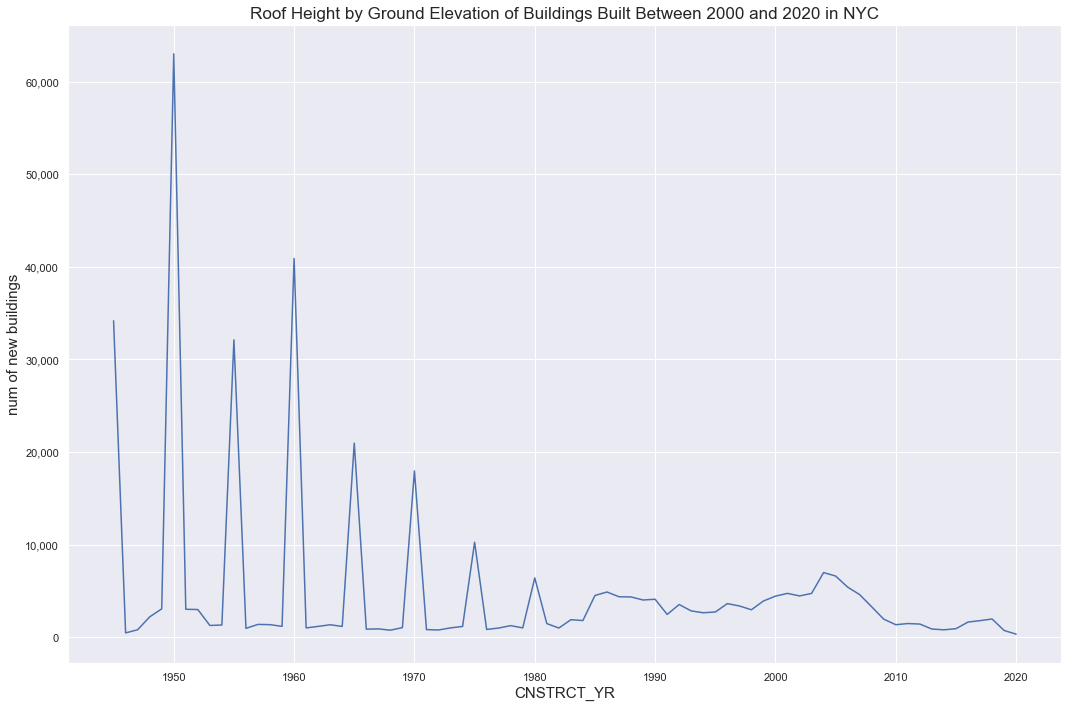

In [179]:
fig, ax = plt.subplots(figsize=(15,10))

by_year.plot(x='CNSTRCT_YR', 
             y='count', 
             legend=False, 
             ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('CNSTRCT_YR', fontsize=15)
plt.ylabel('num of new buildings', fontsize=15)
plt.title('Roof Height by Ground Elevation of Buildings Built Between 2000 and 2020 in NYC', fontsize=17)
plt.tight_layout()
plt.savefig('figures/line-plot-1')

## Timeseries Plot

In [180]:
g = building_footprints.groupby('CNSTRCT_YR')['DOITT_ID'].count().reset_index()
g.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)

g.set_index('CNSTRCT_YR', drop=False, inplace=True)
g.index = g.index.astype('int64')

# transforming our 'Year' index to datetime
g.index = pd.to_datetime(g.index, format='%Y')

g.index.dtype

dtype('<M8[ns]')

In [181]:
g.head()

CNSTRCT_YR  count
1945-01-01      1945.0  34170
1946-01-01      1946.0    474
1947-01-01      1947.0    817
1948-01-01      1948.0   2206
1949-01-01      1949.0   3070

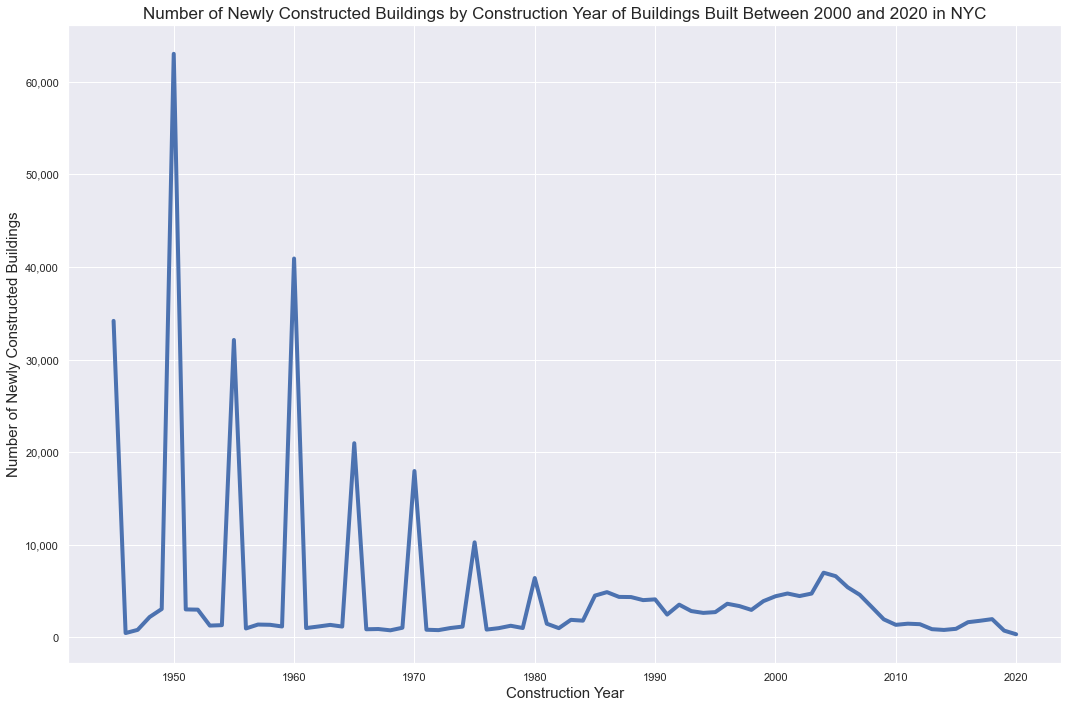

In [182]:
fig, ax = plt.subplots(figsize=(15,10))

# plotting bar chart of number of claims by year
ax.plot(g['count'], 
        linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Construction Year of Buildings Built Between 2000 and 2020 in NYC',
         fontsize=17)
plt.tight_layout()
plt.savefig('figures/line-plot-2')

In [183]:
table = pd.pivot_table(building_footprints, 
                       values='DOITT_ID', 
                       index=['CNSTRCT_YR'], 
                       columns = ['borough'], 
                       aggfunc=pd.Series.nunique)

table.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
table.index = table.index.astype('int64')
table.index = pd.to_datetime(table.index, format='%Y')

table.index.dtype

dtype('<M8[ns]')

In [184]:
table.head()

borough       BK    BX  MN     QN    SI
1945-01-01  4212  1948  76  25645  2289
1946-01-01    95    53  53    192    81
1947-01-01    34    89  95    495   104
1948-01-01   152   166  68   1762    58
1949-01-01   275   174  51   2498    72

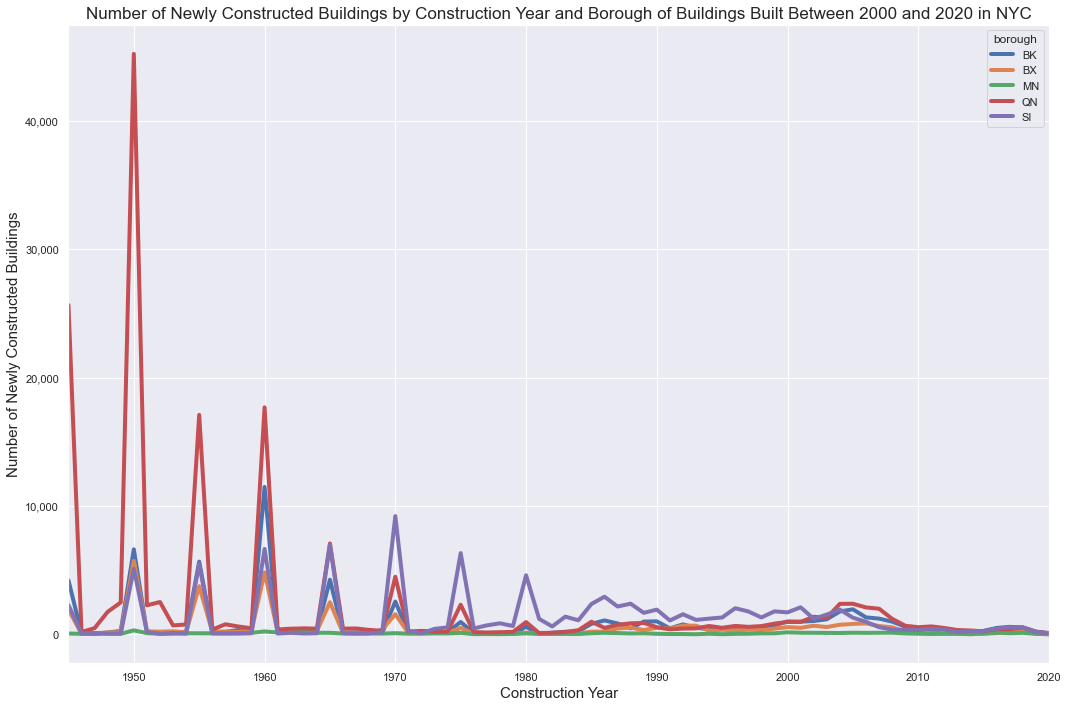

In [185]:
fig, ax = plt.subplots(figsize=(15,10))

table.plot(ax=ax, 
           linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Construction Year and Borough of Buildings Built Between 2000 and 2020 in NYC',
         fontsize=17)
plt.tight_layout()
plt.savefig('figures/line-plot-5')

In [186]:
table_cumsum = table.cumsum()
table_cumsum.head()

borough       BK    BX   MN     QN    SI
1945-01-01  4212  1948   76  25645  2289
1946-01-01  4307  2001  129  25837  2370
1947-01-01  4341  2090  224  26332  2474
1948-01-01  4493  2256  292  28094  2532
1949-01-01  4768  2430  343  30592  2604

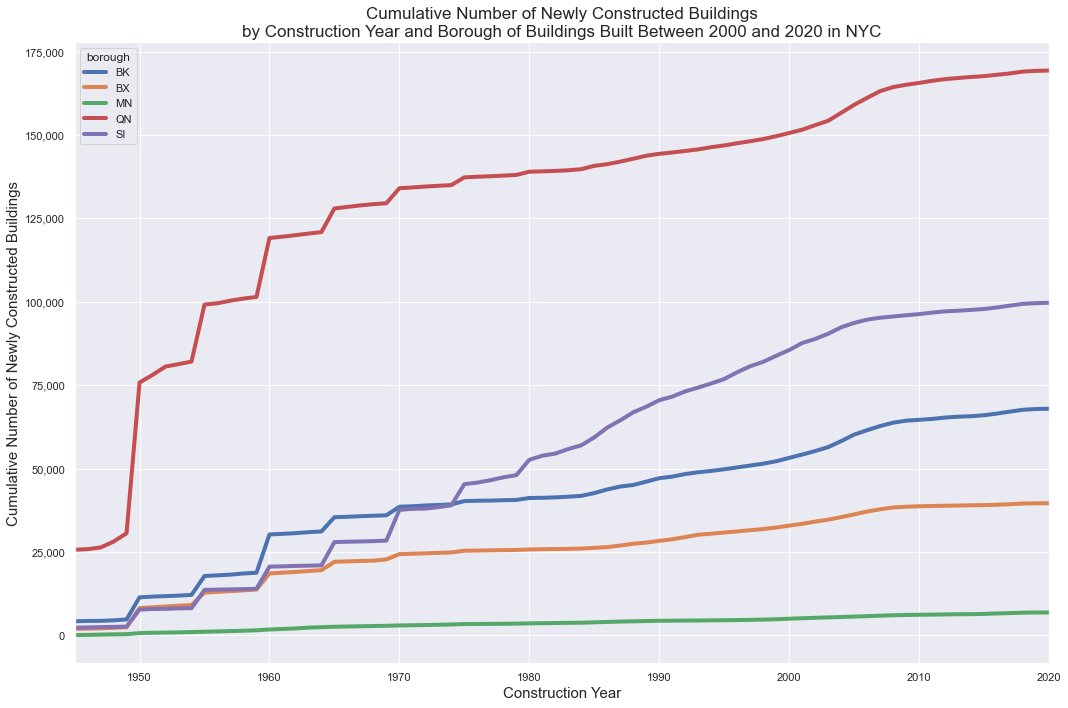

In [187]:
fig, ax = plt.subplots(figsize=(15,10))

table_cumsum.plot(ax=ax, 
                  linewidth=4)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Cumulative Number of Newly Constructed Buildings', fontsize=15)
plt.title('Cumulative Number of Newly Constructed Buildings\nby Construction Year and Borough of Buildings Built Between 2000 and 2020 in NYC',
         fontsize=17)
plt.tight_layout()
plt.savefig('figures/line-plot-7')

## Bar Plot

In [188]:
bar = building_footprints.groupby('borough')['DOITT_ID'].count()
bar.rename("count", inplace=True)
bar.sort_values(ascending=False, inplace=True)
bar

borough
QN    169327
SI     99691
BK     67930
BX     39600
MN      6859
Name: count, dtype: int64

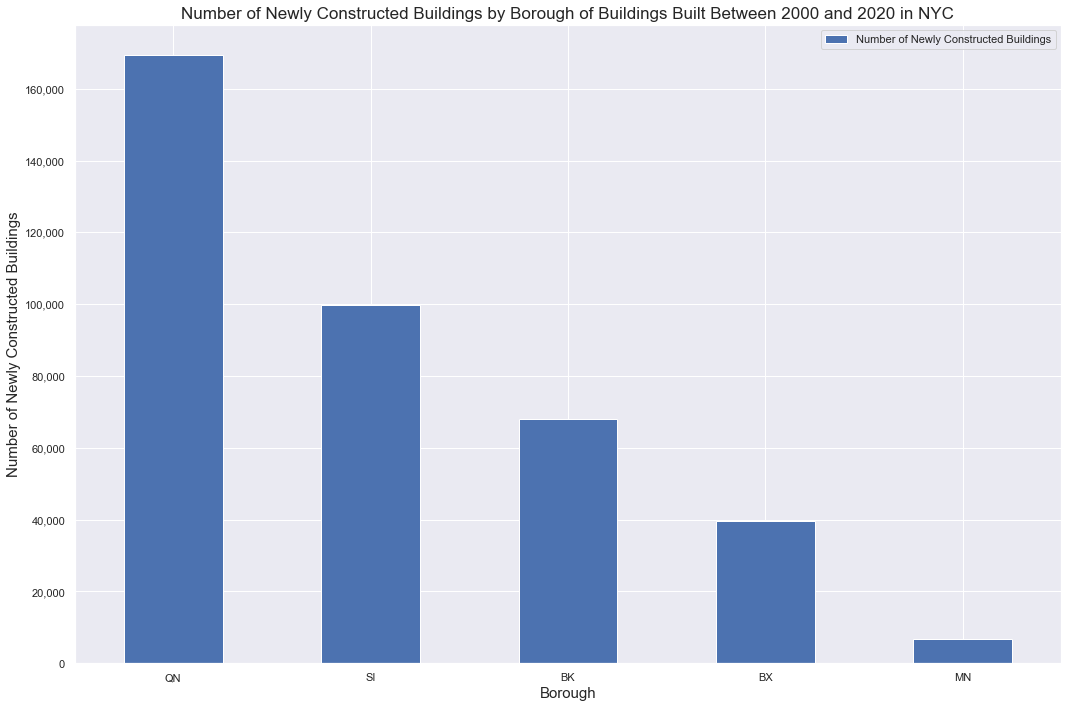

In [189]:
fig, ax = plt.subplots(figsize=(15,10))

bar.plot(kind='bar', 
         ax=ax, 
         label='Number of Newly Constructed Buildings')

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Borough', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Borough of Buildings Built Between 2000 and 2020 in NYC',
         fontsize=17)
plt.tight_layout()
plt.savefig('figures/bar-plot-1')

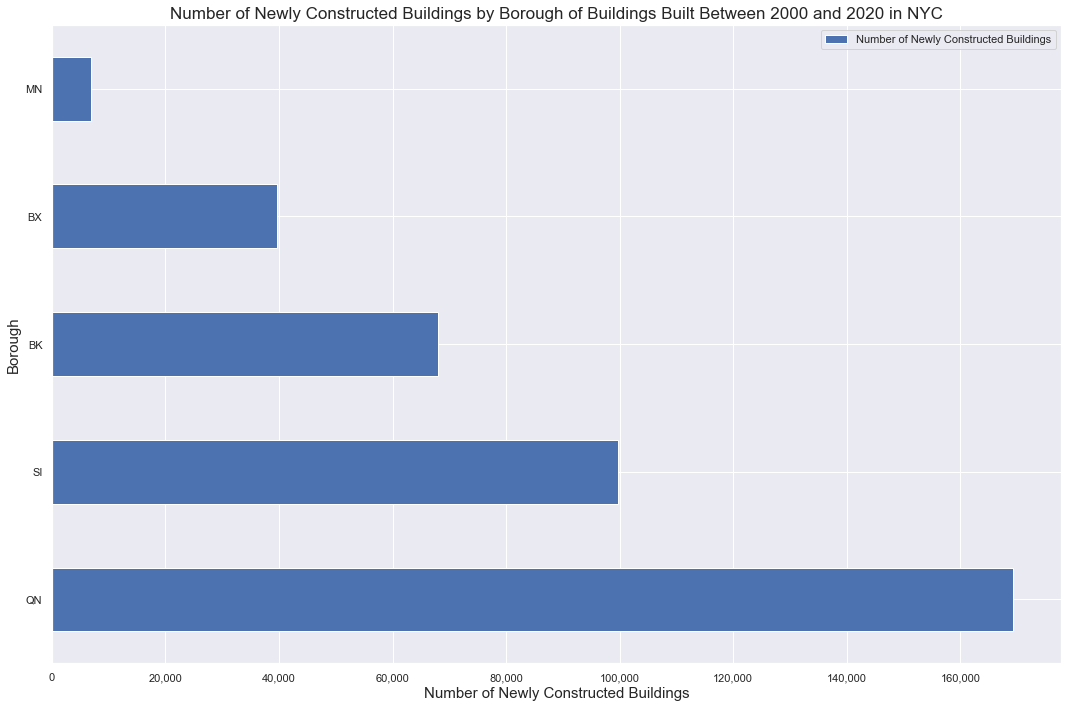

In [190]:
fig, ax = plt.subplots(figsize=(15,10))

bar.plot.barh(ax=ax, 
              label='Number of Newly Constructed Buildings')


# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.legend()
plt.xlabel('Number of Newly Constructed Buildings', fontsize=15)
plt.ylabel('Borough', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Borough of Buildings Built Between 2000 and 2020 in NYC',
         fontsize=17)
plt.tight_layout()
plt.savefig('figures/bar-plot-2')

In [191]:
table = building_footprints[building_footprints['CNSTRCT_YR'].between(2000, 2020)]


table = pd.pivot_table(table, 
                       values='DOITT_ID', 
                       index=['CNSTRCT_YR'], 
                       columns = ['borough'], 
                       aggfunc=pd.Series.nunique)

table.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
table.index = table.index.astype('int64')

table.index.dtype

dtype('int64')

In [192]:
table.head()

borough    BK   BX   MN    QN    SI
2000     1011  572  165   974  1722
2001      996  519  135   977  2116
2002     1051  682  132  1378  1223
2003     1183  578  122  1303  1550
2004     1793  760  115  2383  1938

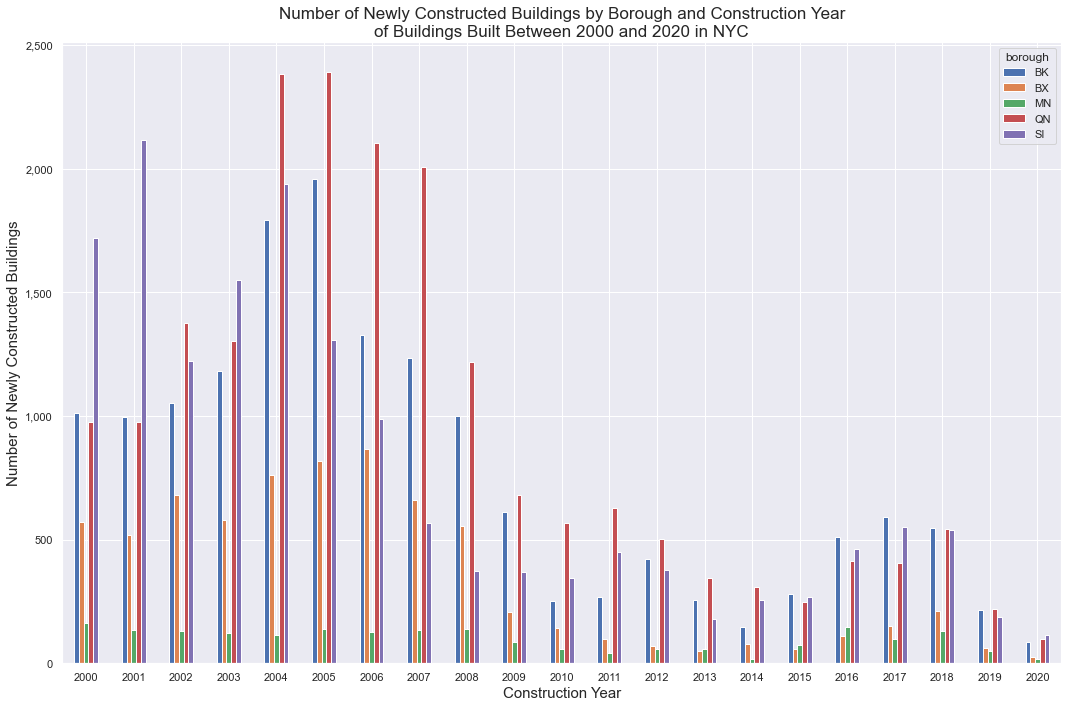

In [193]:
fig, ax = plt.subplots(figsize=(15,10))

table.plot(kind='bar', 
           ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Number of Newly Constructed Buildings by Borough and Construction Year\nof \
Buildings Built Between 2000 and 2020 in NYC',
         fontsize=17)
plt.tight_layout()
plt.savefig('figures/bar-plot-3')

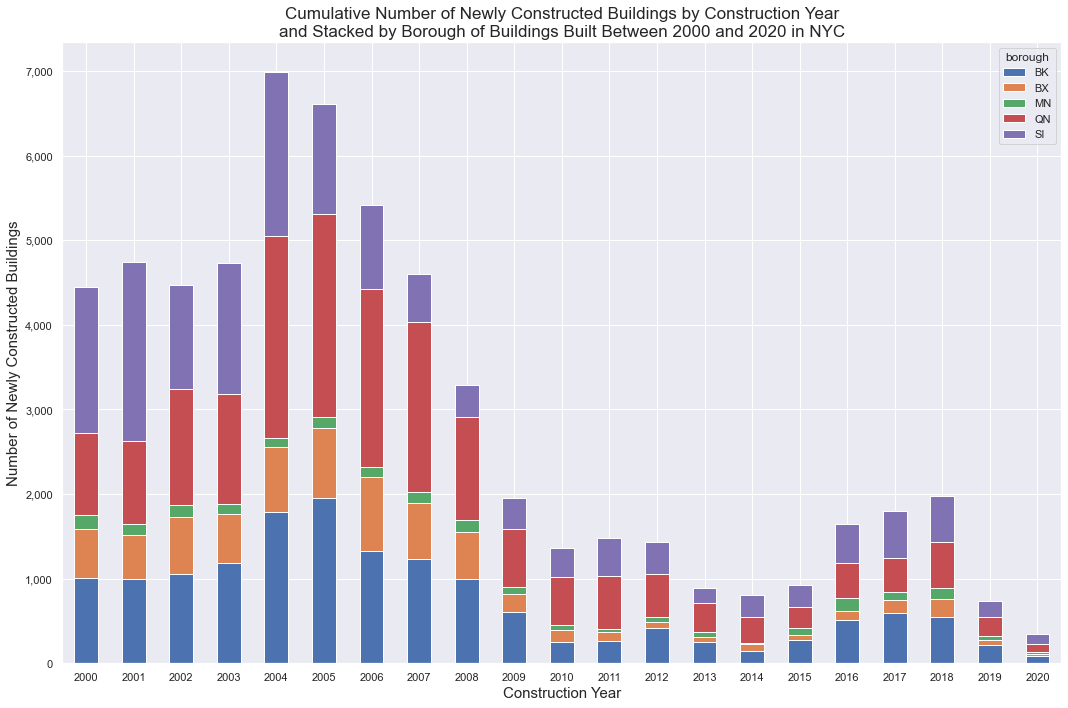

In [194]:
fig, ax = plt.subplots(figsize=(15,10))

table.plot.bar(stacked=True, 
               ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.title('Cumulative Number of Newly Constructed Buildings by Construction Year\nand \
Stacked by Borough of Buildings Built Between 2000 and 2020 in NYC', fontsize=17)

plt.tight_layout()
plt.savefig('figures/bar-plot-4')

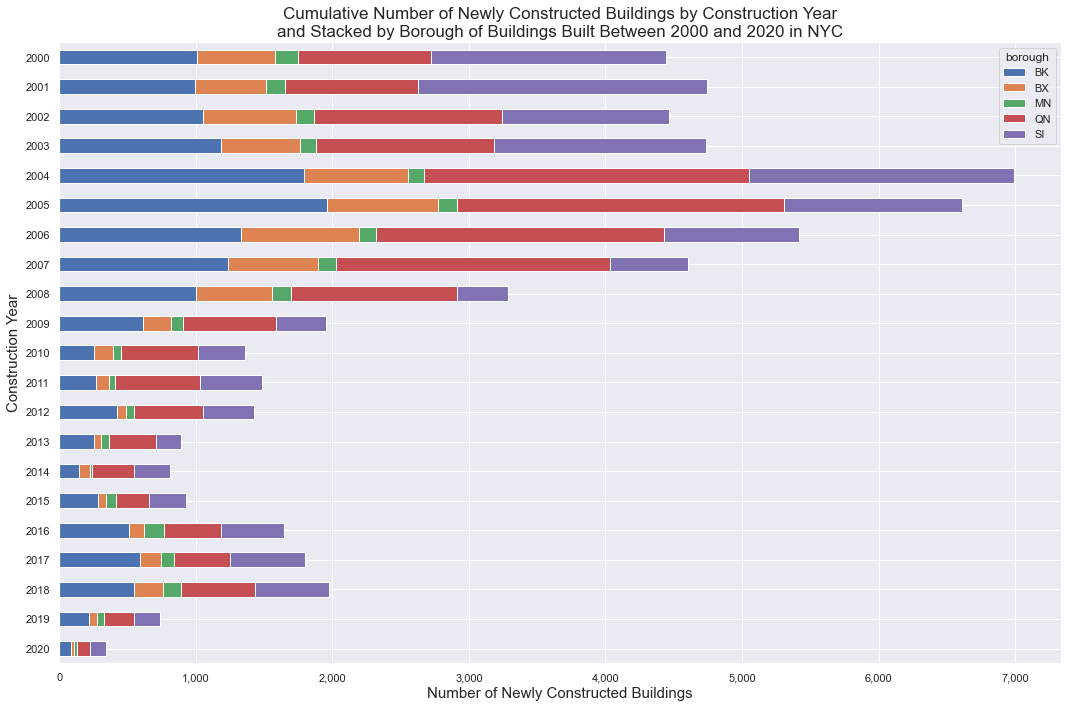

In [195]:
fig, ax = plt.subplots(figsize=(15,10))

table.sort_index(ascending=False).plot.barh(stacked=True, 
                                            ax=ax)

# formatting Y axis with comma
ax.get_xaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Number of Newly Constructed Buildings', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.title('Cumulative Number of Newly Constructed Buildings by Construction Year\nand \
Stacked by Borough of Buildings Built Between 2000 and 2020 in NYC', fontsize=17)
plt.tight_layout()
plt.savefig('figures/bar-plot-5')

## Histograms

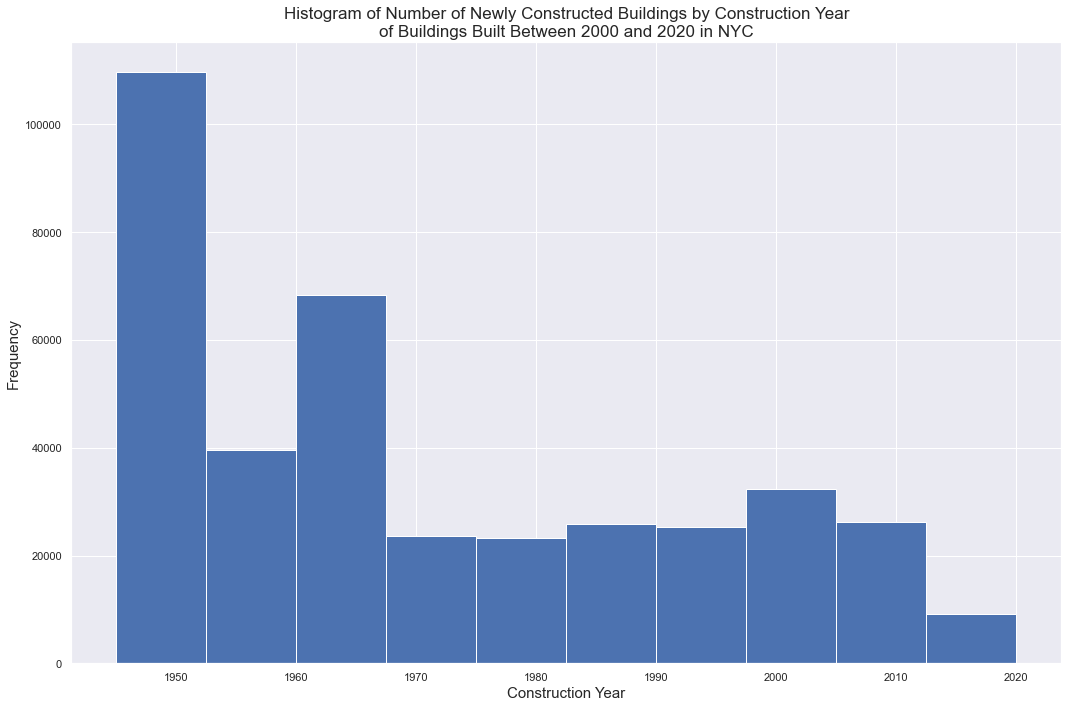

In [196]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints.hist(ax=ax, 
                         column='CNSTRCT_YR')

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histogram of Number of Newly Constructed Buildings by Construction Year\nof Buildings Built Between 2000 and 2020 in NYC',
         fontsize=17)
plt.tight_layout()
plt.savefig('figures/hist-plot-1')

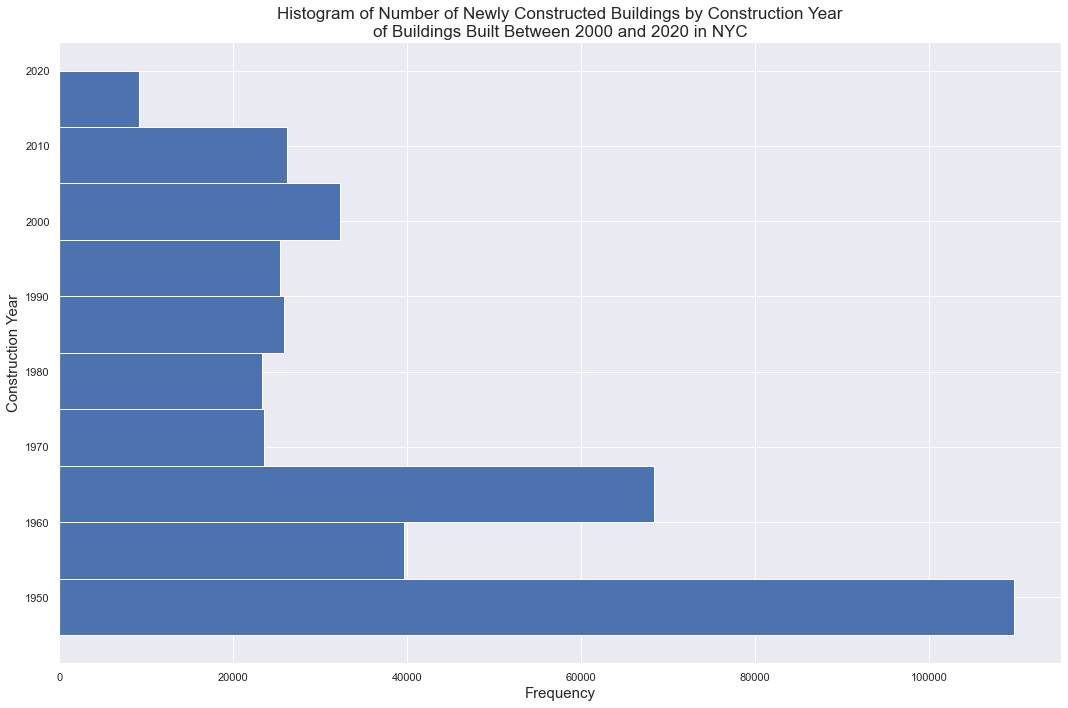

In [197]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints['CNSTRCT_YR'].plot.hist(orientation='horizontal', 
                                            cumulative=False)

plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.title('Histogram of Number of Newly Constructed Buildings by Construction Year\nof Buildings Built Between 2000 and 2020 in NYC',
         fontsize=17)
plt.tight_layout()
plt.savefig('figures/hist-plot-2')

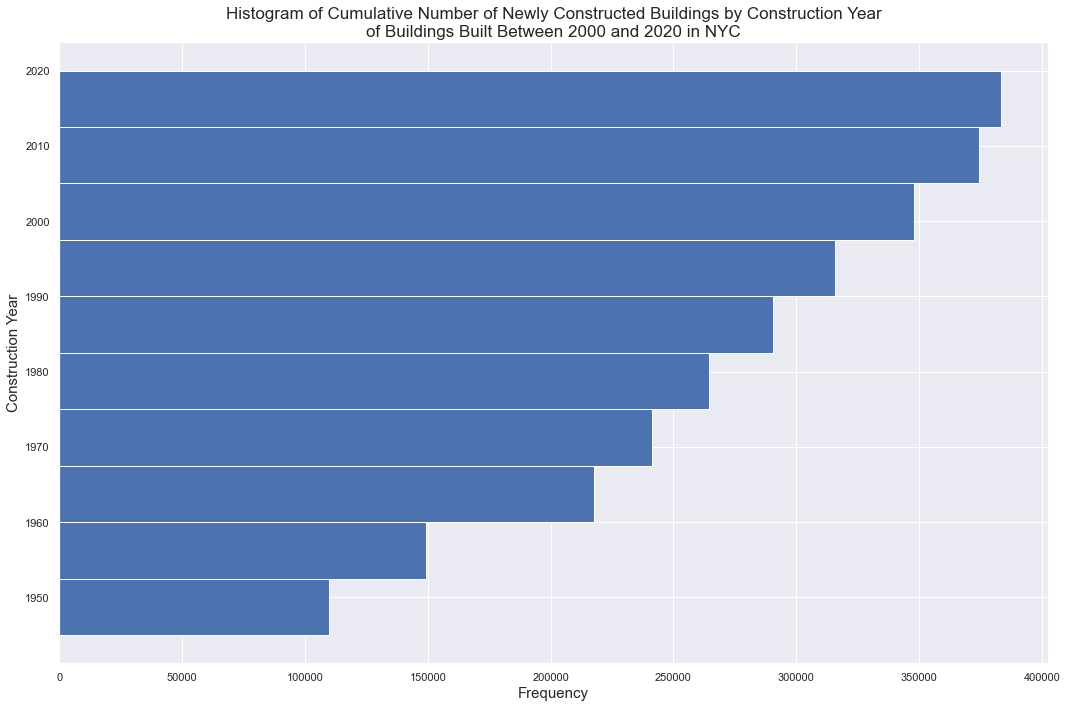

In [198]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints['CNSTRCT_YR'].plot.hist(orientation='horizontal', 
                                            cumulative=True)

plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Construction Year', fontsize=15)
plt.title('Histogram of Cumulative Number of Newly Constructed Buildings by Construction Year\nof Buildings Built Between 2000 and 2020 in NYC',
         fontsize=17)
plt.tight_layout()
plt.savefig('figures/hist-plot-3')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:377: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  **kwds,
/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attrib

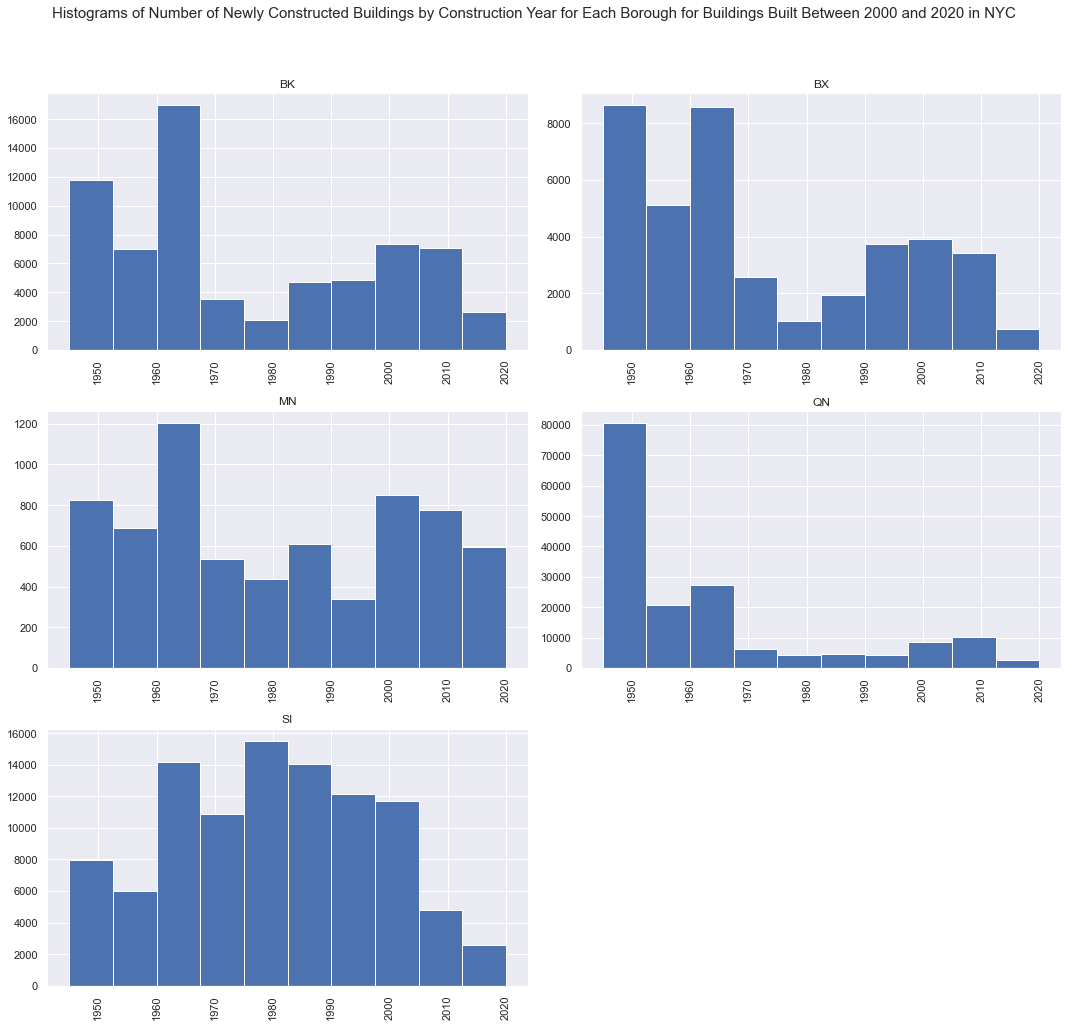

In [199]:
fig, ax = plt.subplots(figsize=(15,15))

building_footprints.hist(ax=ax, 
                         column='CNSTRCT_YR', 
                         by='borough')

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.suptitle('Histograms of Number of Newly Constructed Buildings by Construction Year for Each Borough for Buildings Built Between 2000 and 2020 in NYC', 
            fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('figures/hist-plot-4')

In [200]:
mn = building_footprints.loc[(building_footprints['borough'].isin(["MN"]))]
bk = building_footprints.loc[(building_footprints['borough'].isin(["BK"]))]
bx = building_footprints.loc[(building_footprints['borough'].isin(["BX"]))]
qn = building_footprints.loc[(building_footprints['borough'].isin(["QN"]))]
si = building_footprints.loc[(building_footprints['borough'].isin(["SI"]))]

mn = mn['CNSTRCT_YR']
mn.rename('MN', inplace=True)

bk = bk['CNSTRCT_YR']
bk.rename('BK', inplace=True)

bx = bx['CNSTRCT_YR']
bx.rename('BX', inplace=True)

qn = qn['CNSTRCT_YR']
qn.rename('QN', inplace=True)

si = si['CNSTRCT_YR']
si.rename('SI', inplace=True)

93         1955.0
105        1975.0
111        1987.0
113        1987.0
115        1987.0
            ...  
1083653    2020.0
1083658    2020.0
1083660    2020.0
1083662    2020.0
1083673    1955.0
Name: SI, Length: 99691, dtype: float64

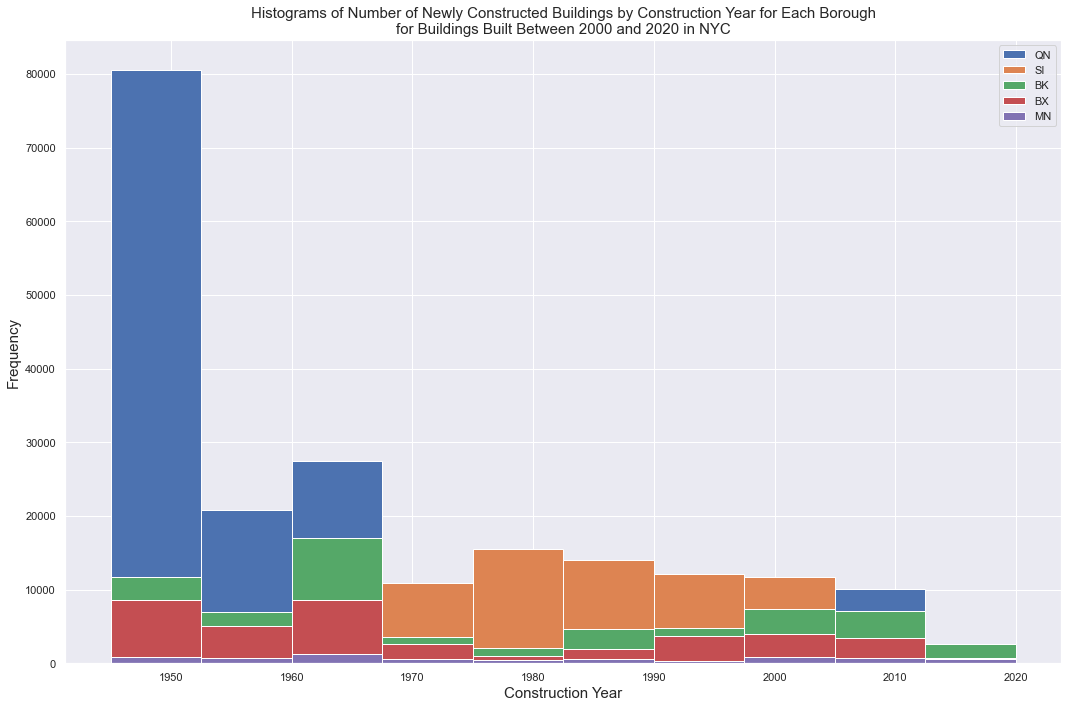

In [201]:
fig, ax = plt.subplots(figsize=(15,10))

qn.plot.hist(ax=ax)
si.plot.hist(ax=ax)
bk.plot.hist(ax=ax)
bx.plot.hist(ax=ax)
mn.plot.hist(ax=ax)

plt.legend()
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histograms of Number of Newly Constructed Buildings by Construction Year for Each Borough\nfor Buildings Built Between 2000 and 2020 in NYC',
         fontsize=15)
plt.tight_layout()
plt.savefig('figures/hist-plot-5')

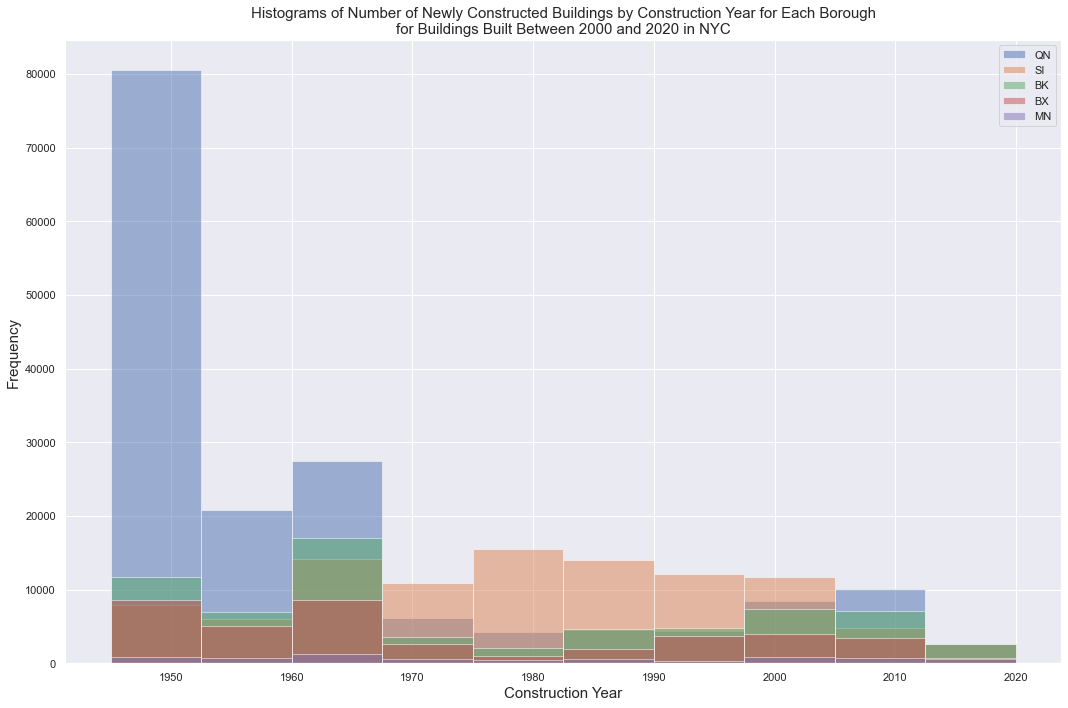

In [202]:
fig, ax = plt.subplots(figsize=(15,10))

qn.plot.hist(ax=ax, alpha=0.5)
si.plot.hist(ax=ax, alpha=0.5)
bk.plot.hist(ax=ax, alpha=0.5)
bx.plot.hist(ax=ax, alpha=0.5)
mn.plot.hist(ax=ax, alpha=0.5)

plt.legend()
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.title('Histograms of Number of Newly Constructed Buildings by Construction Year for Each Borough\nfor Buildings Built Between 2000 and 2020 in NYC',
         fontsize=15)
plt.tight_layout()
plt.savefig('figures/hist-plot-6')

## Box Plot 

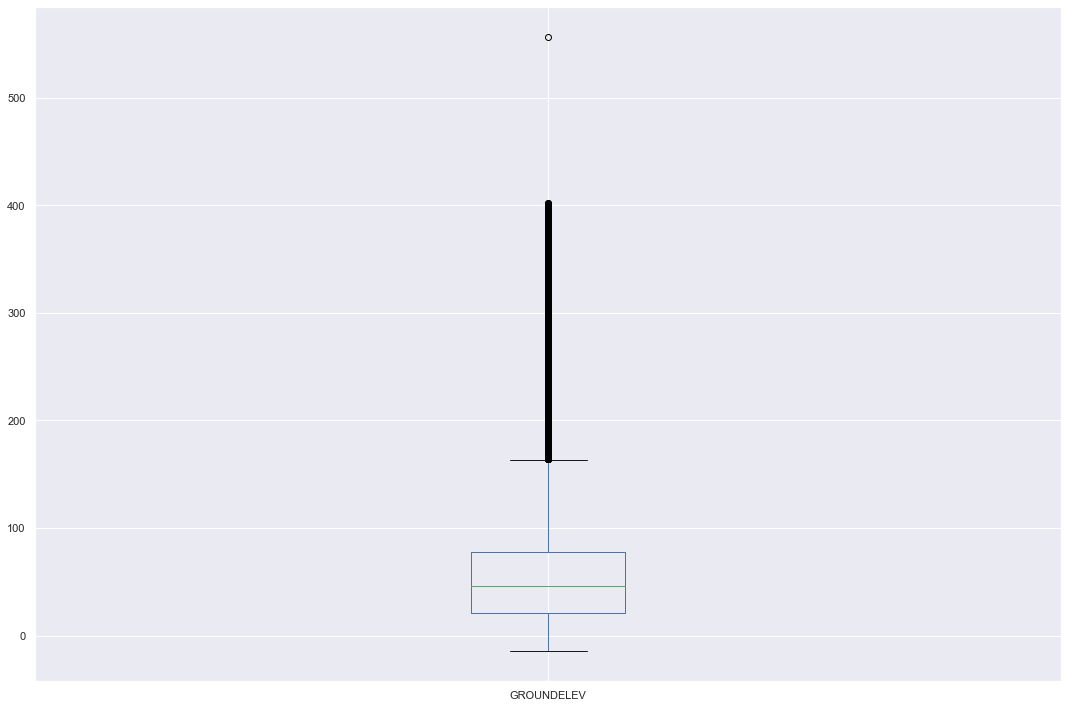

In [203]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints['GROUNDELEV'].plot.box(ax=ax)
plt.tight_layout()
plt.savefig('figures/box-plot-1')

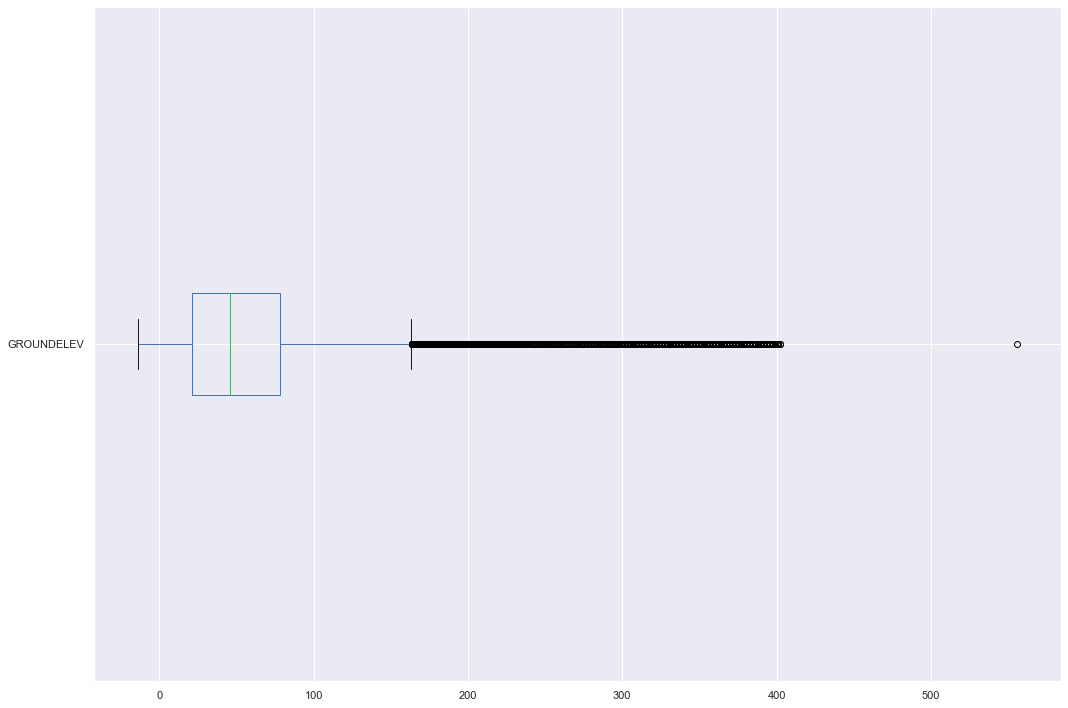

In [204]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints['GROUNDELEV'].plot.box(vert=False, ax=ax)
plt.tight_layout()
plt.savefig('figures/box-plot-2')

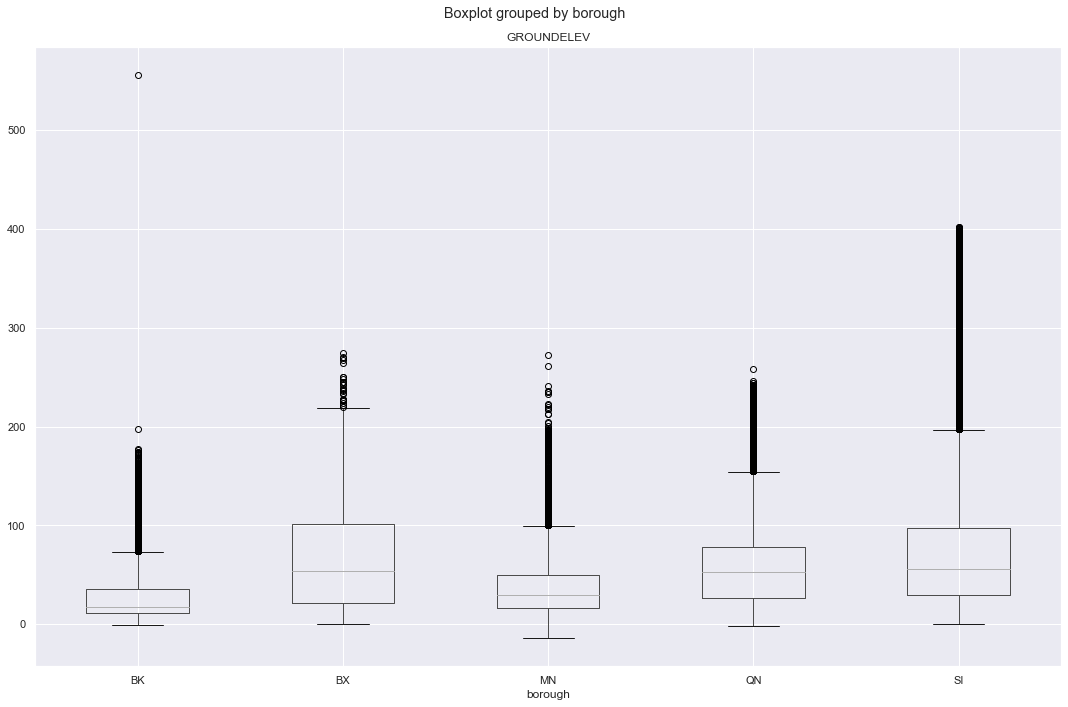

In [205]:
building_footprints_box = building_footprints[['borough', 'GROUNDELEV']]

fig, ax = plt.subplots(figsize=(15,10))

building_footprints_box.boxplot(by='borough', ax=ax)

plt.xlabel('borough')
plt.tight_layout()
plt.savefig('figures/box-plot-3')

## Kernel Density Estimate Plot

In [206]:
building_footprints.head()

the_geom  CNSTRCT_YR      BIN  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  3394646   
3  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0  4460479   
4  MULTIPOLYGON (((-73.85165049449266 40.66194039...      1960.0  4460497   
5  MULTIPOLYGON (((-73.85109292802453 40.66243288...      1960.0  4460503   
6  MULTIPOLYGON (((-73.85300665279054 40.66210254...      1960.0  4460505   

  NAME                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  NaN  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
3  NaN  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
4  NaN  08/22/2017 12:00:00 AM +0000  Constructed    796268   32.008371   
5  NaN  08/22/2017 12:00:00 AM +0000  Constructed    167798   30.720470   
6  NaN  08/22/2017 12:00:00 AM +0000  Constructed     75202   30.225970   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
0     2100.0        18.0  ...     1070.0  1019957.0  178731.0  40.657180   
3     2100.0        10.0  ...     6202.0  1025274.0  180506.0  40.662029   
4     2100.0        12.0  ...     6202.0  1025274.0  180506.0  40.662029   
5     2100.0        10.0  ...     6202.0  1025274.0  180506.0  40.662029   
6     2100.0         9.0  ...     6202.0  1025274.0  180506.0  40.662029   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
0 -73.871307          1            5.0                  33.0          0.0   
3 -73.852133          1           10.0                  45.0          0.0   
4 -73.852133          1           10.0                  45.0          0.0   
5 -73.852133          1           10.0                  45.0          0.0   
6 -73.852133          1           10.0                  45.0          0.0   

   pfirm15_flag  
0           0.0  
3           1.0  
4           1.0  
5           1.0  
6           1.0  

[5 rows x 43 columns]

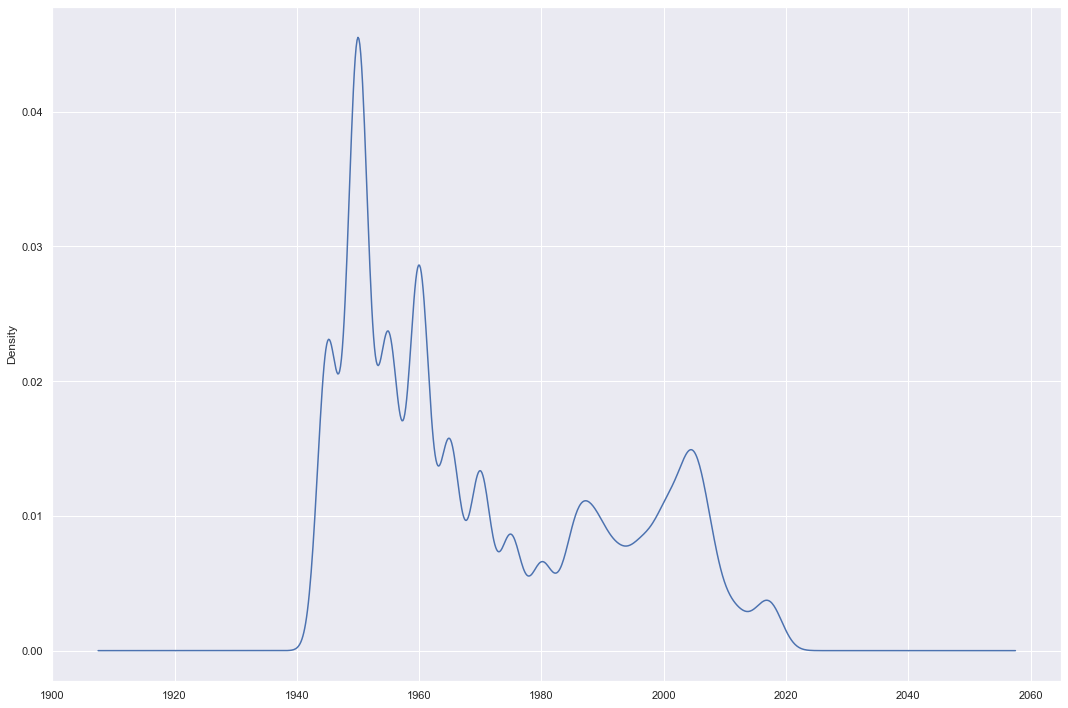

In [207]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints['CNSTRCT_YR'].plot.kde(ax=ax)

plt.tight_layout()
plt.savefig('figures/kde-plot-1')

## Area Plot

In [208]:
area = pd.pivot_table(building_footprints, 
                      values='DOITT_ID', 
                      index=['CNSTRCT_YR'], 
                      columns = ['borough'], 
                      aggfunc=pd.Series.nunique)

area.rename({'DOITT_ID': 'count'}, axis=1, inplace=True)
area.index = area.index.astype('int64')
area.index = pd.to_datetime(area.index, format='%Y')
                             
area.head()

borough       BK    BX  MN     QN    SI
1945-01-01  4212  1948  76  25645  2289
1946-01-01    95    53  53    192    81
1947-01-01    34    89  95    495   104
1948-01-01   152   166  68   1762    58
1949-01-01   275   174  51   2498    72

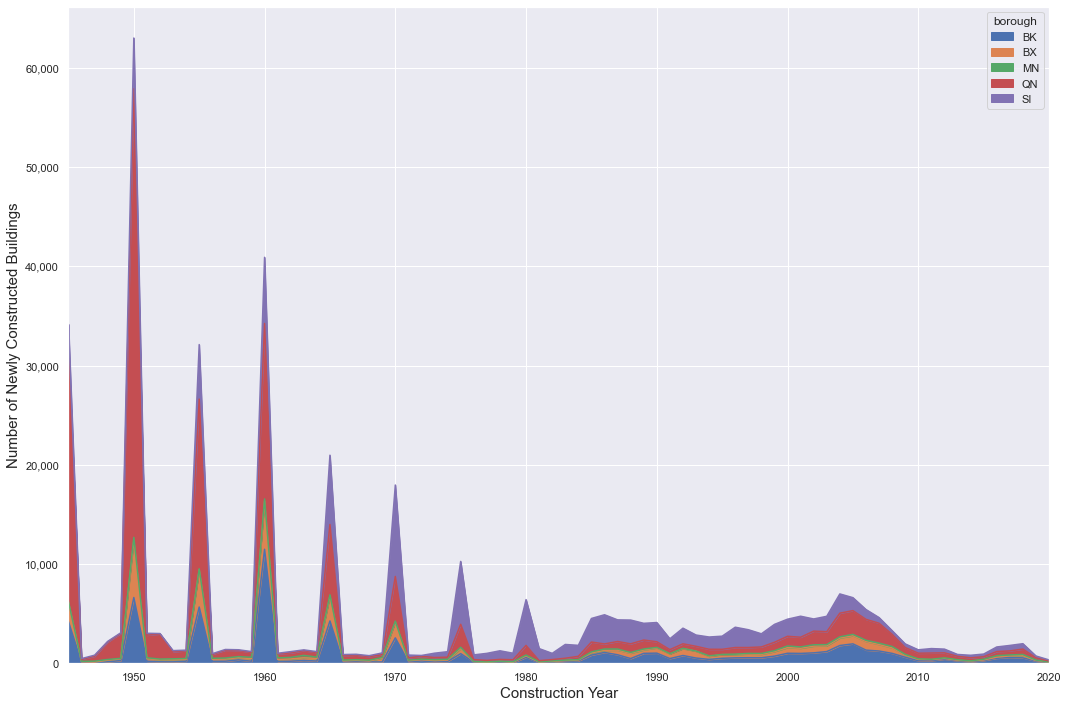

In [209]:
fig, ax = plt.subplots(figsize=(15,10))

area.plot.area(ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/area-plot-1')

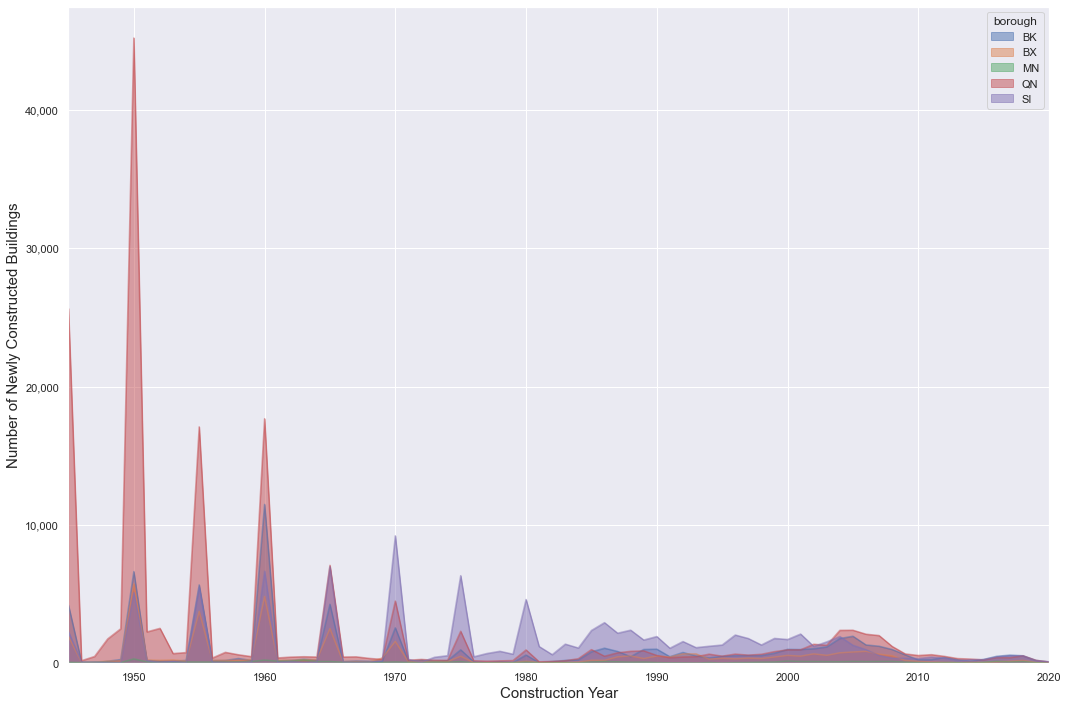

In [210]:
fig, ax = plt.subplots(figsize=(15,10))

area.plot.area(ax=ax, stacked=False)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/area-plot-2')

In [211]:
area_cumsum = area.cumsum()
area_cumsum.head()

borough       BK    BX   MN     QN    SI
1945-01-01  4212  1948   76  25645  2289
1946-01-01  4307  2001  129  25837  2370
1947-01-01  4341  2090  224  26332  2474
1948-01-01  4493  2256  292  28094  2532
1949-01-01  4768  2430  343  30592  2604

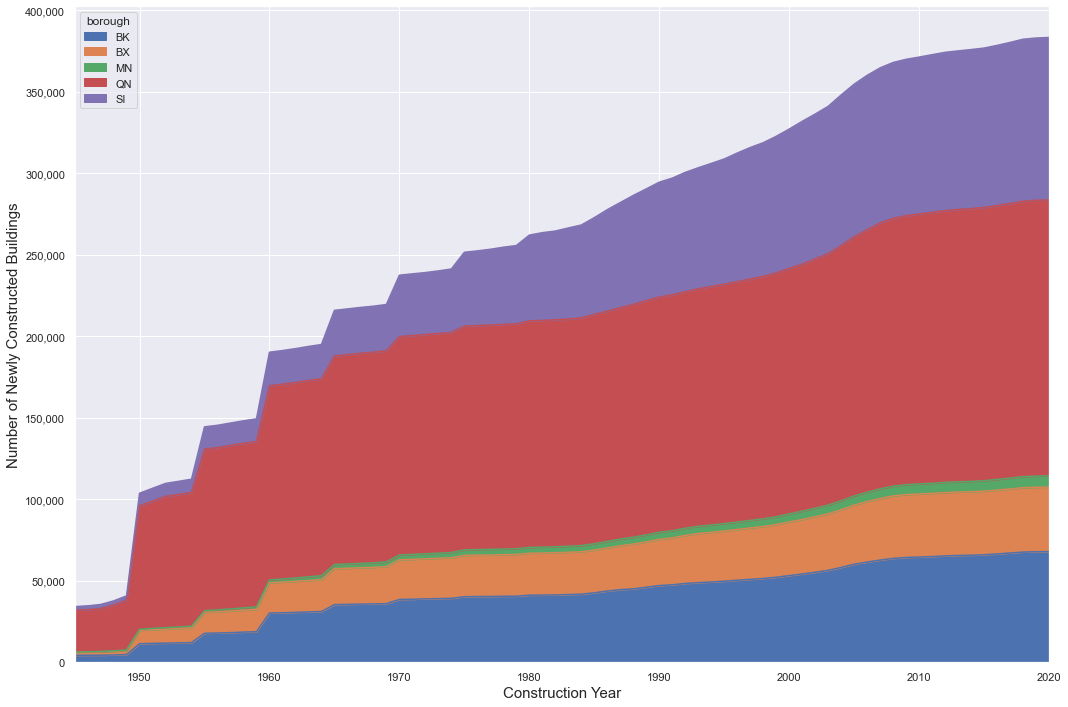

In [212]:
fig, ax = plt.subplots(figsize=(15,10))

area_cumsum.plot.area(ax=ax)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/area-plot-3')

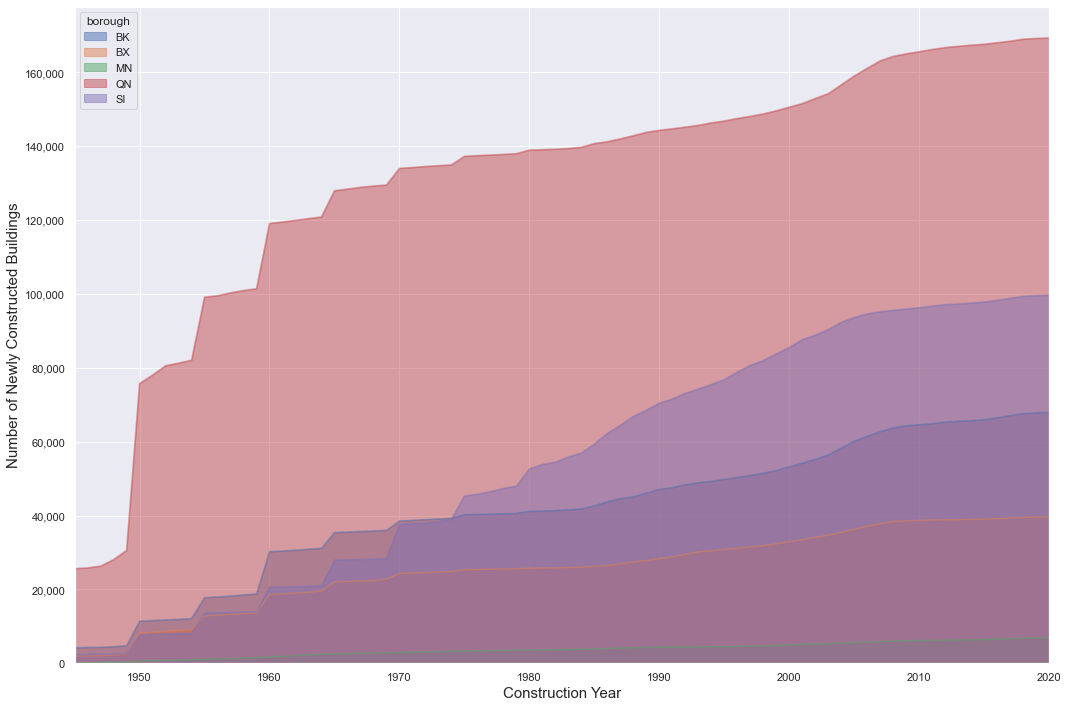

In [213]:
fig, ax = plt.subplots(figsize=(15,10))

area_cumsum.plot.area(ax=ax, stacked=False)

# formatting Y axis with comma
ax.get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.xticks(rotation=0)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Number of Newly Constructed Buildings', fontsize=15)
plt.tight_layout()
plt.savefig('figures/area-plot-4')

## Scatter Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


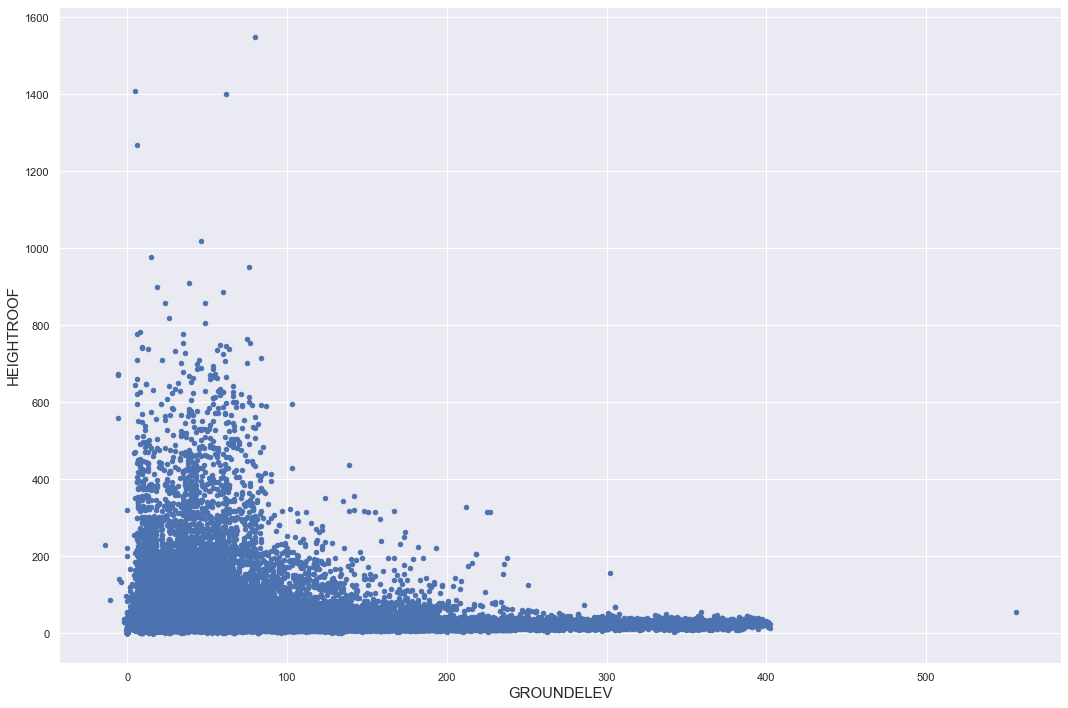

In [214]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints.plot.scatter(x='GROUNDELEV', 
                                 y='HEIGHTROOF', 
                                 ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/scatter-plot-1')

In [215]:
mn = building_footprints.loc[(building_footprints['borough'].isin(["MN"]))]
bk = building_footprints.loc[(building_footprints['borough'].isin(["BK"]))]
bx = building_footprints.loc[(building_footprints['borough'].isin(["BX"]))]
qn = building_footprints.loc[(building_footprints['borough'].isin(["QN"]))]
si = building_footprints.loc[(building_footprints['borough'].isin(["SI"]))]

mn = mn[['GROUNDELEV', 'HEIGHTROOF']]
bk = bk[['GROUNDELEV', 'HEIGHTROOF']]
bx = bx[['GROUNDELEV', 'HEIGHTROOF']]
qn = qn[['GROUNDELEV', 'HEIGHTROOF']]
si = si[['GROUNDELEV', 'HEIGHTROOF']]

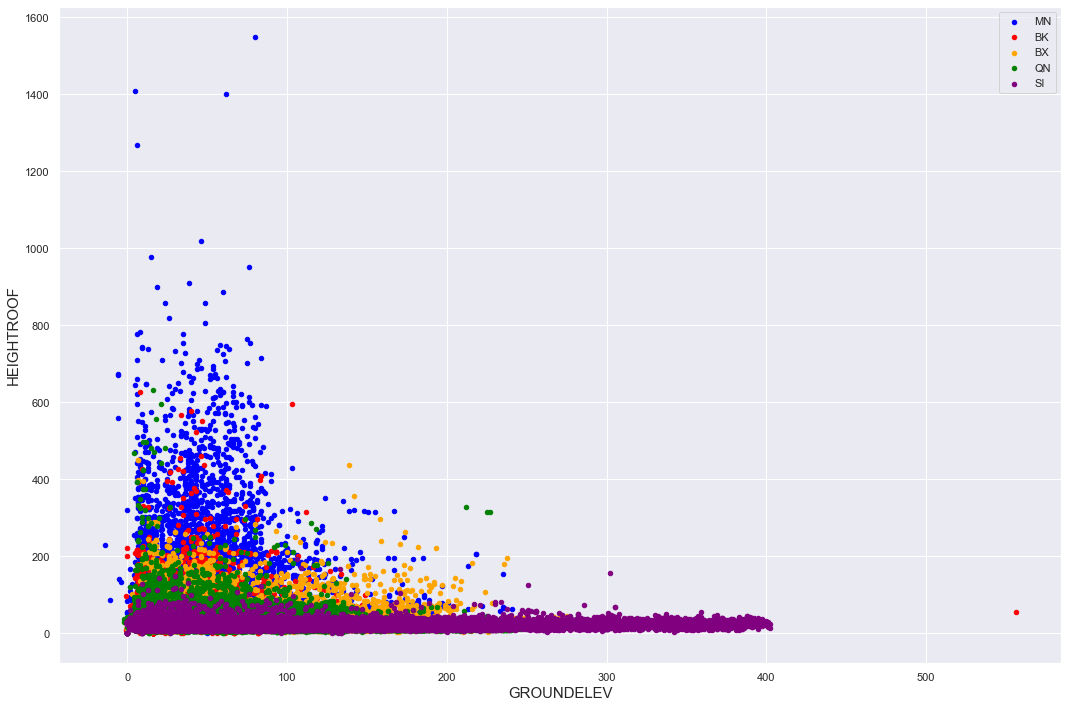

In [216]:
fig, ax = plt.subplots(figsize=(15,10))

mn.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='blue', label='MN', ax=ax)
bk.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='red', label='BK', ax=ax)
bx.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='orange', label='BX', ax=ax)
qn.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='green', label='QN', ax=ax)
si.plot.scatter(x='GROUNDELEV', y='HEIGHTROOF', color='purple', label='SI', ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/scatter-plot-2')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/geribauer/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Users/geribauer/anaconda3/li

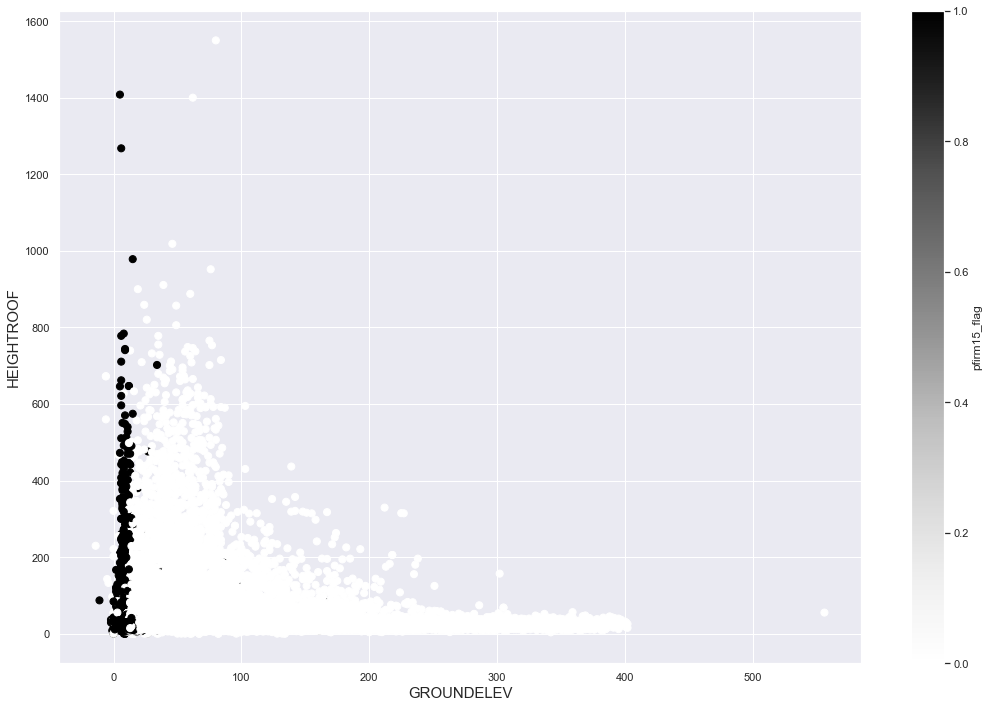

In [217]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints.plot.scatter(x='GROUNDELEV', 
                                 y='HEIGHTROOF', 
                                 c='pfirm15_flag', 
                                 s=50, 
                                 ax=ax)

plt.xlabel('GROUNDELEV', fontsize=15)
plt.ylabel('HEIGHTROOF', fontsize=15)
plt.tight_layout()
plt.savefig('figures/scatter-plot-3')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


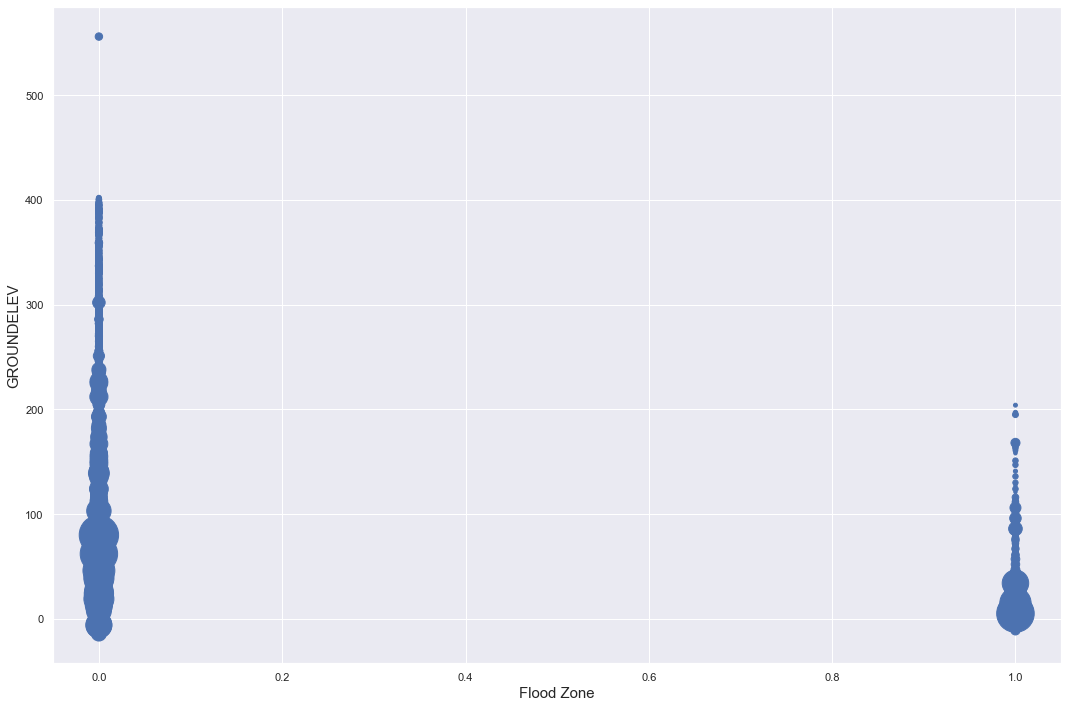

In [218]:
fig, ax = plt.subplots(figsize=(15,10))

building_footprints.plot.scatter(x='pfirm15_flag', 
                                 y='GROUNDELEV', 
                                 s=building_footprints['HEIGHTROOF'], 
                                 ax=ax)

plt.xlabel('Flood Zone', fontsize=15)
plt.ylabel('GROUNDELEV', fontsize=15)
plt.tight_layout()
plt.savefig('figures/scatter-plot-4')

## Hexagonal Bin Plot

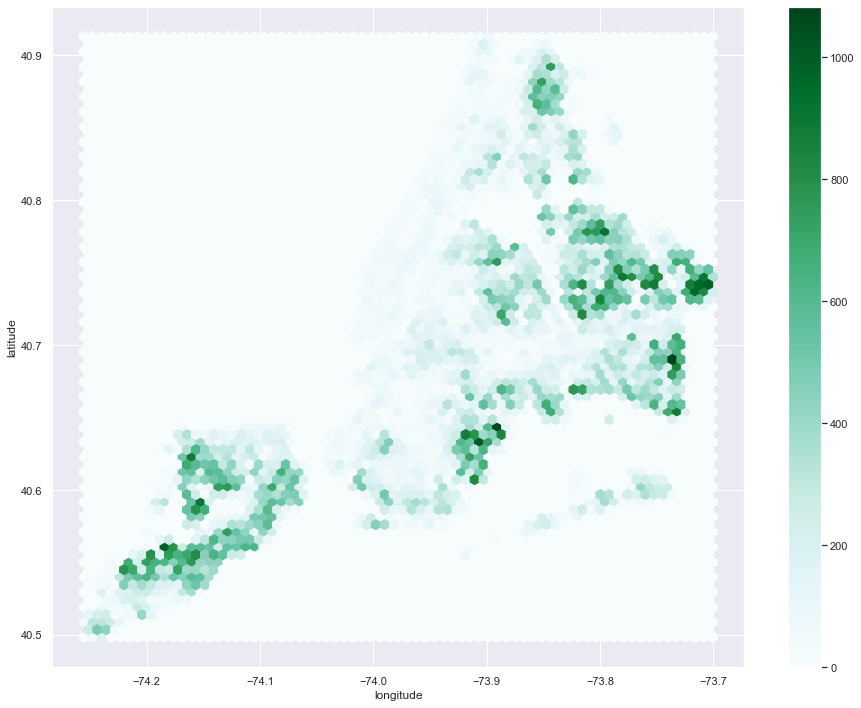

In [219]:
fig, ax = plt.subplots(figsize=(13,10))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                gridsize=70, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/hexbin-plot-1')

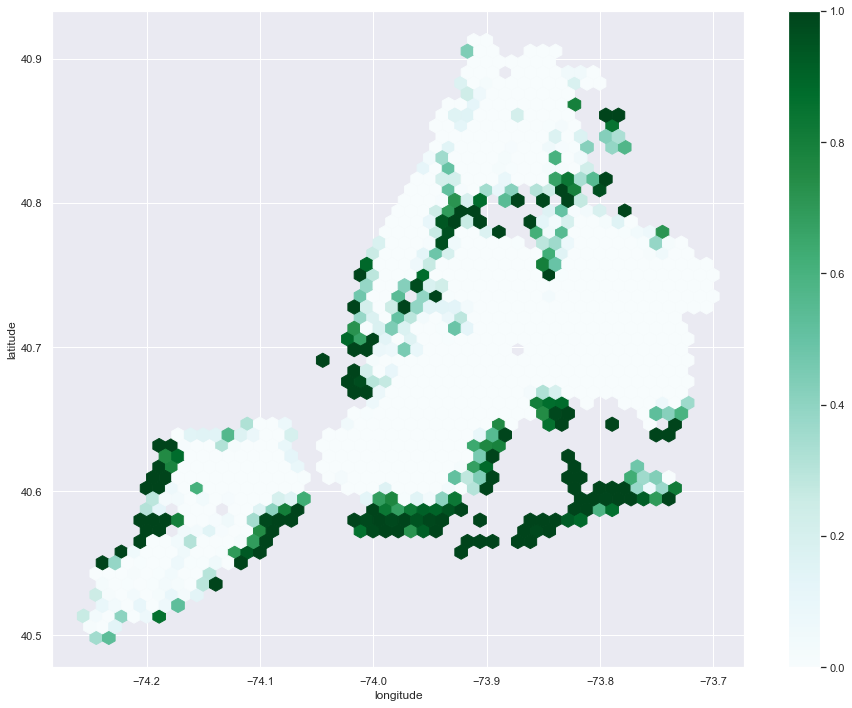

In [220]:
fig, ax = plt.subplots(figsize=(13,10))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                C='pfirm15_flag', 
                                gridsize=50, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/hexbin-plot-2')

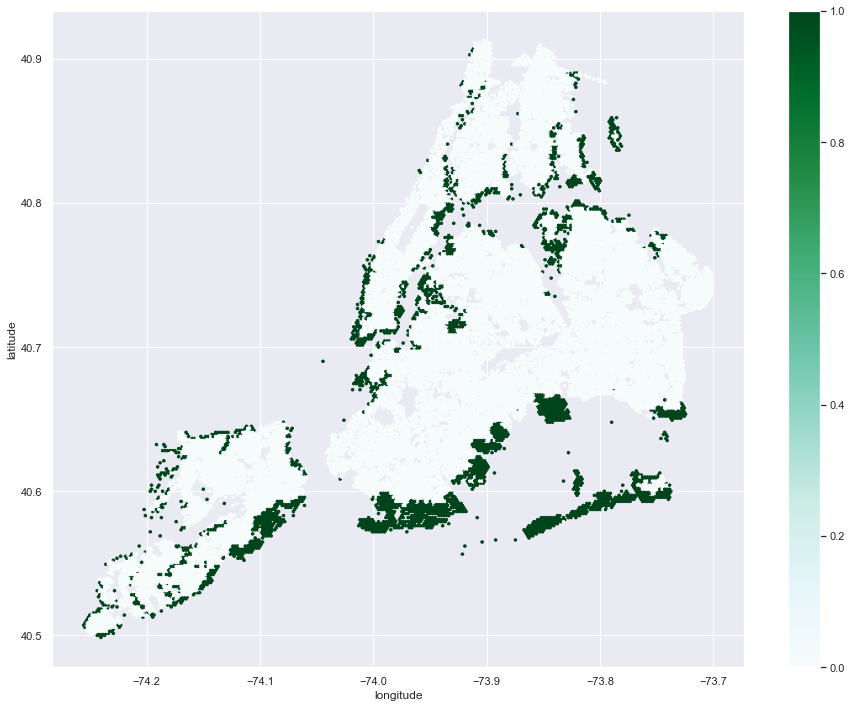

In [221]:
fig, ax = plt.subplots(figsize=(13,10))

building_footprints.plot.hexbin(x='longitude', 
                                y='latitude', 
                                C='pfirm15_flag', 
                                reduce_C_function=np.max, 
                                gridsize=255, 
                                ax=ax)
plt.tight_layout()
plt.savefig('figures/hexbin-plot-3')

## Pie Plot

In [222]:
pie = building_footprints.groupby('borough')['DOITT_ID'].count()
pie.rename("count", inplace=True)
pie.sort_values(ascending=False, inplace=True)
pie

borough
QN    169327
SI     99691
BK     67930
BX     39600
MN      6859
Name: count, dtype: int64

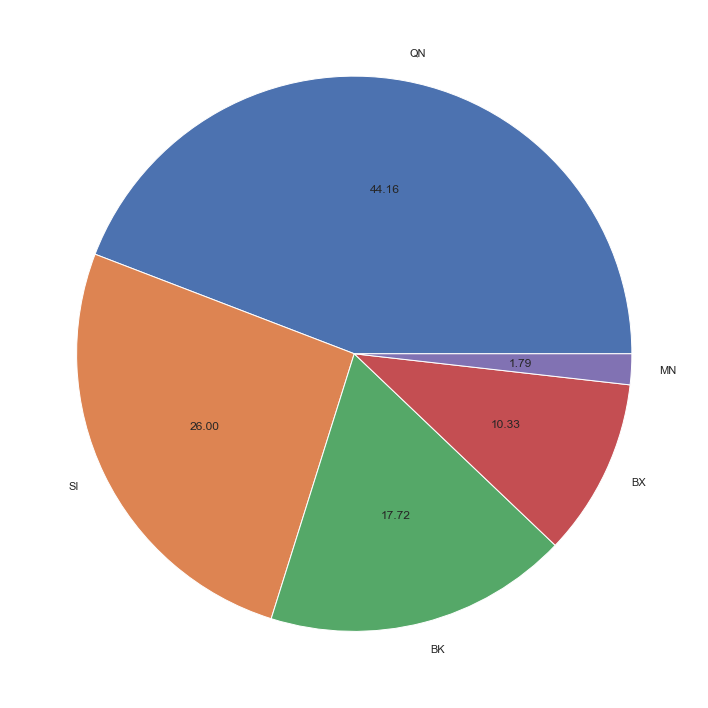

In [223]:
ax = pie.plot.pie(figsize=(15,10), 
                  autopct='%.2f') 

ax.axes.get_yaxis().set_visible(False)
plt.tight_layout()
plt.savefig('figures/pie-plot-1')

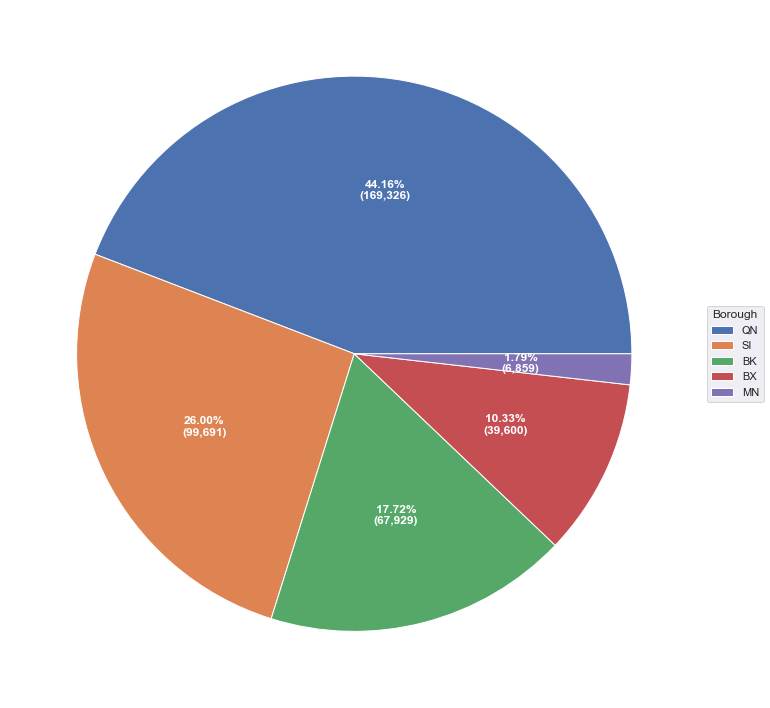

In [224]:
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.2f}%\n({:,})".format(pct, absolute)

wedges, texts, autotexts = ax.pie(pie, 
                                  autopct=lambda pct: func(pct, pie),
                                  textprops=dict(color="w"))

ax.legend(wedges, 
          pie.index,
          title="Borough",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1)) 

plt.setp(autotexts, size=12, weight="bold")
plt.tight_layout()
plt.savefig('figures/pie-plot-2')

# Plotting with Seaborn 

## Plotting Univariate Distributions

### Histograms

In [225]:
building_footprints.head()

the_geom  CNSTRCT_YR      BIN  \
0  MULTIPOLYGON (((-73.87129515296562 40.65717370...      2009.0  3394646   
3  MULTIPOLYGON (((-73.85195485799383 40.66235471...      1960.0  4460479   
4  MULTIPOLYGON (((-73.85165049449266 40.66194039...      1960.0  4460497   
5  MULTIPOLYGON (((-73.85109292802453 40.66243288...      1960.0  4460503   
6  MULTIPOLYGON (((-73.85300665279054 40.66210254...      1960.0  4460505   

  NAME                    LSTMODDATE   LSTSTATYPE  DOITT_ID  HEIGHTROOF  \
0  NaN  08/22/2017 12:00:00 AM +0000  Constructed   1212853   21.608508   
3  NaN  08/22/2017 12:00:00 AM +0000  Constructed    581946   29.811570   
4  NaN  08/22/2017 12:00:00 AM +0000  Constructed    796268   32.008371   
5  NaN  08/22/2017 12:00:00 AM +0000  Constructed    167798   30.720470   
6  NaN  08/22/2017 12:00:00 AM +0000  Constructed     75202   30.225970   

   FEAT_CODE  GROUNDELEV  ...  tract2010     xcoord    ycoord   latitude  \
0     2100.0        18.0  ...     1070.0  1019957.0  178731.0  40.657180   
3     2100.0        10.0  ...     6202.0  1025274.0  180506.0  40.662029   
4     2100.0        12.0  ...     6202.0  1025274.0  180506.0  40.662029   
5     2100.0        10.0  ...     6202.0  1025274.0  180506.0  40.662029   
6     2100.0         9.0  ...     6202.0  1025274.0  180506.0  40.662029   

   longitude plutomapid  sanitdistrict  healthcenterdistrict  firm07_flag  \
0 -73.871307          1            5.0                  33.0          0.0   
3 -73.852133          1           10.0                  45.0          0.0   
4 -73.852133          1           10.0                  45.0          0.0   
5 -73.852133          1           10.0                  45.0          0.0   
6 -73.852133          1           10.0                  45.0          0.0   

   pfirm15_flag  
0           0.0  
3           1.0  
4           1.0  
5           1.0  
6           1.0  

[5 rows x 43 columns]

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


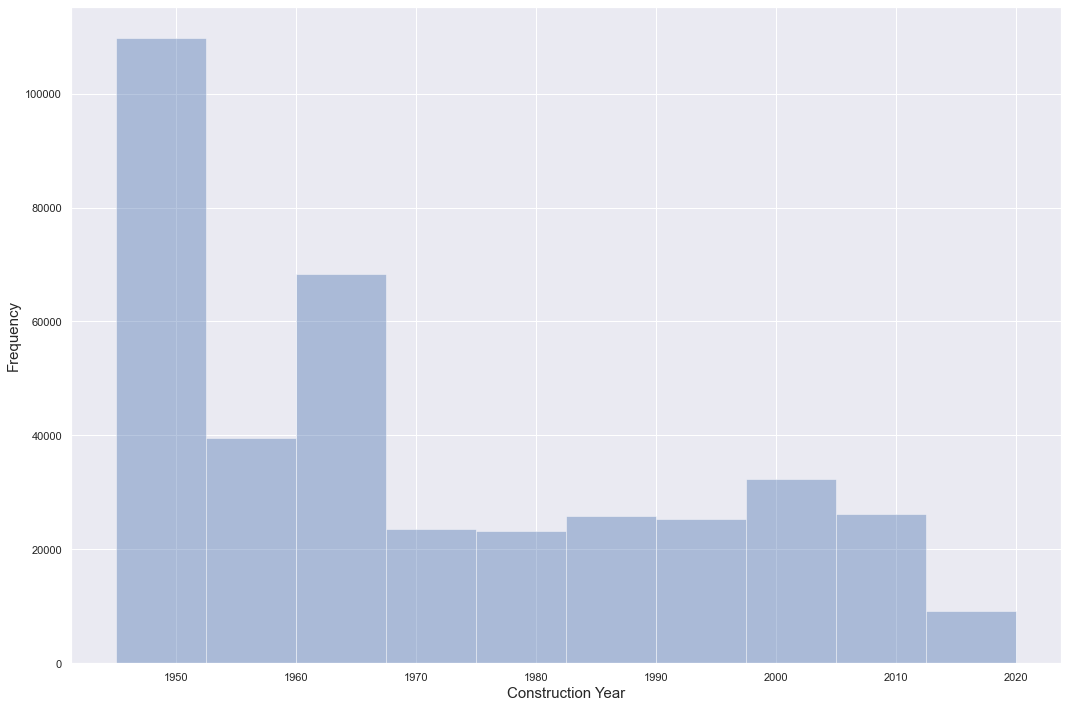

In [226]:
plt.figure(figsize=(15,10))


sns.distplot(building_footprints['CNSTRCT_YR'], 
             kde=False, 
             bins=10, 
             rug=False)

plt.grid(True)
plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.tight_layout()
plt.savefig('figures/hist-plot-1-seaborn')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


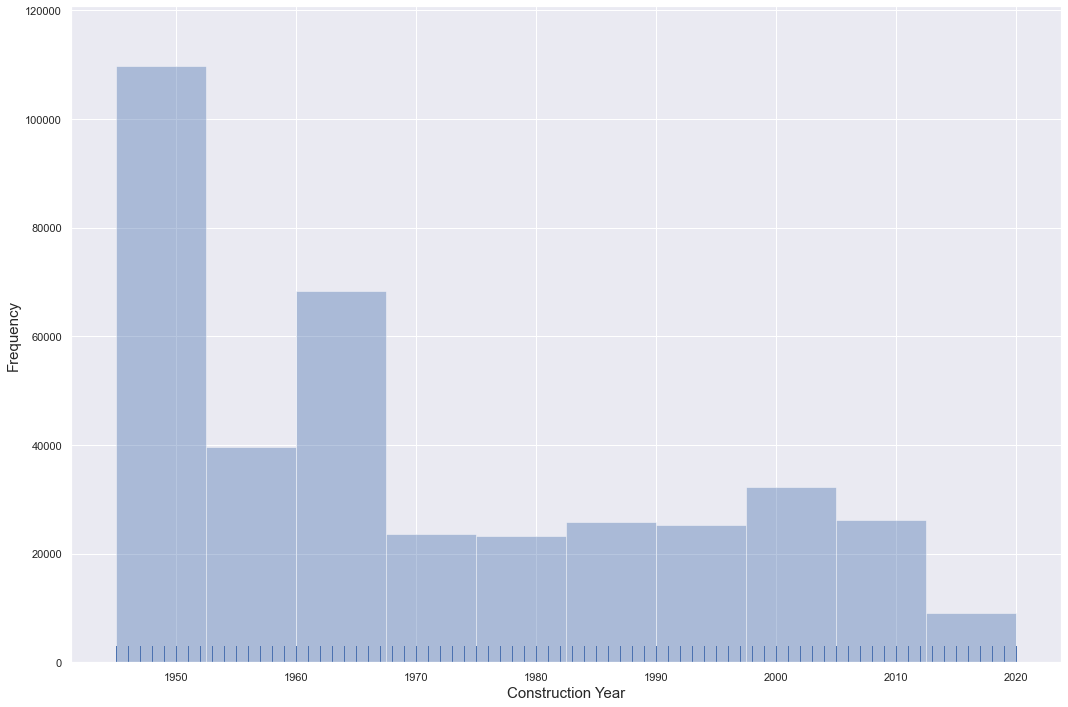

In [227]:
plt.figure(figsize=(15,10))

sns.distplot(building_footprints['CNSTRCT_YR'], 
             bins=10, 
             kde=False, 
             rug=True)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/hist-plot-2-seaborn')

### Kernel Density Estimation

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


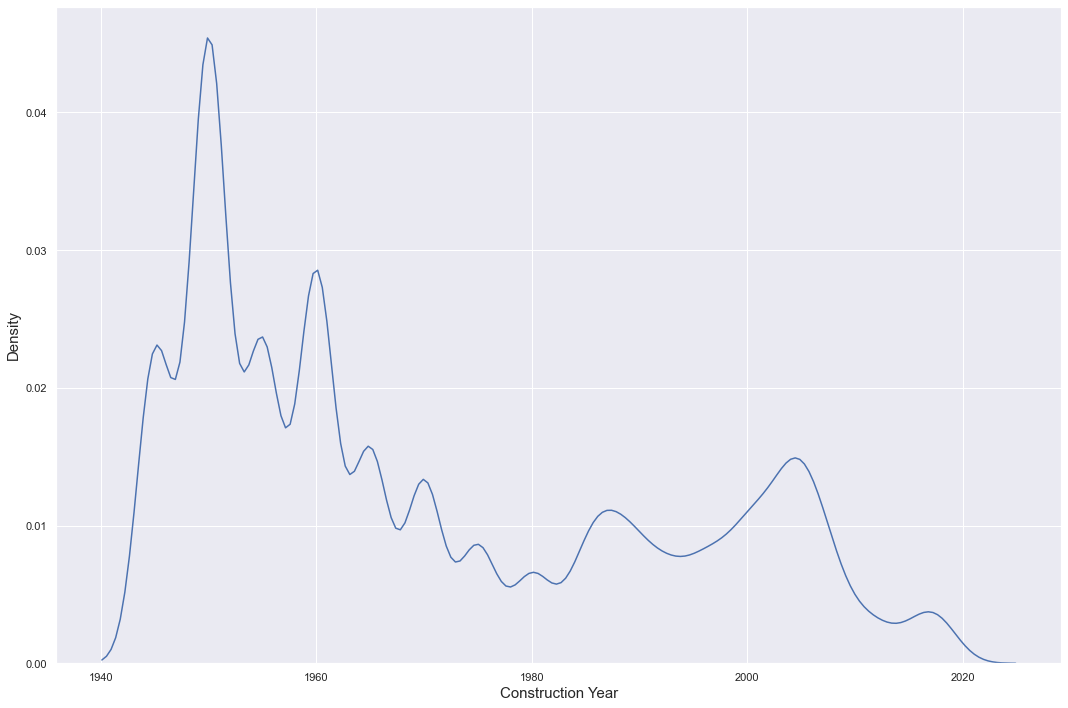

In [228]:
plt.figure(figsize=(15,10))

sns.distplot(building_footprints['CNSTRCT_YR'], 
             hist=False)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/kde-plot-1-seaborn')

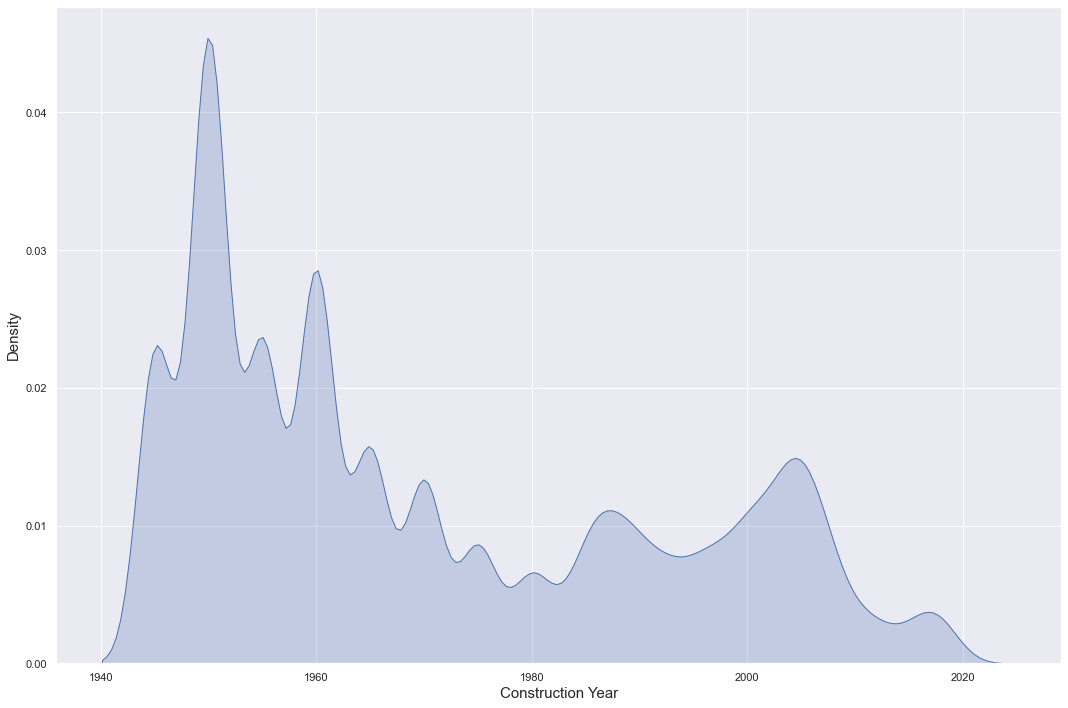

In [229]:
plt.figure(figsize=(15,10))

sns.kdeplot(building_footprints['CNSTRCT_YR'], 
            shade=True)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/kde-plot-2-seaborn')

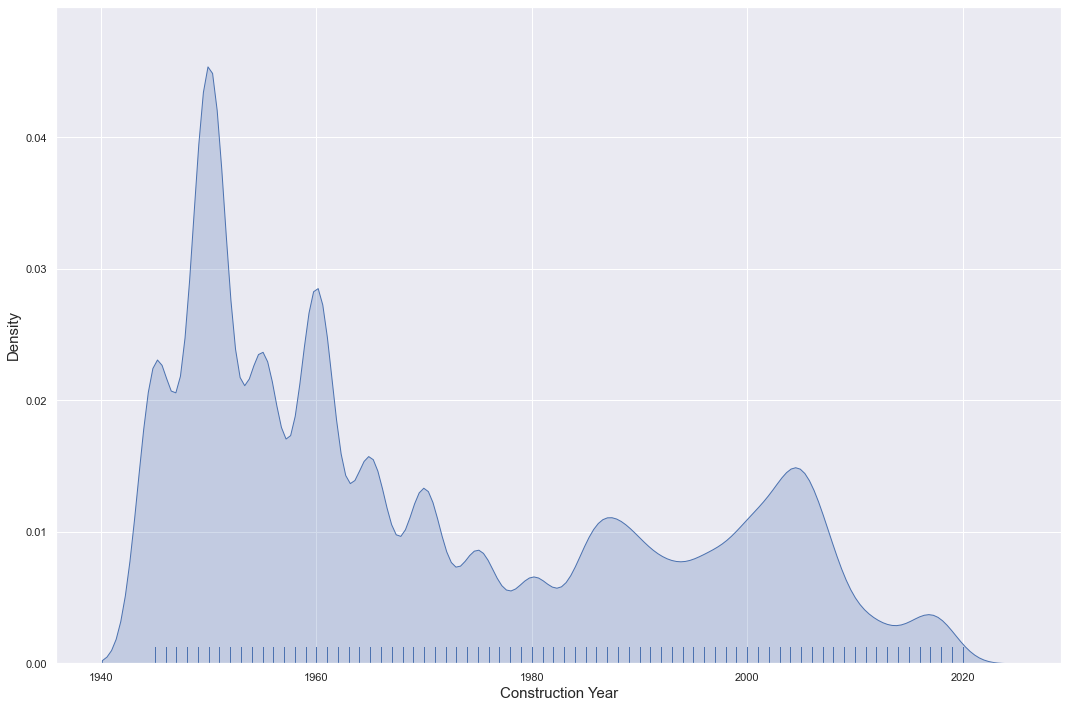

In [230]:
plt.figure(figsize=(15,10))

sns.kdeplot(building_footprints['CNSTRCT_YR'], 
            shade=True)
sns.rugplot(x)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/kde-plot-3-seaborn')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


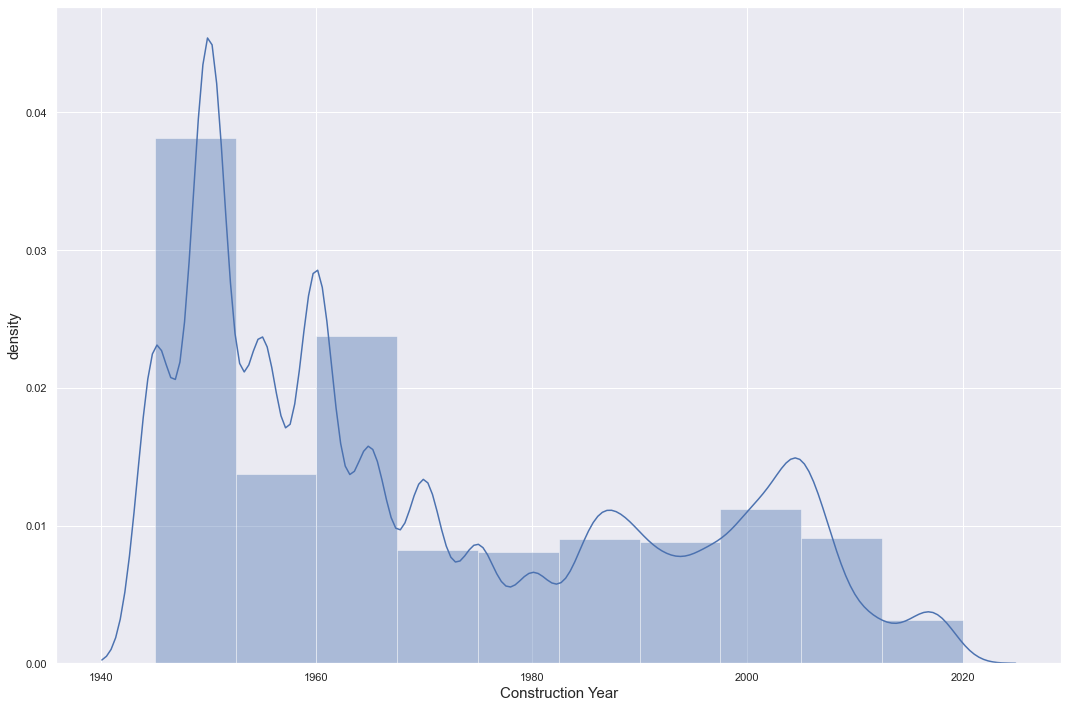

In [231]:
plt.figure(figsize=(15,10))

sns.distplot(building_footprints['CNSTRCT_YR'], 
             bins=10)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/kde-plot-4-seaborn')

### Fitting Parametric Distributions

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


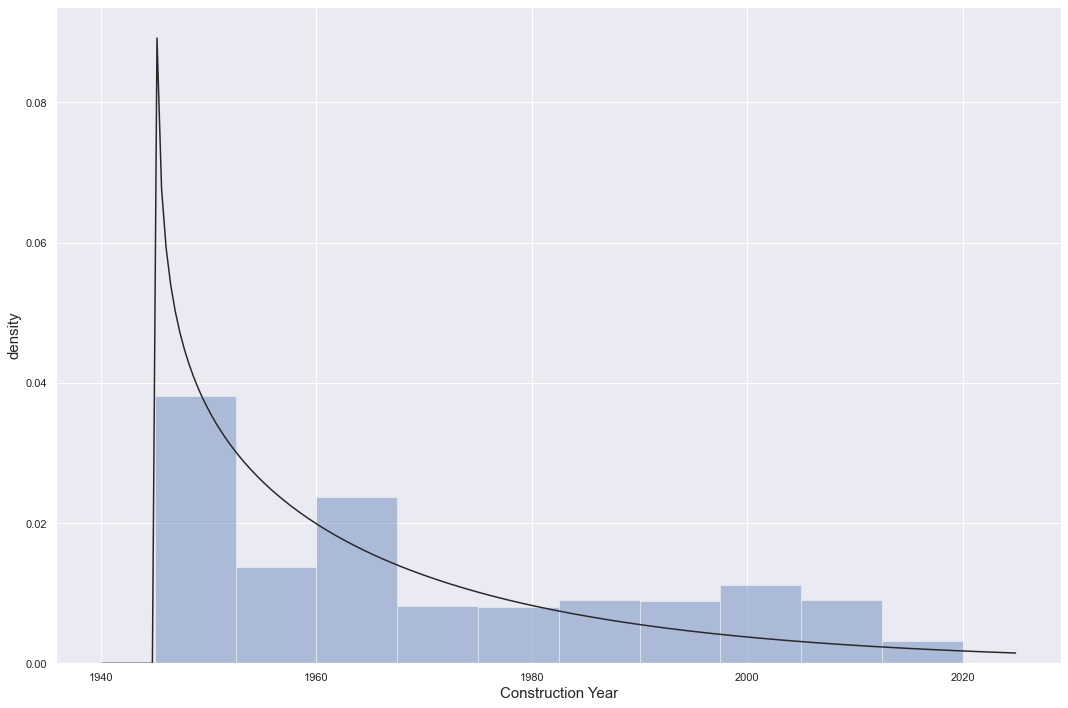

In [232]:
plt.figure(figsize=(15,10))

sns.distplot(building_footprints['CNSTRCT_YR'], 
             kde=False, 
             bins=10, 
             fit=stats.gamma)

plt.xlabel('Construction Year', fontsize=15)
plt.ylabel('density', fontsize=15)
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/param-dist-plot-1-seaborn')

## Plotting Bivariate Distributions

### Scatterplots

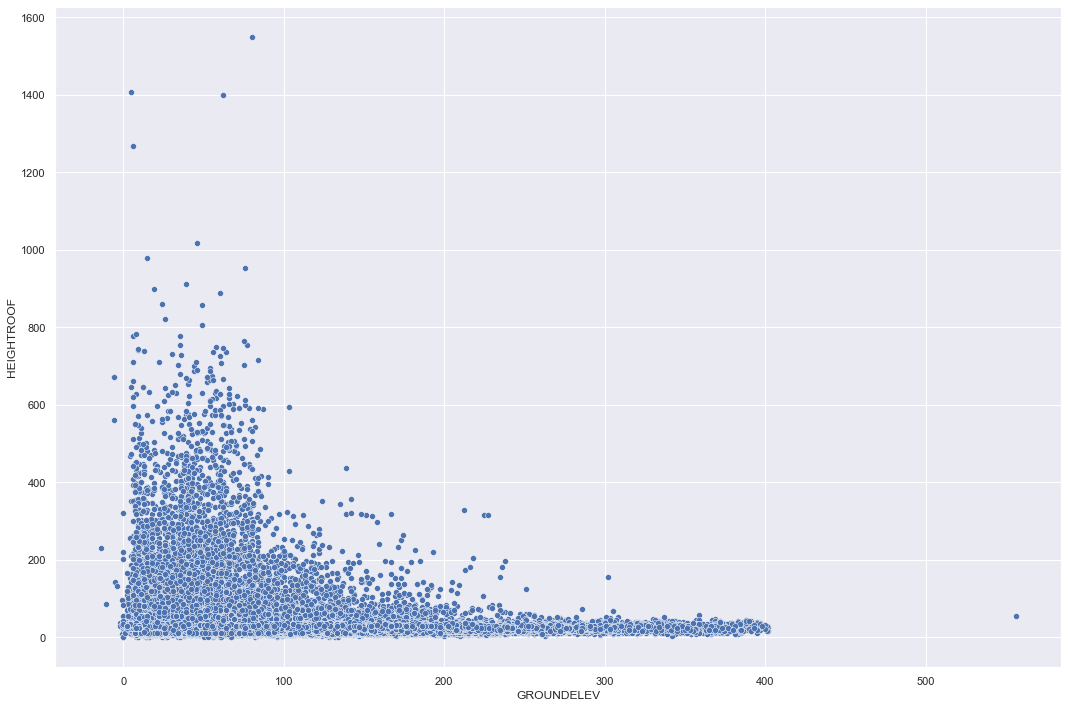

In [233]:
plt.figure(figsize=(15,10))
sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'])

plt.tight_layout()
plt.savefig('figures/scatter-plot-1-seaborn')

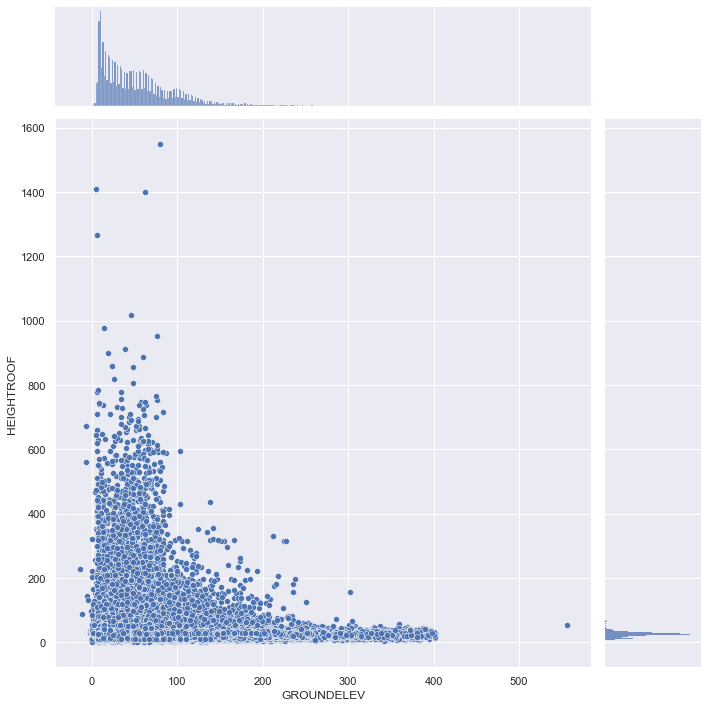

In [234]:
sns.jointplot(x = building_footprints['GROUNDELEV'],
              y = building_footprints['HEIGHTROOF'], 
              height=10)

plt.tight_layout()
plt.savefig('figures/joint-plot-1-seaborn')

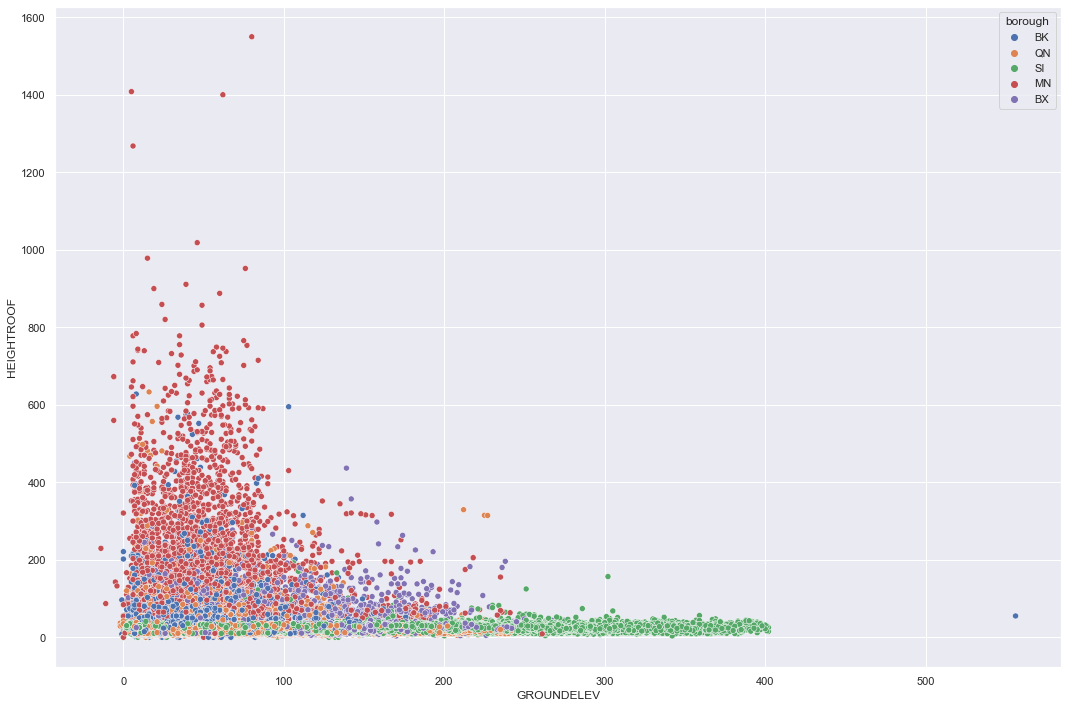

In [235]:
plt.figure(figsize=(15,10))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="borough")

plt.tight_layout()
plt.savefig('figures/scatter-plot-2-seaborn')

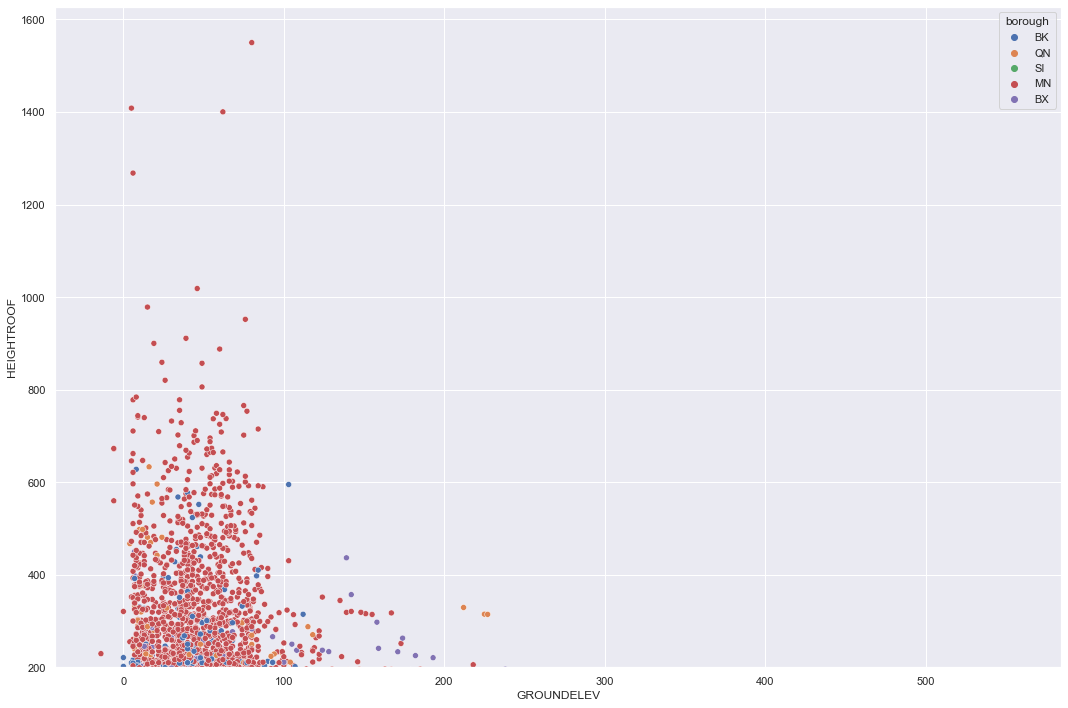

In [236]:
plt.figure(figsize=(15,10))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="borough")

plt.ylim(bottom=200)
plt.tight_layout()
plt.savefig('figures/scatter-plot-3-seaborn')

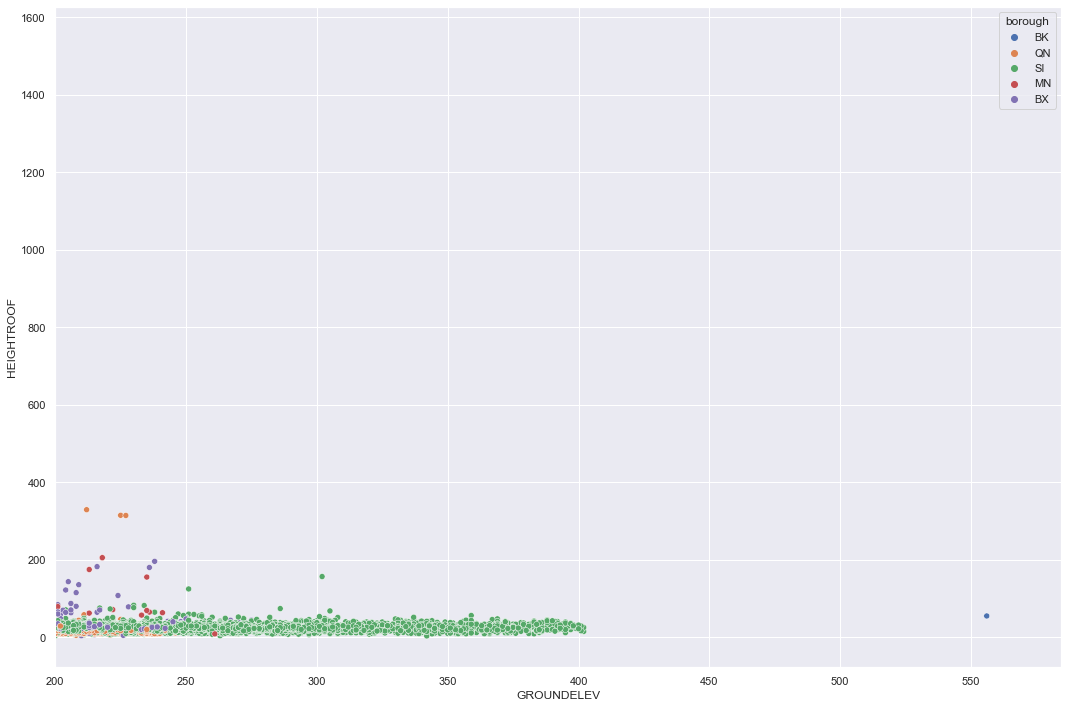

In [237]:
plt.figure(figsize=(15,10))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="borough")

plt.xlim(left=200)
plt.tight_layout()
plt.savefig('figures/scatter-plot-4-seaborn')

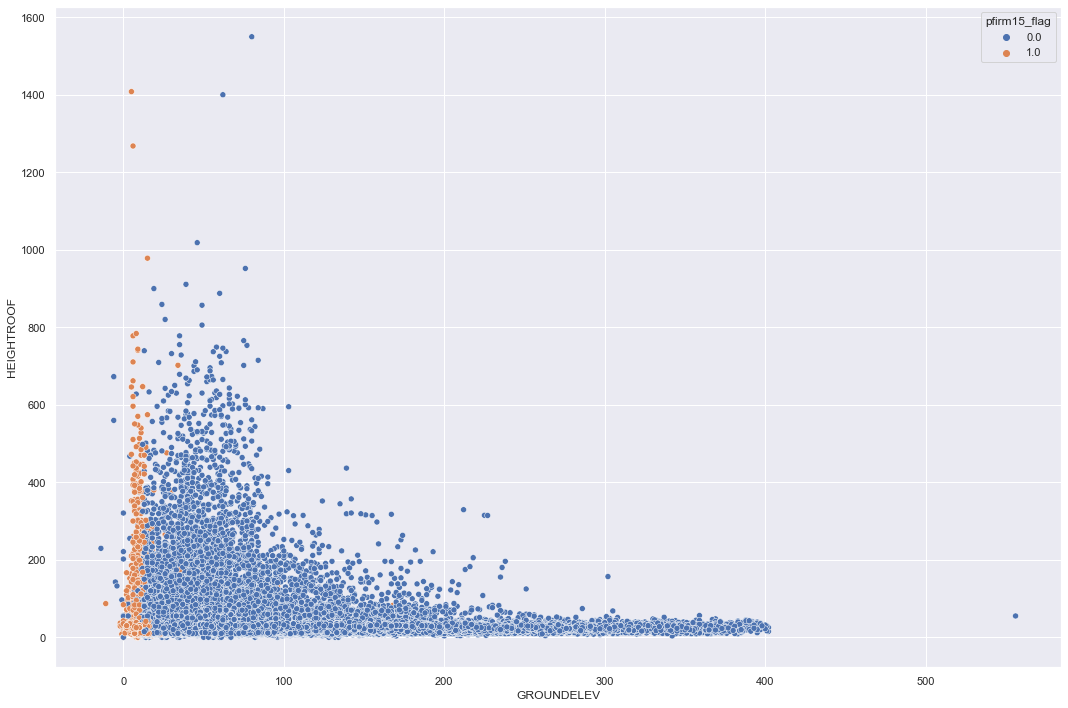

In [238]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag")

plt.tight_layout()
plt.savefig('figures/scatter-plot-5-seaborn')

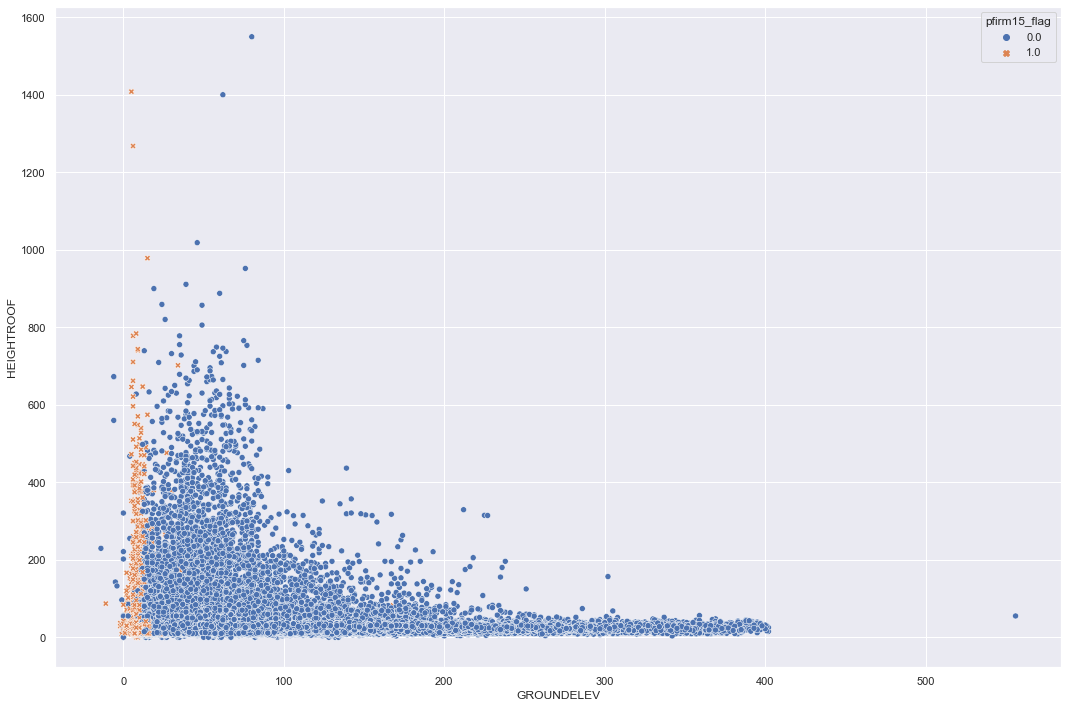

In [239]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag", 
                style="pfirm15_flag")

plt.tight_layout()
plt.savefig('figures/scatter-plot-6-seaborn')

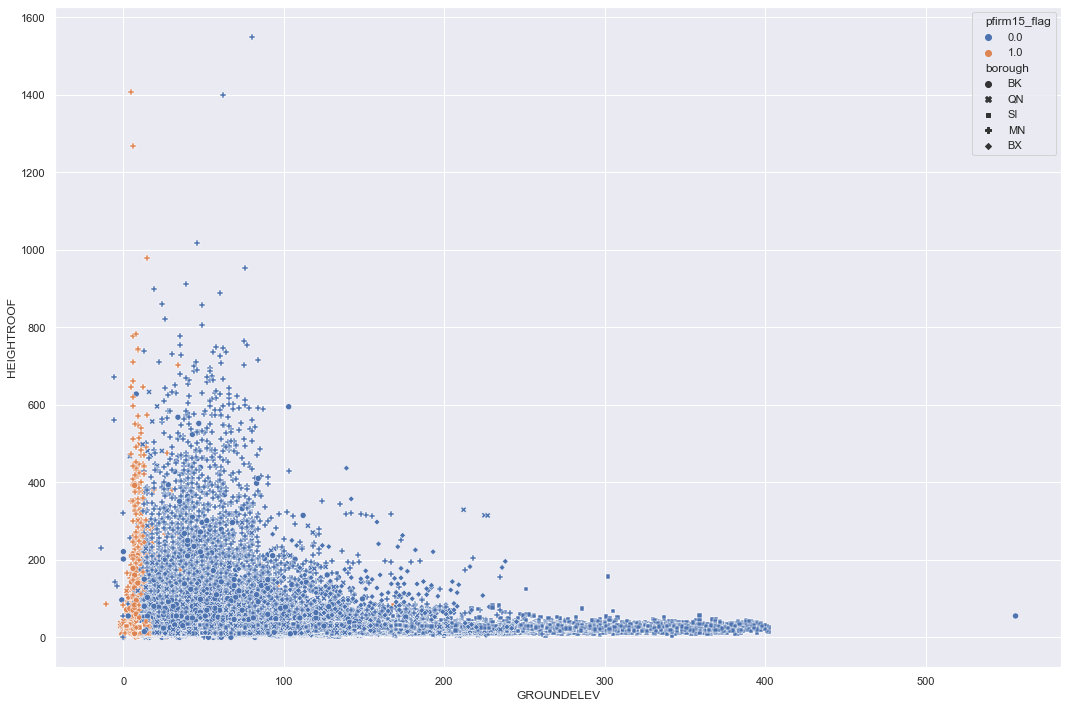

In [240]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="pfirm15_flag", 
                style="borough")

plt.tight_layout()
plt.savefig('figures/scatter-plot-7-seaborn')

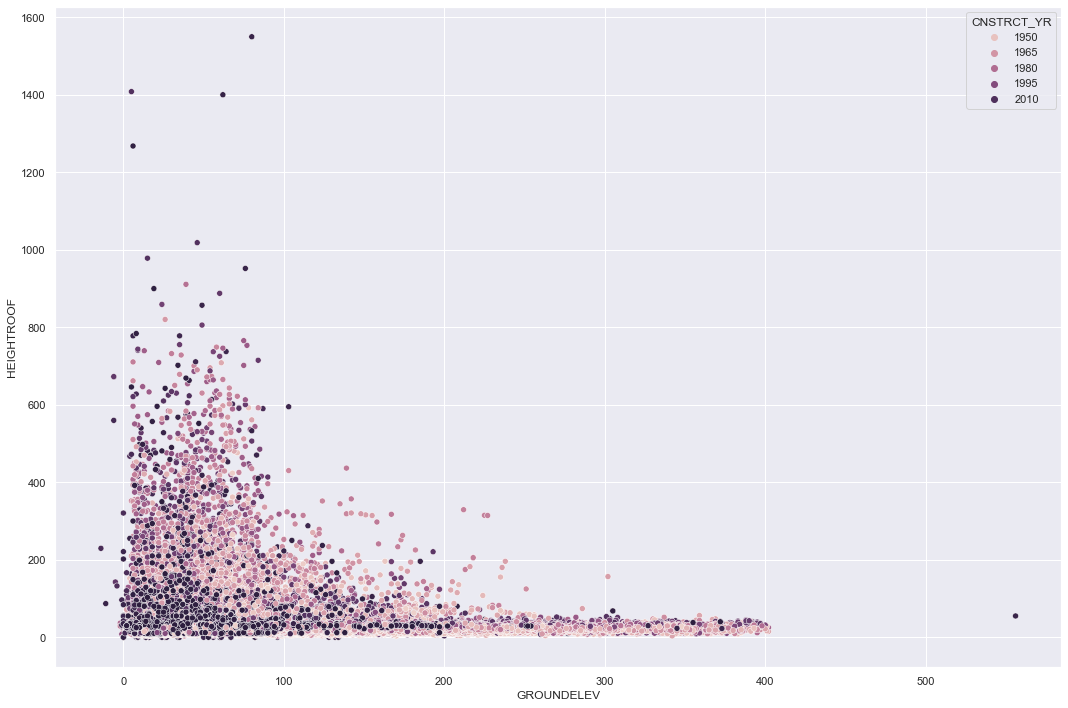

In [241]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="CNSTRCT_YR")

plt.tight_layout()
plt.savefig('figures/scatter-plot-8-seaborn')

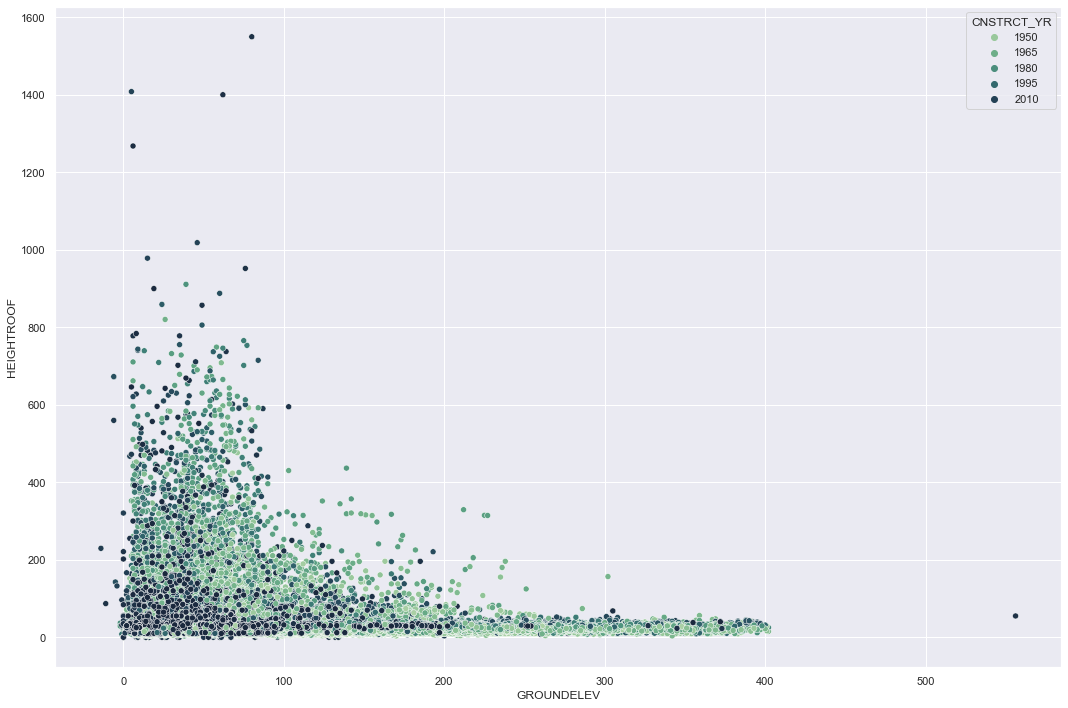

In [242]:
plt.figure(figsize=(15,10))

sns.scatterplot(x = building_footprints['GROUNDELEV'],
                y = building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                hue="CNSTRCT_YR", 
                palette="ch:r=-.5,l=.75")

plt.tight_layout()
plt.savefig('figures/scatter-plot-9-seaborn')

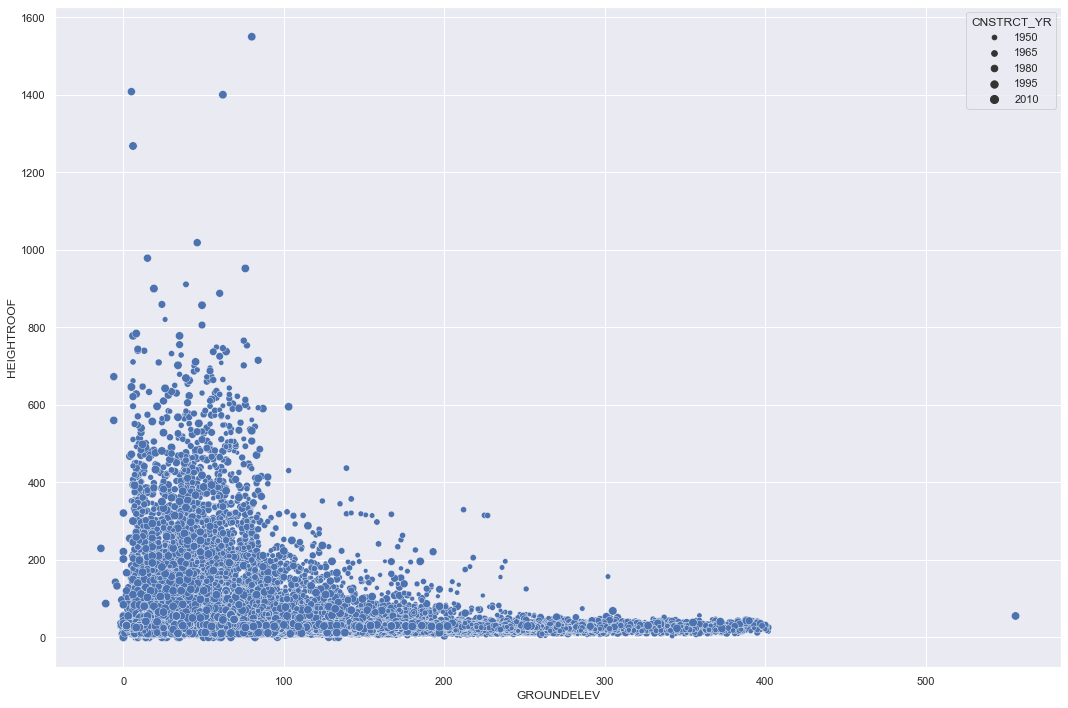

In [243]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                size="CNSTRCT_YR")

plt.tight_layout()
plt.savefig('figures/scatter-plot-10-seaborn')

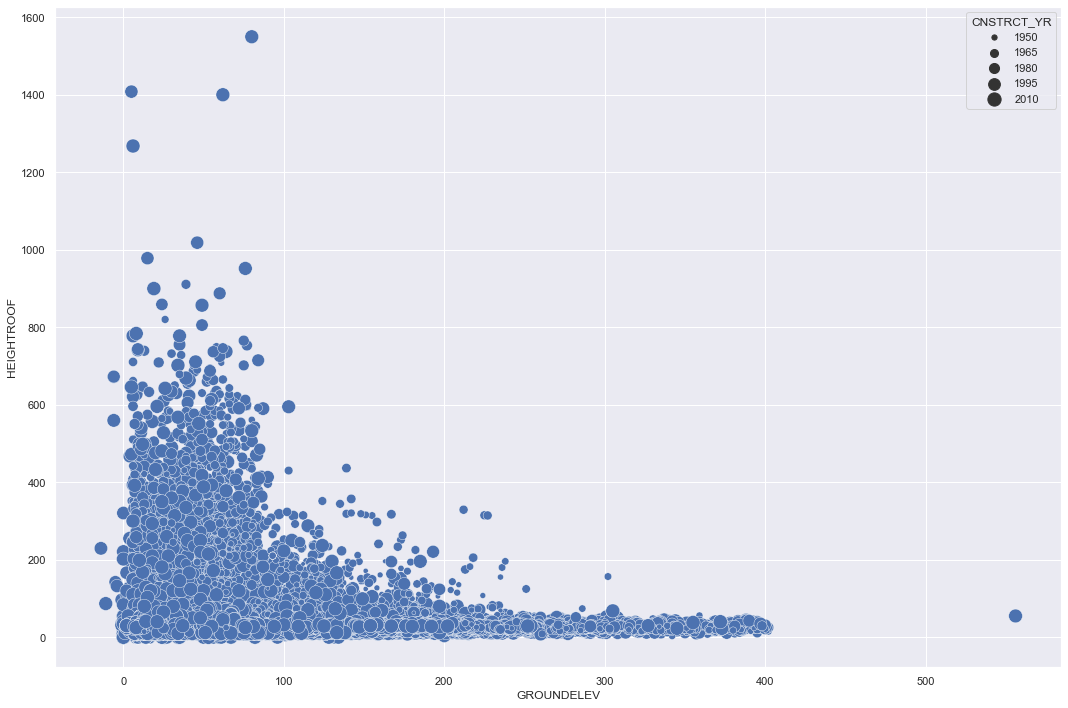

In [244]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                size="CNSTRCT_YR", 
                sizes=(15, 200))

plt.tight_layout()
plt.savefig('figures/scatter-plot-11-seaborn')

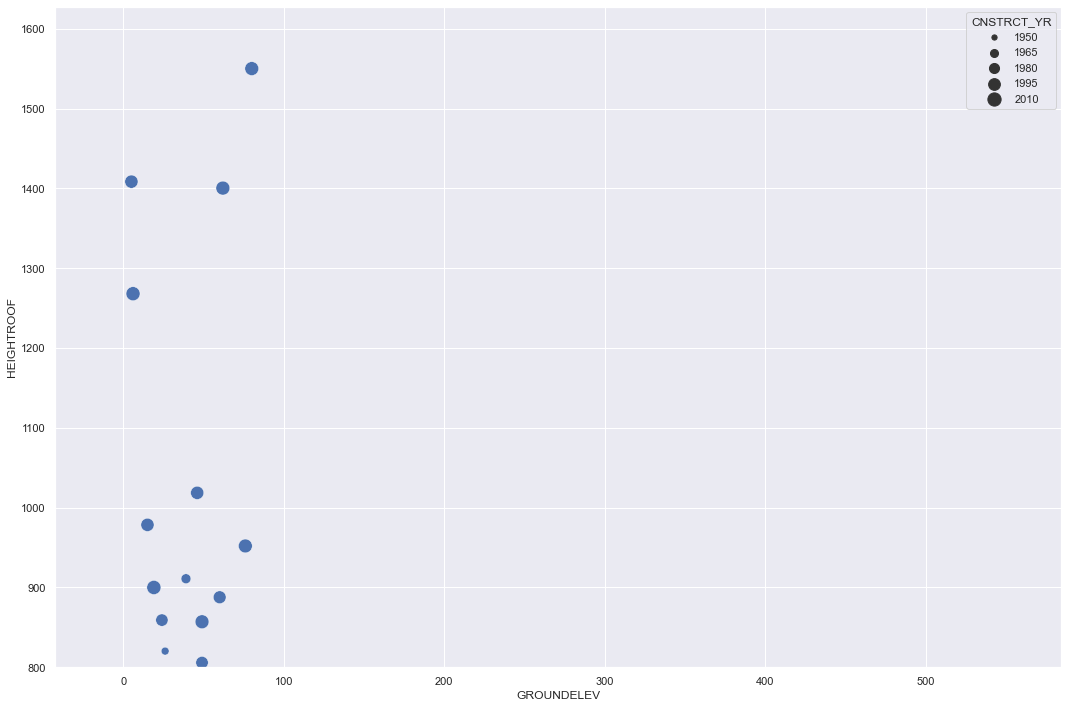

In [245]:
plt.figure(figsize=(15,10))

sns.scatterplot(x=building_footprints['GROUNDELEV'],
                y=building_footprints['HEIGHTROOF'], 
                data=building_footprints, 
                size="CNSTRCT_YR", 
                sizes=(15, 200))

plt.ylim(bottom=800)
plt.tight_layout()
plt.savefig('figures/scatter-plot-12-seaborn')

### Hexbin Plots

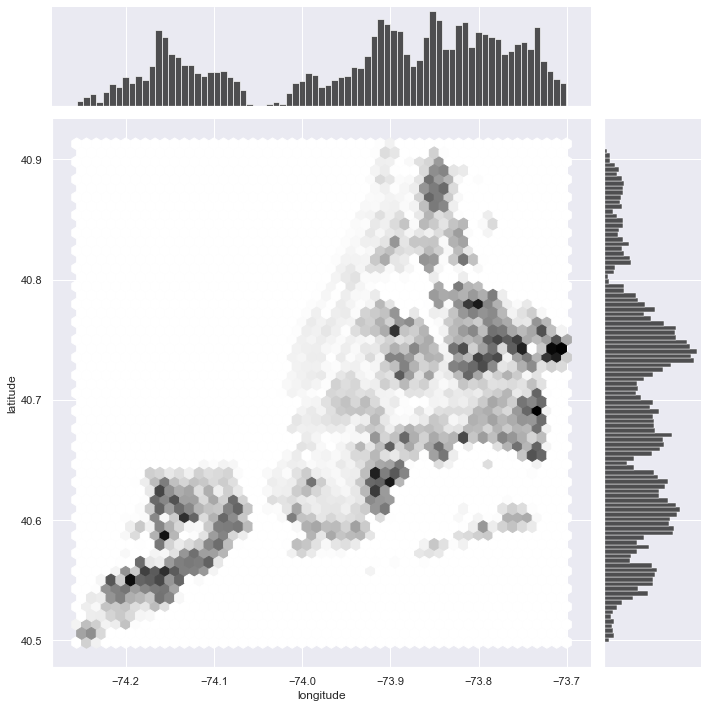

In [246]:
sns.jointplot(x = building_footprints['longitude'],
              y = building_footprints['latitude'], 
              kind="hex", 
              color="k", 
              height=10) 

plt.tight_layout()
plt.savefig('figures/hexbin-plot-1-seaborn')

### Kernel Density Estimation

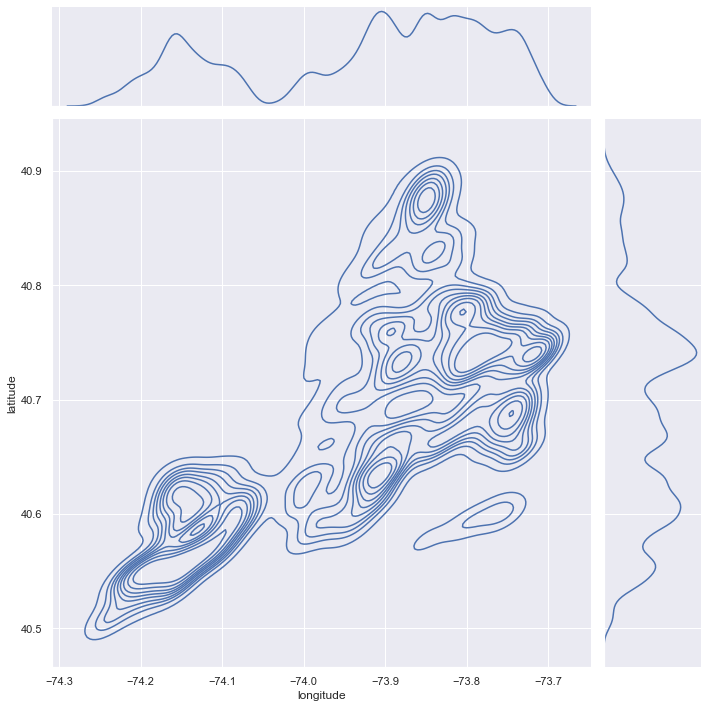

In [247]:
sns.jointplot(x=building_footprints['longitude'], 
              y=building_footprints['latitude'], 
              data=building_footprints, 
              kind="kde", 
              height=10)

plt.tight_layout()
plt.savefig('figures/hexbin-plot-2-seaborn')

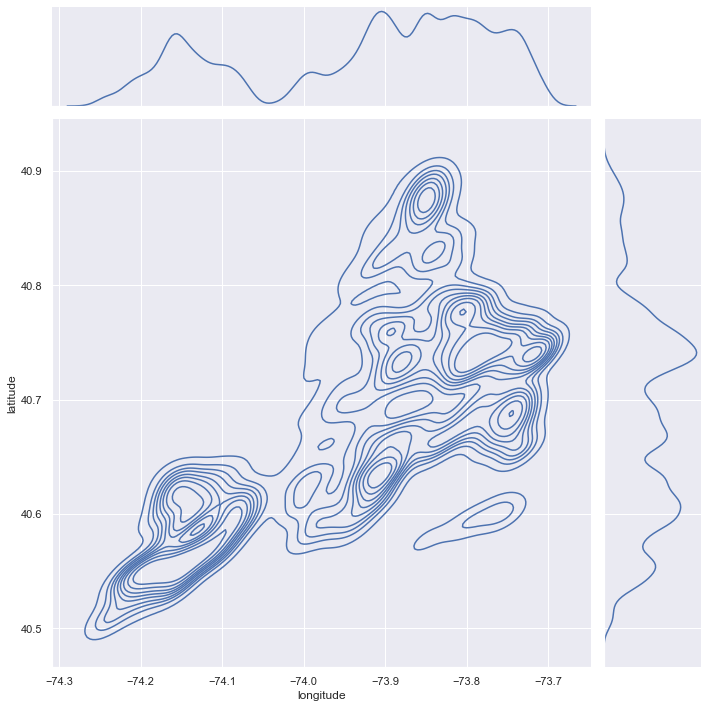

In [248]:
sns.jointplot(x=building_footprints['longitude'], 
              y=building_footprints['latitude'], 
              data=building_footprints, 
              kind="kde", 
              shade=False, 
              height=10)

plt.tight_layout()
plt.savefig('figures/hexbin-plot-3-seaborn')

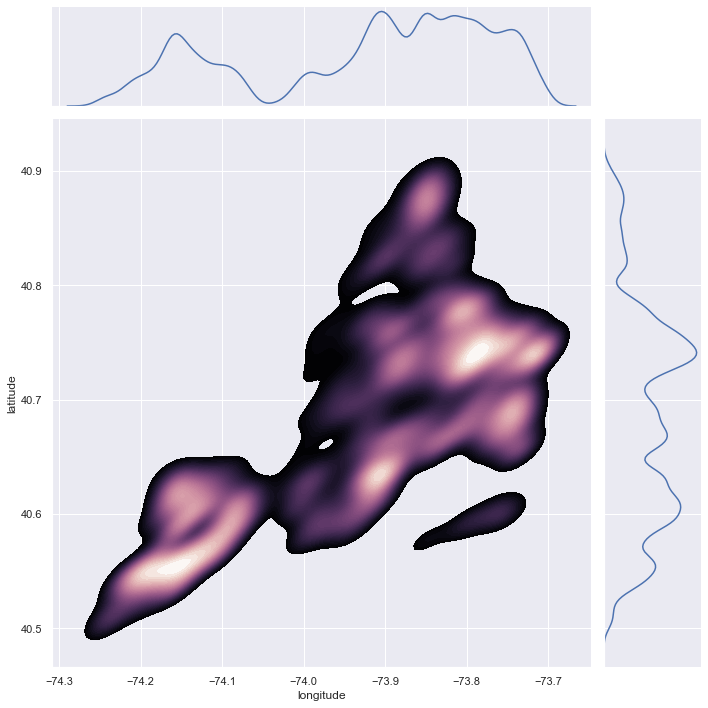

In [249]:
cmap = sns.cubehelix_palette(as_cmap=True, 
                             dark=0, 
                             light=1, 
                             reverse=True)

sns.jointplot(x=building_footprints['longitude'], 
              y=building_footprints['latitude'], 
              data=building_footprints, 
              kind="kde", 
              height=10, 
              cmap=cmap, 
              n_levels=60, 
              shade=True)

plt.tight_layout()
plt.savefig('figures/hexbin-plot-4-seaborn')

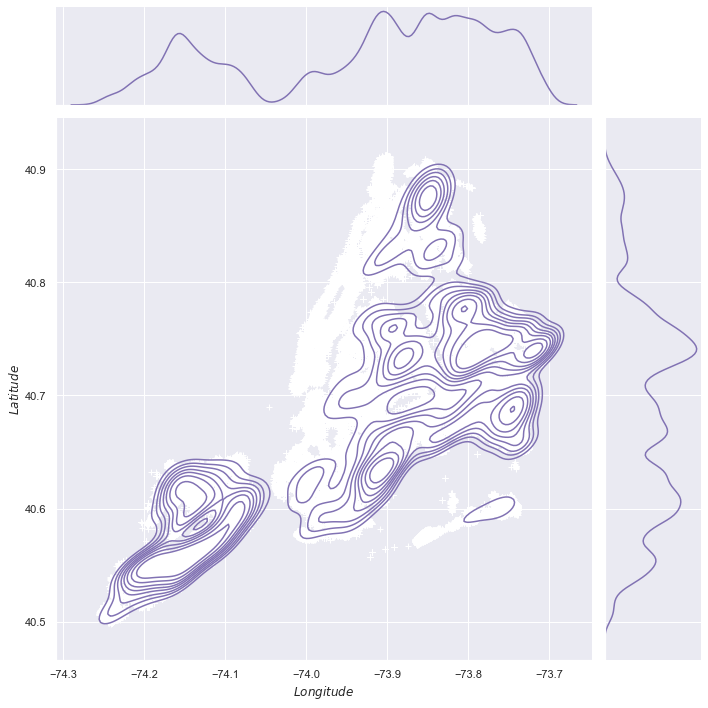

In [250]:
g = sns.jointplot(x=building_footprints['longitude'], 
                  y=building_footprints['latitude'], 
                  data=building_footprints, 
                  kind="kde", 
                  color="m", 
                  height=10)

g.plot_joint(plt.scatter, 
             c="w", 
             s=30, 
             linewidth=1,
             marker="+")

g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$Longitude$", "$Latitude$")
plt.tight_layout()
plt.savefig('figures/hexbin-plot-5-seaborn')

## Visualizing Pairwise Relationships in a Dataset

In [251]:
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383407 entries, 0 to 1083679
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   the_geom              383407 non-null  object 
 1   CNSTRCT_YR            383407 non-null  float64
 2   BIN                   383407 non-null  int64  
 3   NAME                  867 non-null     object 
 4   LSTMODDATE            383407 non-null  object 
 5   LSTSTATYPE            383335 non-null  object 
 6   DOITT_ID              383407 non-null  int64  
 7   HEIGHTROOF            381639 non-null  float64
 8   FEAT_CODE             383405 non-null  float64
 9   GROUNDELEV            383121 non-null  float64
 10  SHAPE_AREA            383407 non-null  float64
 11  SHAPE_LEN             383407 non-null  float64
 12  BASE_BBL              383407 non-null  float64
 13  MPLUTO_BBL            383407 non-null  float64
 14  GEOMSOURCE            383315 non-null  object 
 15 

In [252]:
building_footprints = building_footprints[building_footprints['CNSTRCT_YR'].between(2010, 2020)]

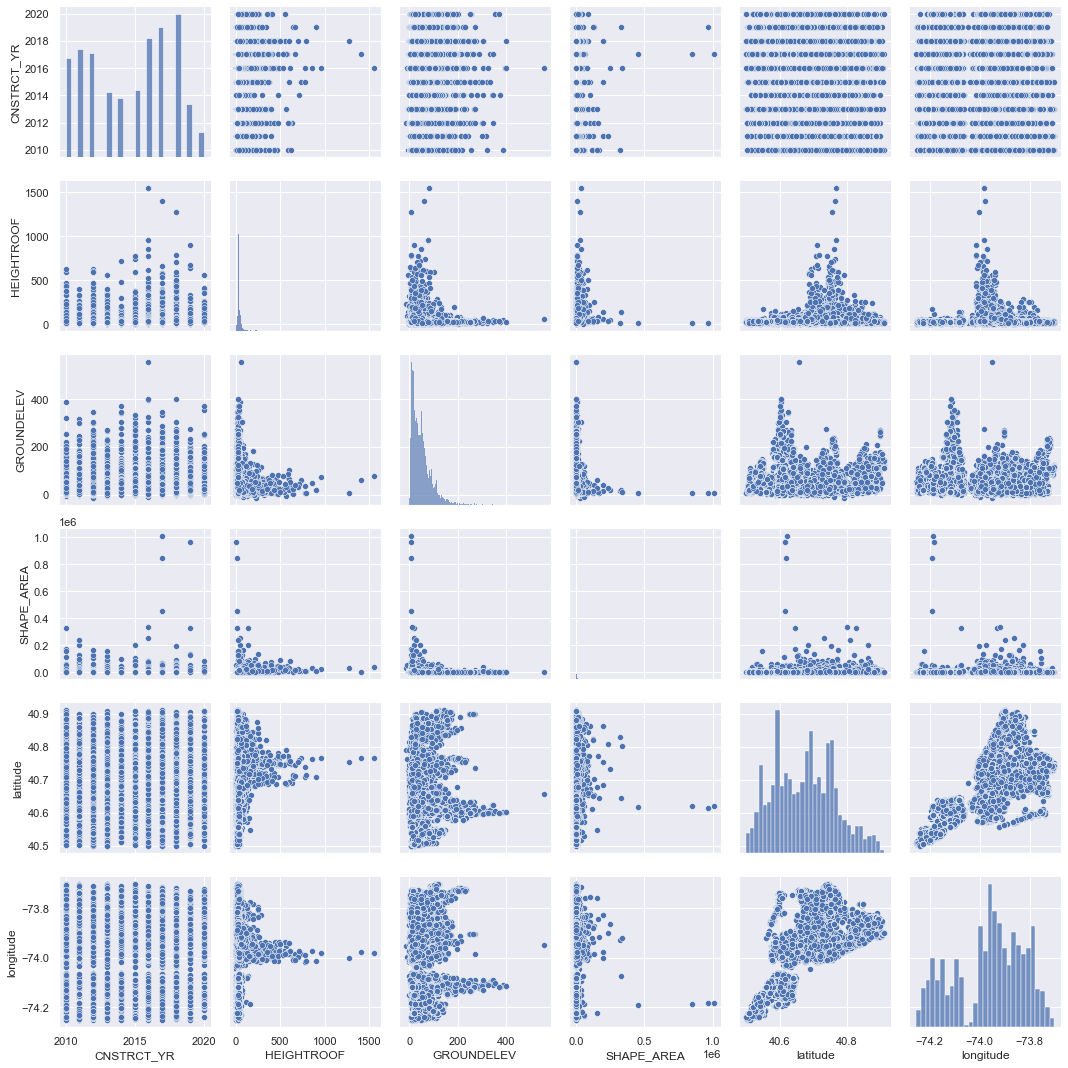

In [253]:
selected = building_footprints[['borough', 
                                'CNSTRCT_YR', 
                                'HEIGHTROOF', 
                                'GROUNDELEV', 
                                'SHAPE_AREA', 
                                'latitude', 
                                'longitude']]

sns.pairplot(selected)

plt.tight_layout()
plt.savefig('figures/pair-plot-1-seaborn')

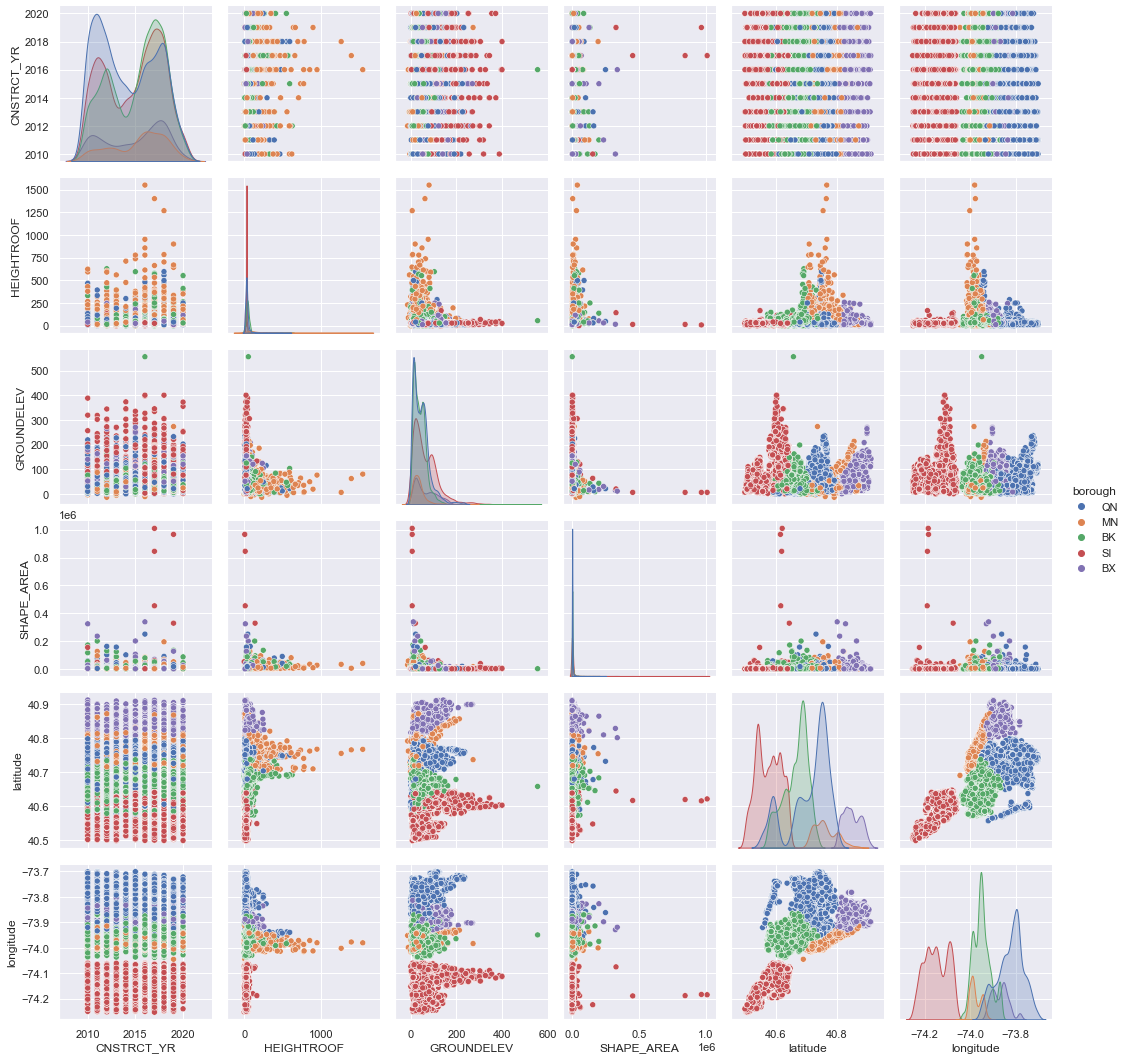

In [254]:
sns.pairplot(selected, 
             hue="borough")

plt.savefig('figures/pair-plot-2-seaborn')

## Plotting with Categorical Data

In [255]:
building_footprints.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13402 entries, 526 to 1083679
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   the_geom              13402 non-null  object 
 1   CNSTRCT_YR            13402 non-null  float64
 2   BIN                   13402 non-null  int64  
 3   NAME                  19 non-null     object 
 4   LSTMODDATE            13402 non-null  object 
 5   LSTSTATYPE            13335 non-null  object 
 6   DOITT_ID              13402 non-null  int64  
 7   HEIGHTROOF            11739 non-null  float64
 8   FEAT_CODE             13400 non-null  float64
 9   GROUNDELEV            13163 non-null  float64
 10  SHAPE_AREA            13402 non-null  float64
 11  SHAPE_LEN             13402 non-null  float64
 12  BASE_BBL              13402 non-null  float64
 13  MPLUTO_BBL            13402 non-null  float64
 14  GEOMSOURCE            13360 non-null  object 
 15  borough        

### Categorical Scatterplots

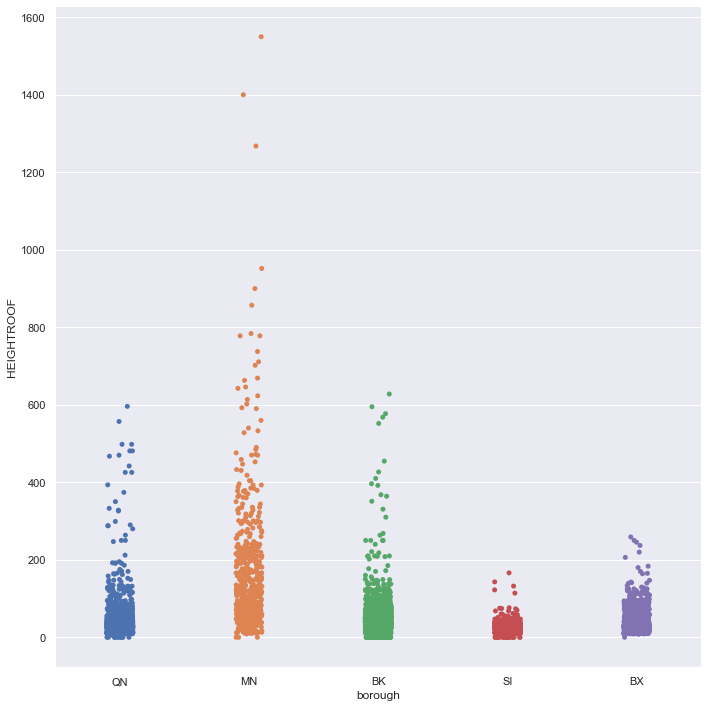

In [256]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            data=building_footprints, 
            height=10)

plt.tight_layout()

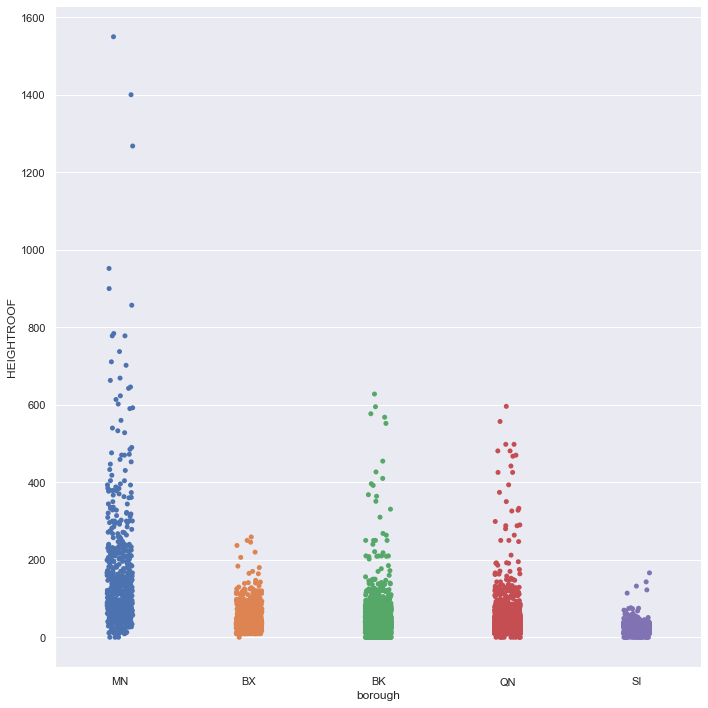

In [257]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            order=["MN", "BX", "BK", "QN", "SI"], 
            data=building_footprints, 
            height=10)

plt.tight_layout()
plt.savefig('figures/cat-scatter-plot-1-seaborn')

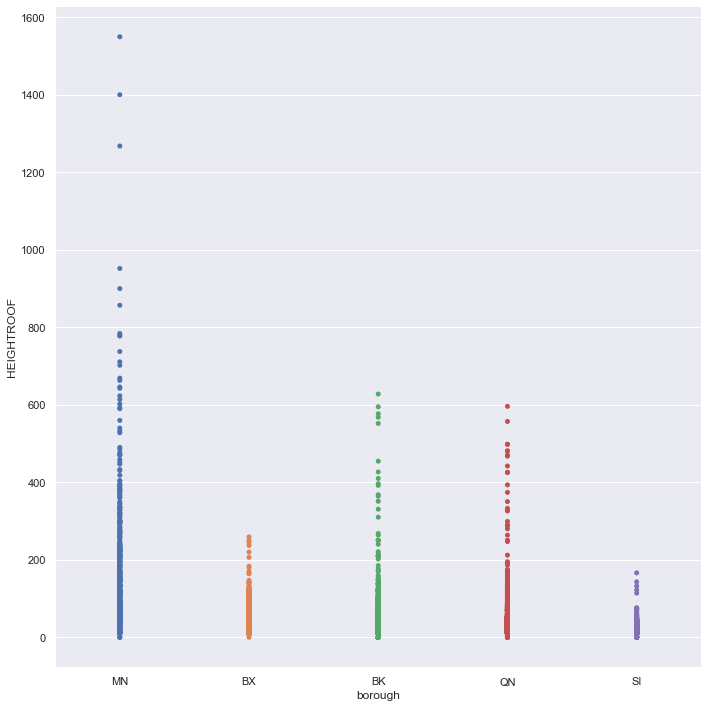

In [258]:
sns.catplot(x='borough', 
            y='HEIGHTROOF', 
            data=building_footprints, 
            order=["MN", "BX", "BK", "QN", "SI"], 
            height=10, 
            jitter=False)

plt.tight_layout()
plt.savefig('figures/cat-scatter-plot-2-seaborn')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 48.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 64.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


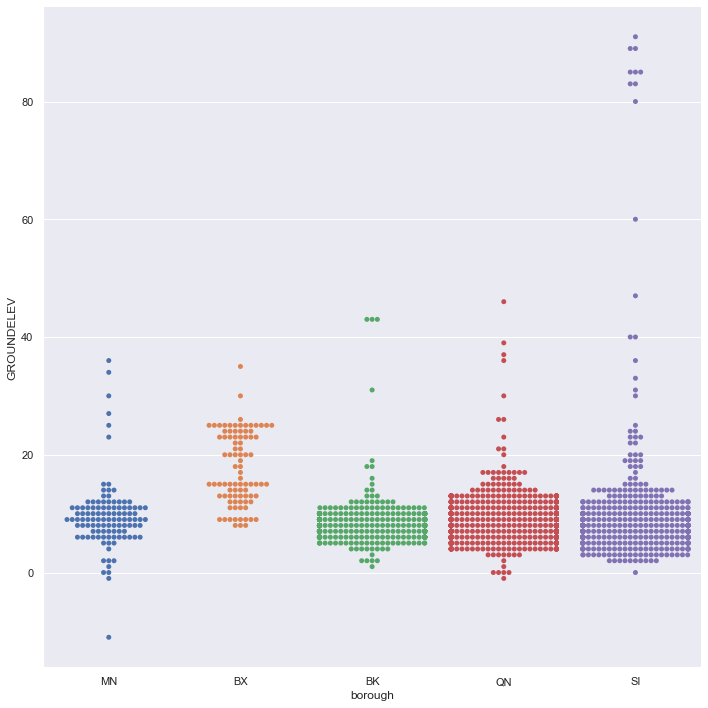

In [259]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order= ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='borough', 
            y='GROUNDELEV', 
            kind='swarm', 
            order=order, 
            data=data, 
            height=10)

plt.tight_layout()
plt.savefig('figures/cat-swarm-plot-1-seaborn')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


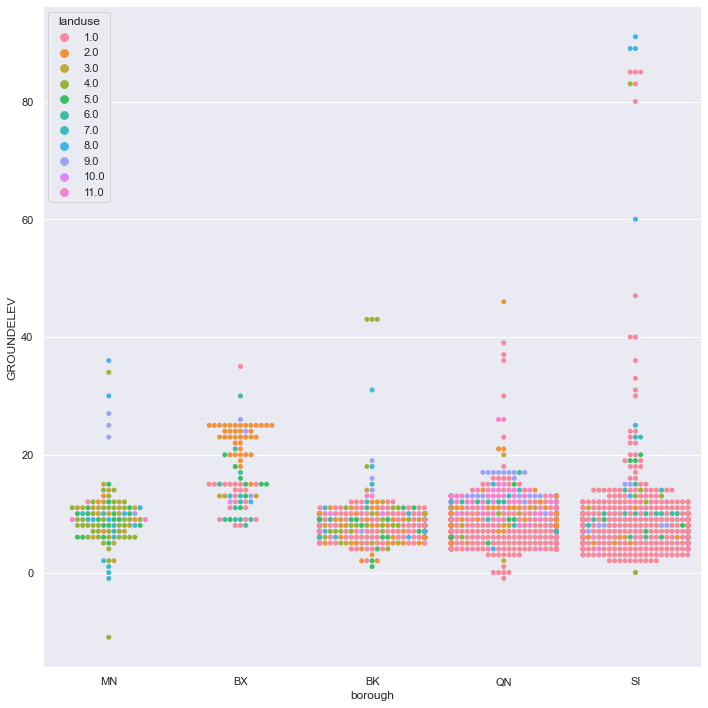

In [260]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='borough', 
            y='GROUNDELEV', 
            hue='landuse', 
            kind='swarm', 
            data=data, 
            order=order, 
            height=10,
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-swarm-plot-2-seaborn')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 64.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


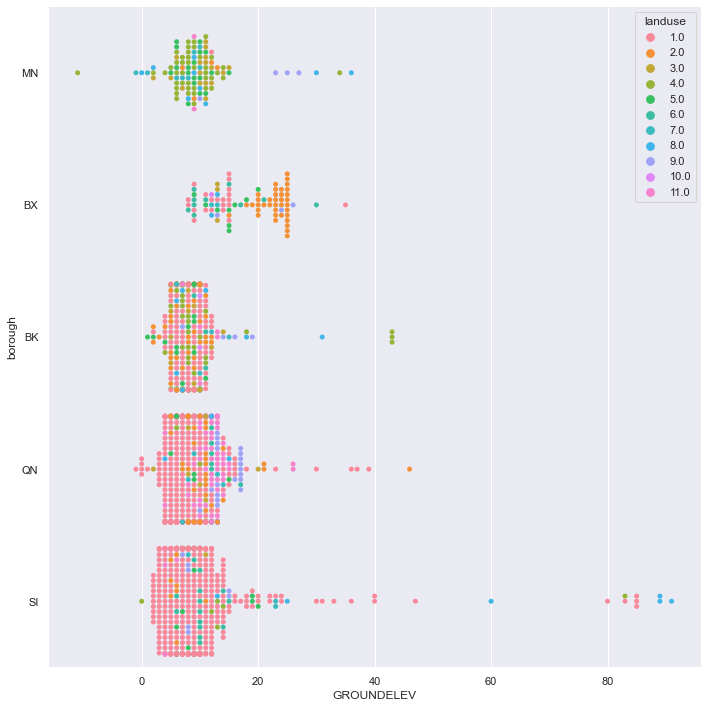

In [261]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x='GROUNDELEV', 
            y='borough', 
            hue='landuse', 
            kind='swarm', 
            data=data, 
            order=order, 
            height=10,
            legend=False)

plt.legend(loc='upper right', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-swarm-plot-3-seaborn')

### Distributions of Observations within Categories

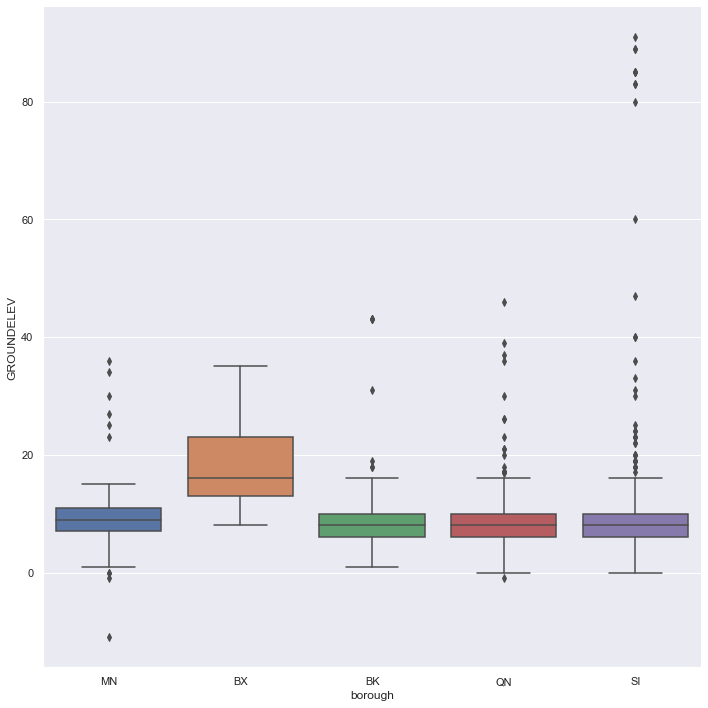

In [262]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="box", 
            data=data, 
            order=order, 
            height=10)

plt.tight_layout()
plt.savefig('figures/cat-box-plot-1-seaborn')

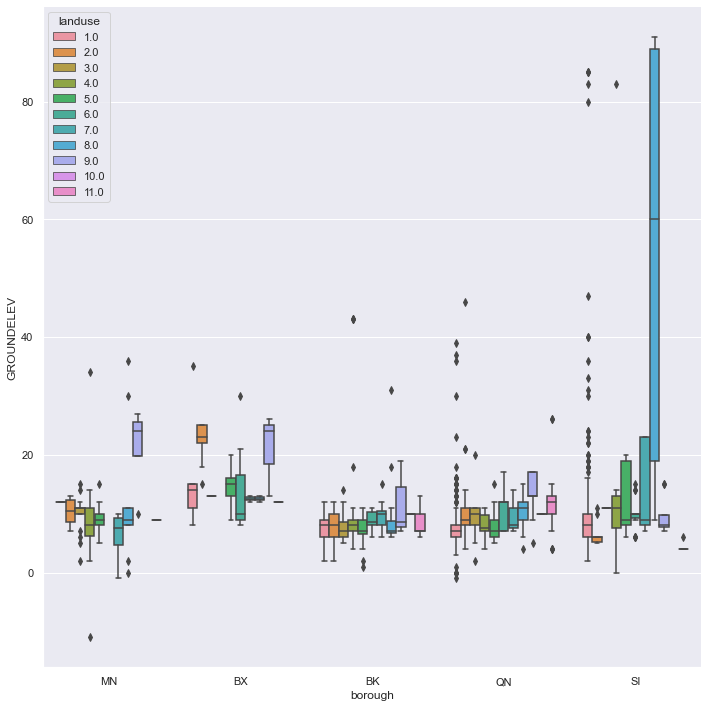

In [263]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="box", 
            hue='landuse', 
            data=data, 
            order=order, 
            height=10,
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-box-plot-2-seaborn')

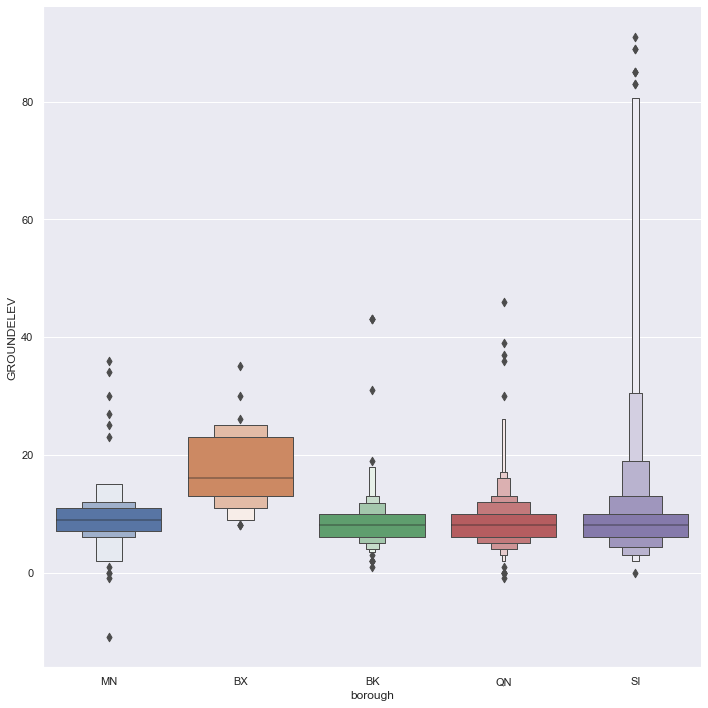

In [264]:
data = building_footprints.loc[building_footprints['pfirm15_flag'] == 1]
order = ["MN", "BX", "BK", "QN", "SI"]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="boxen", 
            data=data, 
            order=order, 
            height=10)

plt.tight_layout()
plt.savefig('figures/cat-boxen-plot-1-seaborn')

### Violinplots

In [265]:
(building_footprints['borough'].isin(["MN", "BK"]))

526        False
527        False
528         True
804        False
810        False
           ...  
1083665    False
1083666     True
1083667     True
1083670    False
1083679    False
Name: borough, Length: 13402, dtype: bool

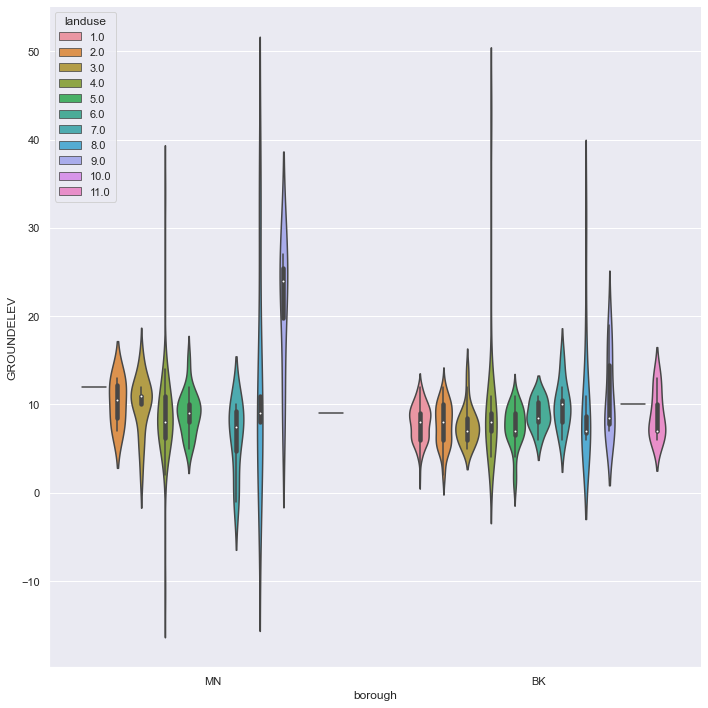

In [266]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-1-seaborn')

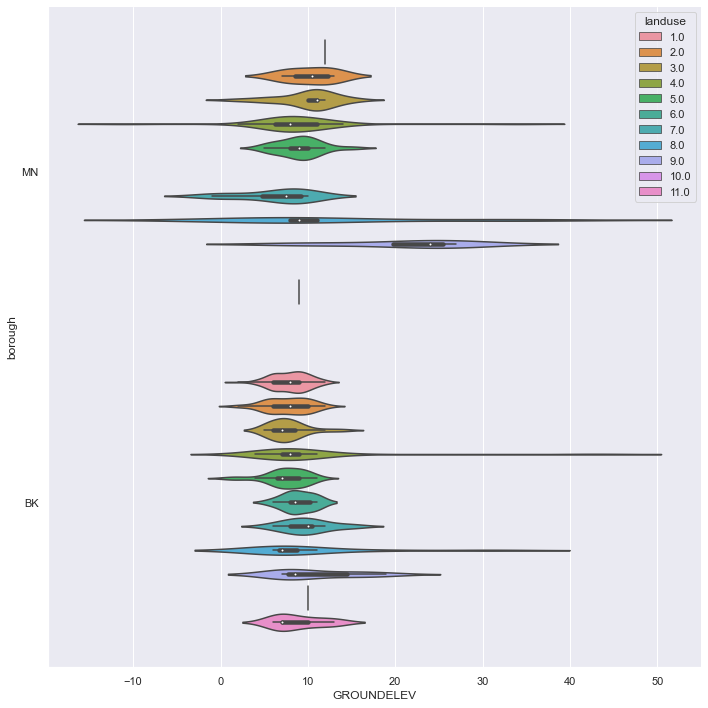

In [267]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                               (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="GROUNDELEV", 
            y="borough", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=10, legend=False)

plt.legend(loc='upper right', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-2-seaborn')

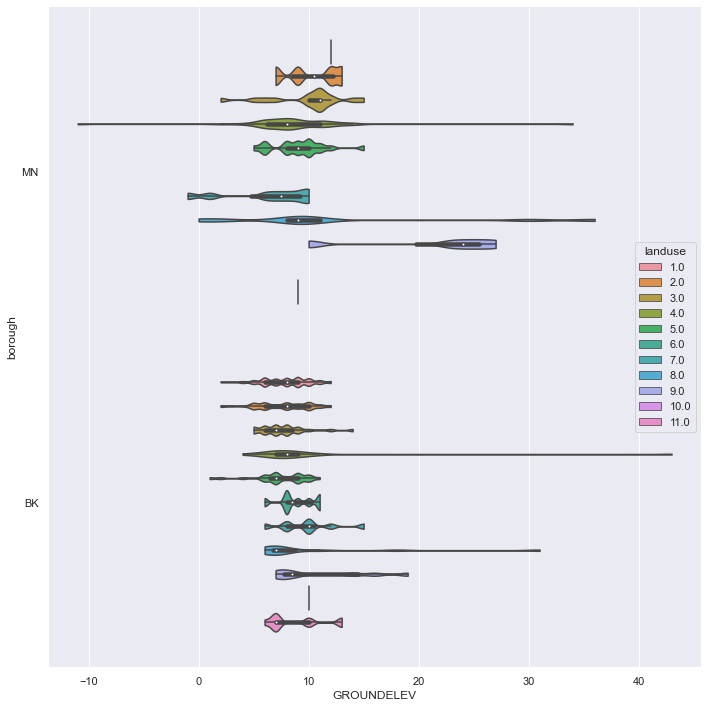

In [268]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="GROUNDELEV", 
            y="borough", 
            kind="violin", 
            hue='landuse', 
            data = data, 
            bw=.15, 
            cut=0, 
            height=10, legend=False)

plt.legend(loc='center right', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-3-seaborn')

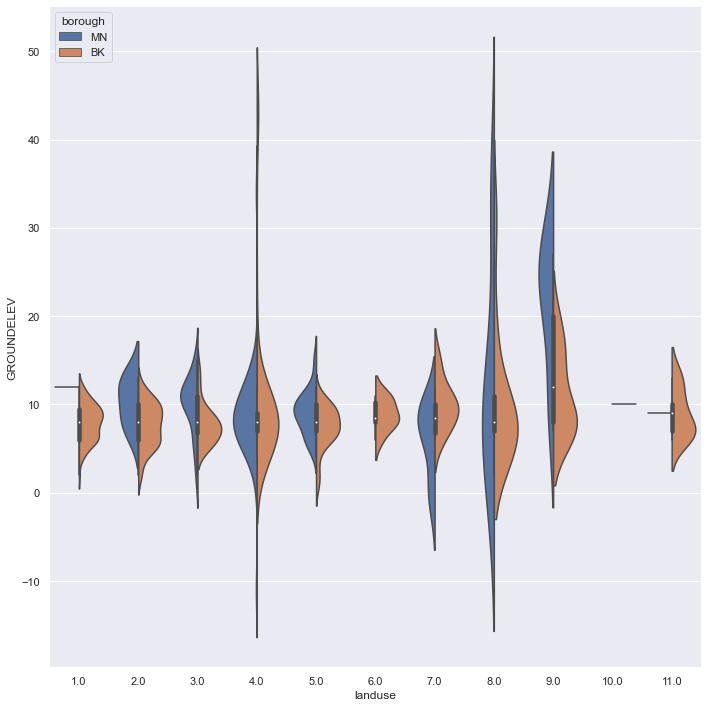

In [269]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="landuse", 
            y="GROUNDELEV", 
            hue="borough", 
            kind="violin", 
            split=True, 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper left', title='borough')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-4-seaborn')

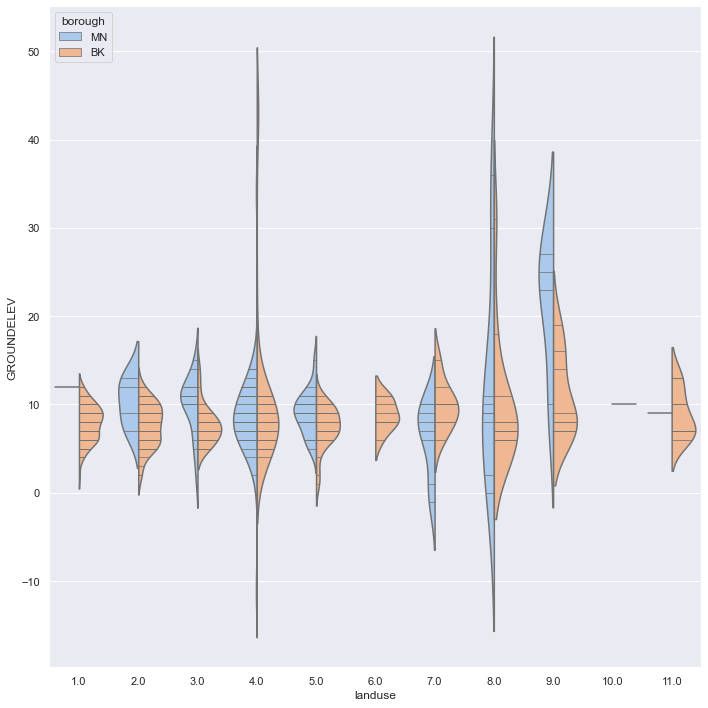

In [270]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="landuse", 
            y="GROUNDELEV", 
            hue="borough", 
            kind="violin", 
            inner="stick", 
            split=True,
            palette="pastel", 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper left', title='borough')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-5-seaborn')

/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 25.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/geribauer/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


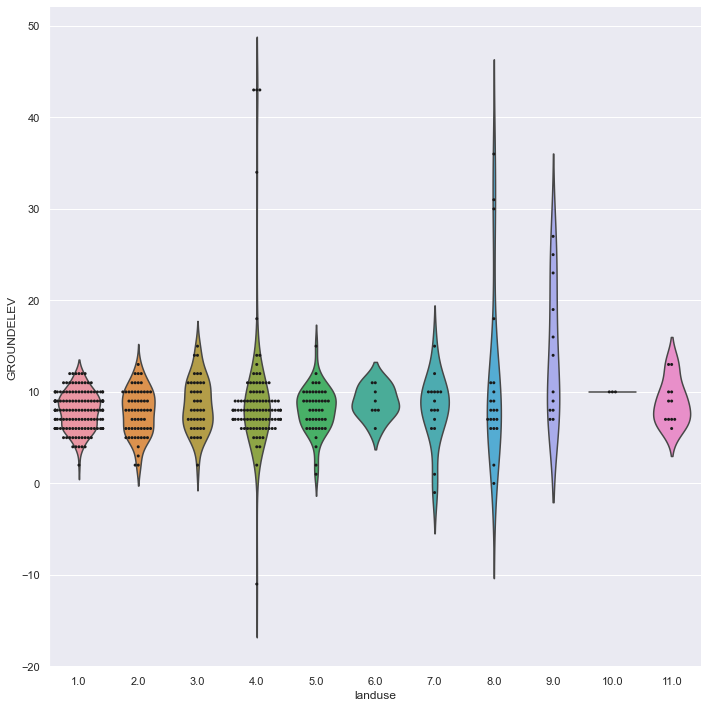

In [271]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN", "BK"]))]

g = sns.catplot(x="landuse", 
                y="GROUNDELEV", 
                kind="violin", 
                inner=None, 
                data=data, 
                height=10)

sns.swarmplot(x="landuse", 
              y="GROUNDELEV", 
              color="k", 
              size=3, 
              data=data, 
              ax=g.ax)

plt.tight_layout()
plt.savefig('figures/cat-violin-plot-6-seaborn')

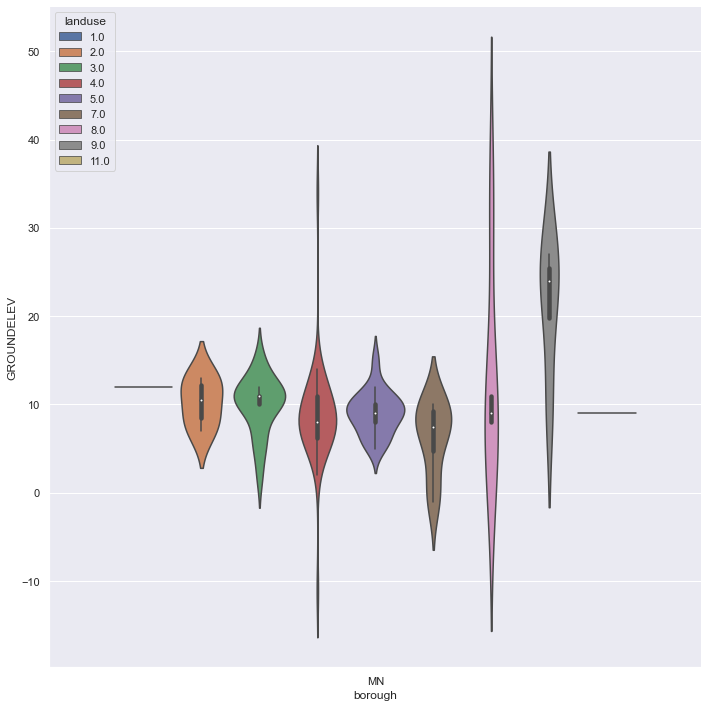

In [272]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                              (building_footprints['borough'].isin(["MN"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-7-seaborn')

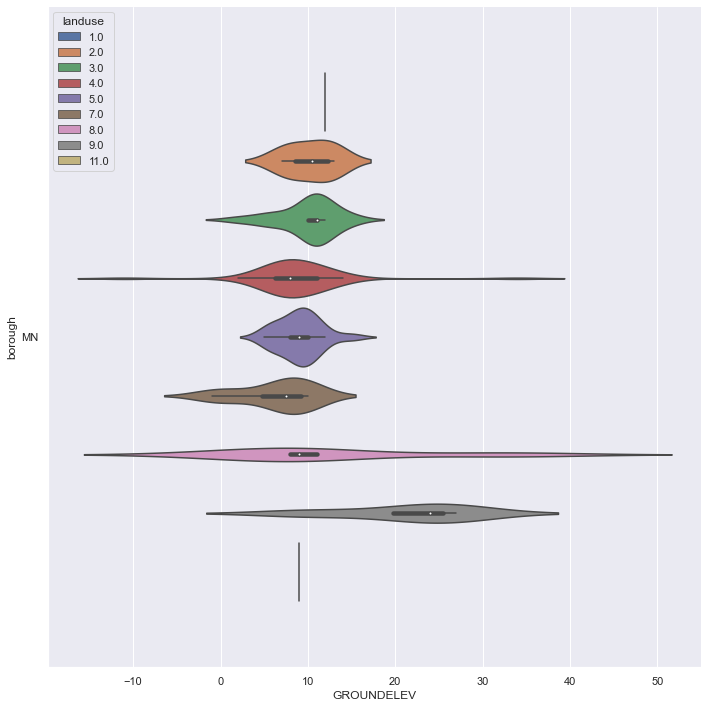

In [273]:
data = building_footprints.loc[(building_footprints['pfirm15_flag'] == 1) & 
                               (building_footprints['borough'].isin(["MN"]))]

sns.catplot(x="GROUNDELEV", 
            y="borough", 
            kind="violin", 
            hue='landuse', 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper left', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-8-seaborn')

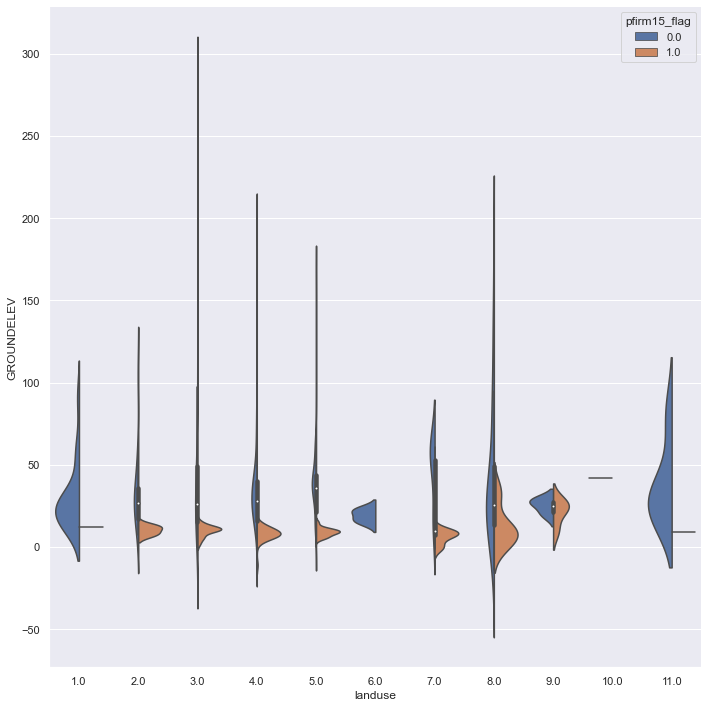

In [274]:
data = building_footprints.loc[building_footprints['borough'].isin(["MN"])]

sns.catplot(x="landuse", 
            y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="violin", 
            split=True, 
            data=data, 
            height=10, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-violin-plot-9-seaborn')

### Statistical Estimation within Categories

In [275]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

['MN', 'BX', 'BK', 'SI', 'QN']

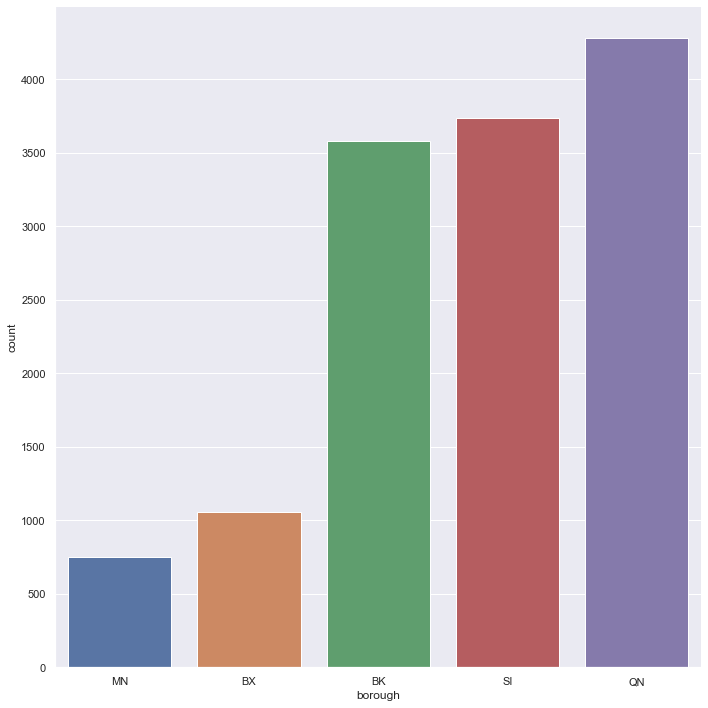

In [276]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", 
            kind="count", 
            data = data, 
            order = order, 
            height = 10)

plt.tight_layout()
plt.savefig('figures/cat-bar-plot-1-seaborn')

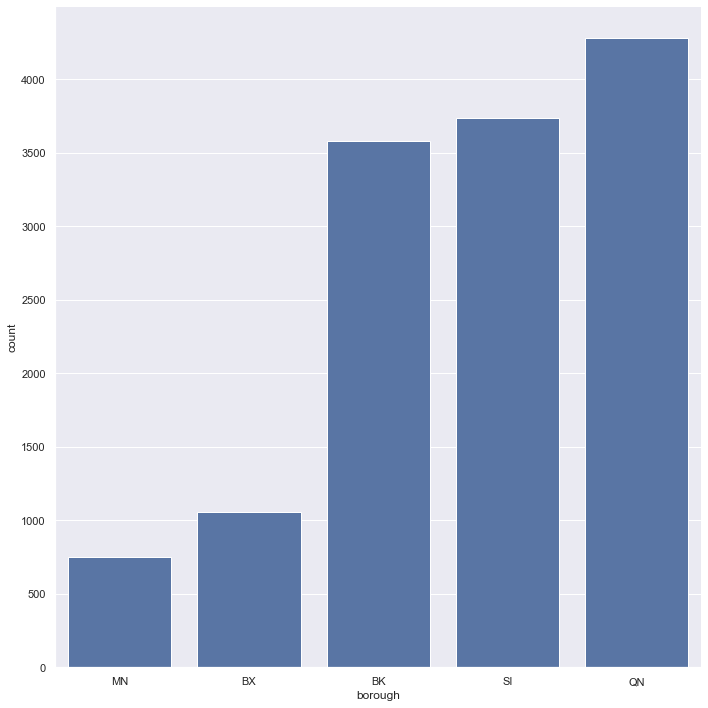

In [277]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", 
            kind="count", 
            data = data, 
            color="C0",
            order = order, 
            height = 10)

plt.tight_layout()
plt.savefig('figures/cat-bar-plot-2-seaborn')

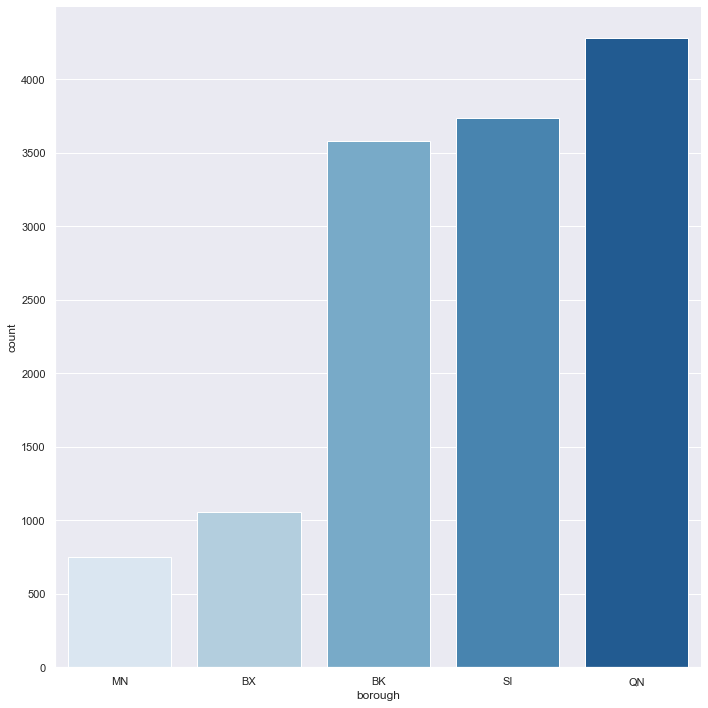

In [278]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", 
            kind="count", 
            palette="Blues", 
            data = data, 
            order = order, 
            height = 10)

plt.tight_layout()
plt.savefig('figures/cat-bar-plot-3-seaborn')

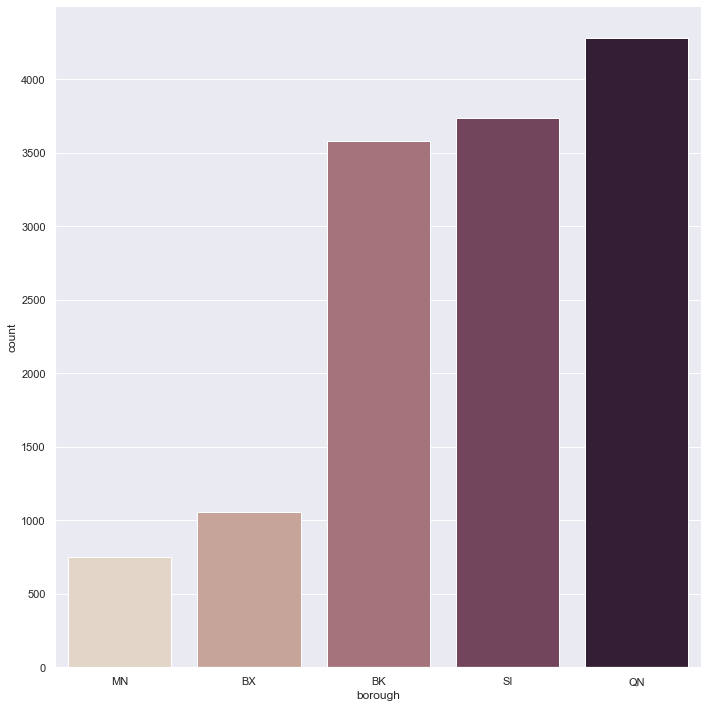

In [279]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", 
            kind="count", 
            palette="ch:.25", 
            data = data, 
            order = order, 
            height = 10)

plt.tight_layout()
plt.savefig('figures/cat-bar-plot-4-seaborn')

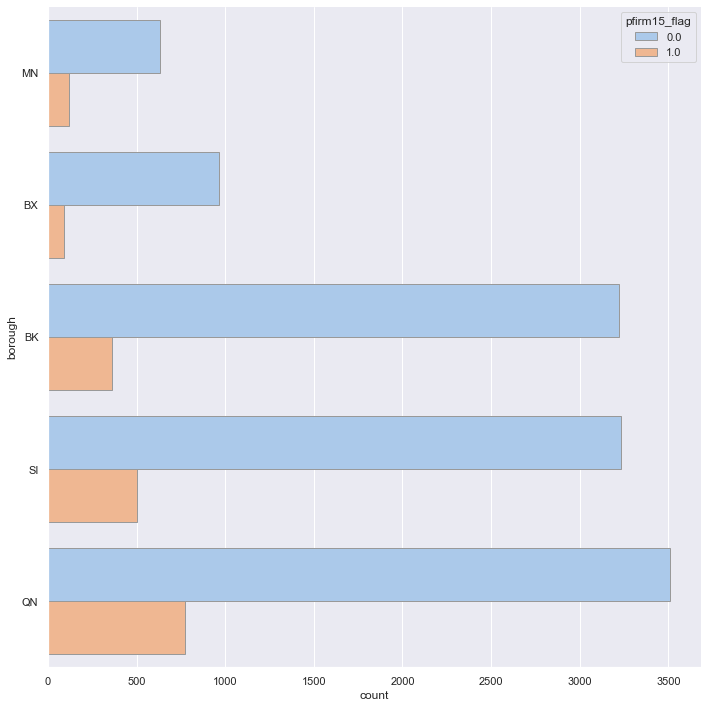

In [280]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(y="borough", 
            hue="pfirm15_flag", 
            kind="count",
            palette="pastel", 
            edgecolor=".6",
            data=data, 
            order=order, 
            height = 10, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-bar-plot-5-seaborn')

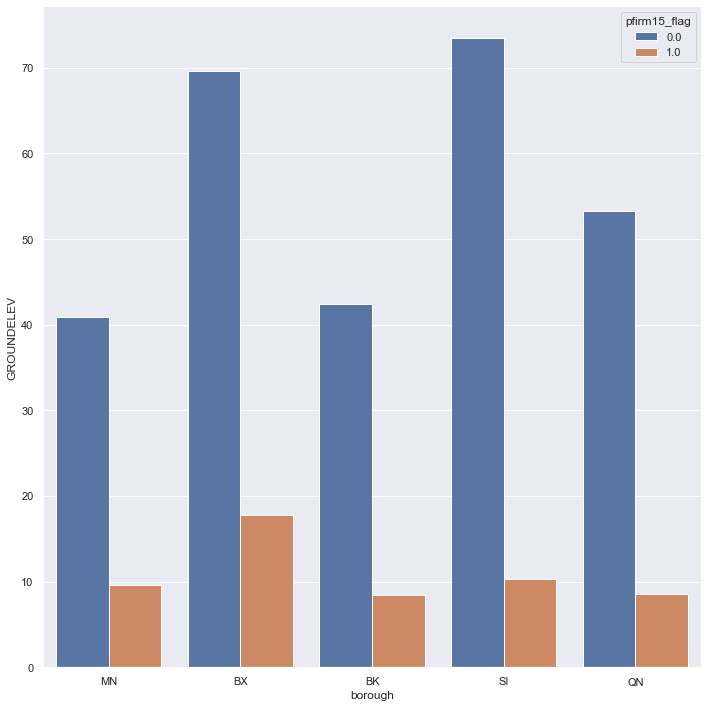

In [281]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="bar", 
            data=data,
            order=order, 
            height = 10, 
            ci=None, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-bar-plot-6-seaborn')

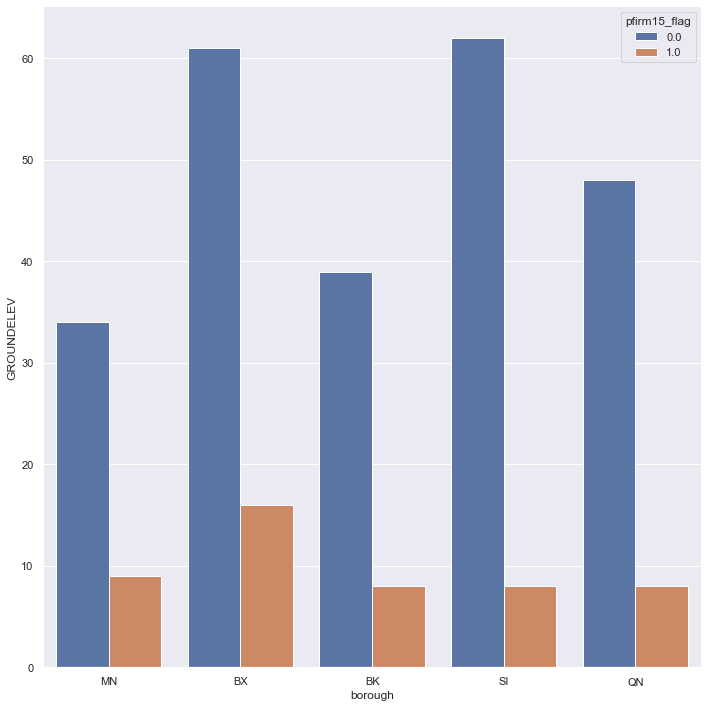

In [282]:
idx = building_footprints.groupby('borough')['DOITT_ID'].count().sort_values()
idx = idx.index
idx.tolist()

data = building_footprints
order = idx.tolist()

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="bar", 
            data=data,
            order=order, 
            height = 10, 
            estimator=np.median, 
            ci=None, 
            legend=False)

plt.legend(loc='upper right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-bar-plot-7-seaborn')

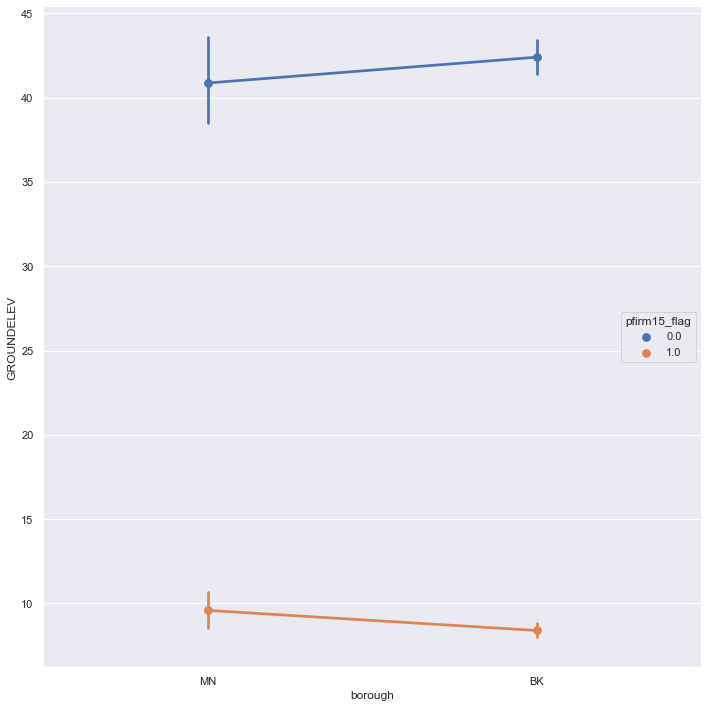

In [283]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="point", 
            data=data,
            height=10, 
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-point-plot-1-seaborn')

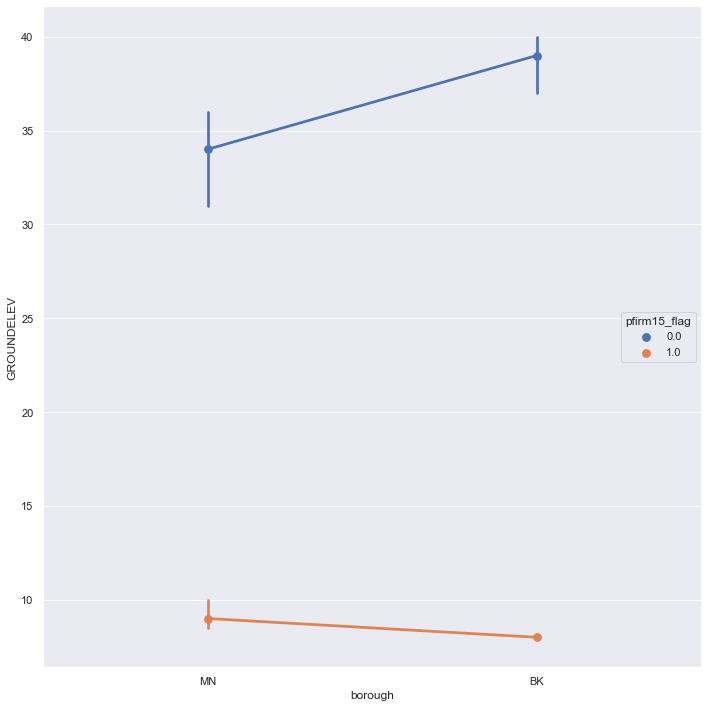

In [284]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            hue="pfirm15_flag", 
            kind="point", 
            data=data,
            height = 10, 
            estimator=np.median,
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-point-plot-2-seaborn')

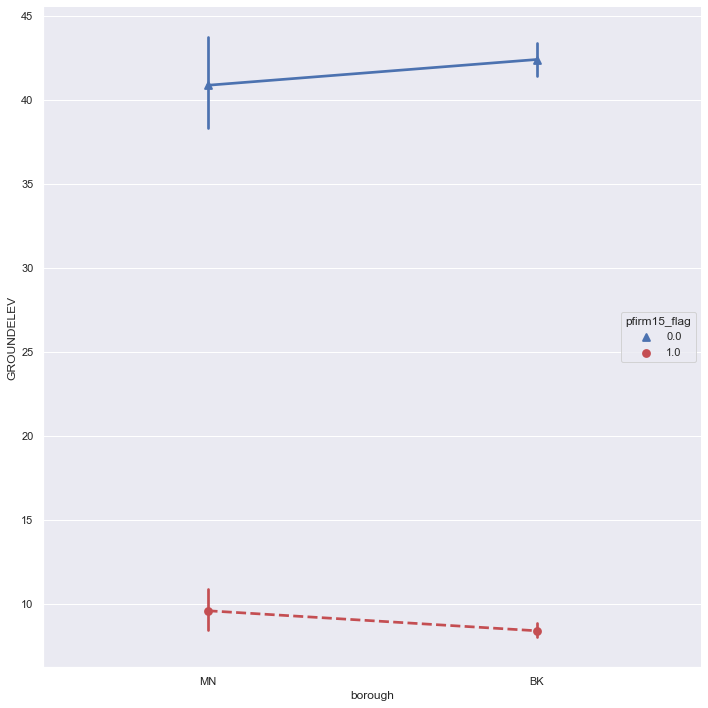

In [285]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            hue="pfirm15_flag",
            palette={0.0: "b", 1.0: "r"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", 
            data=data, 
            height = 10,
            legend=False)

plt.legend(loc='center right', title='pfirm15_flag')
plt.tight_layout()
plt.savefig('figures/cat-point-plot-3-seaborn')

### Showing Multiple Relationships with Facets

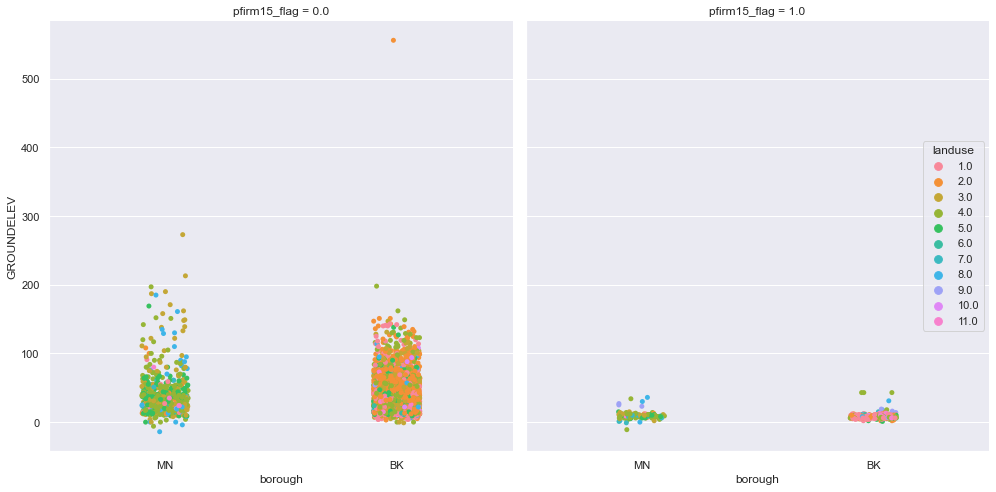

In [286]:
data = building_footprints.loc[(building_footprints['borough'].isin(["MN", "BK"]))]

sns.catplot(x="borough", 
            y="GROUNDELEV", 
            hue="landuse",
            col="pfirm15_flag", 
            height = 7, 
            data=data,
            legend=False)

plt.legend(loc='center right', title='landuse')
plt.tight_layout()
plt.savefig('figures/cat-facets-plot-1-seaborn')

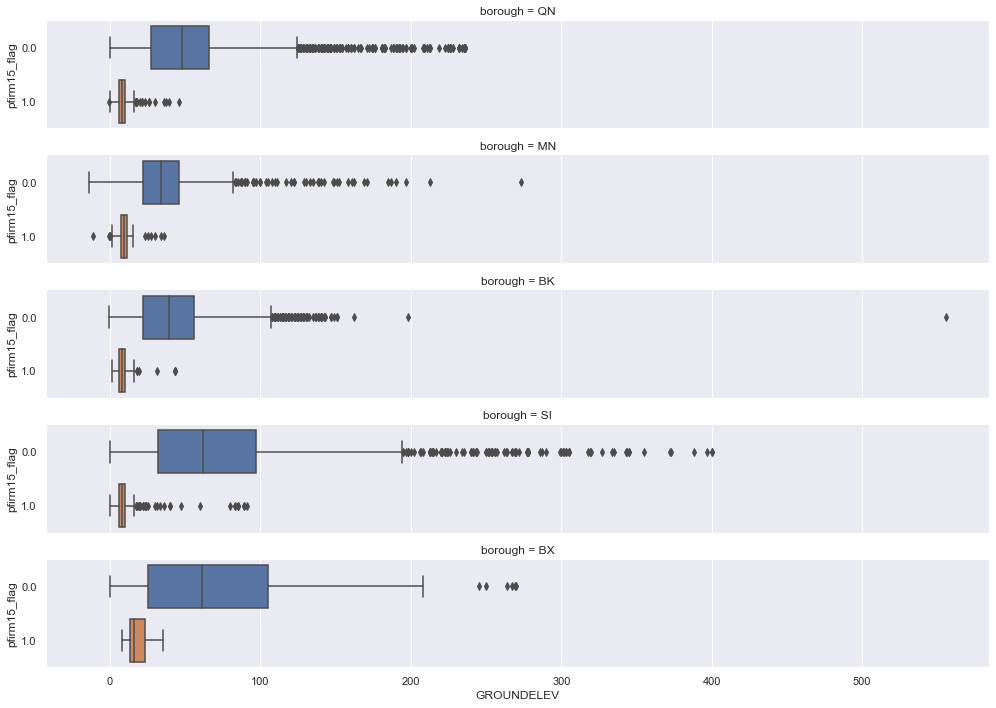

In [287]:
data = building_footprints

sns.catplot(x="GROUNDELEV", 
            y="pfirm15_flag", 
            row="borough",
            kind="box", 
            orient="h", 
            height = 2, 
            aspect = 7, 
            data=data)

plt.tight_layout()
plt.savefig('figures/cat-facets-plot-2-seaborn')